## Importing Packages 

In [1]:
#Packages related to data importing,profiling, manipulation, exploratory data analysis, data understanding,feature selection
import numpy as np
import pandas as pd
import datetime
from datetime import datetime as dt
import dtale 
import scipy.stats as stats
import sklearn
import pandas_profiling
import imblearn.over_sampling as over_sampling

#Packages related to general operating system & warnings
import os
import warnings
warnings.filterwarnings('ignore')

#Moudles related to feature selection
from sklearn.feature_selection import RFE, RFECV, SelectKBest, f_classif

#Packages related to data visualizaiton
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Setting plot sizes and type of plot
plt.rc("font", size=14)
plt.rcParams['axes.grid'] = True
plt.gray()

#Modules related to split the data & gridsearch
from sklearn.model_selection import train_test_split, GridSearchCV

#Module related to calculation of metrics
from sklearn import metrics
from sklearn.metrics import roc_curve,auc

#Module related to VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Modules related to preprocessing (Imputation of missings, standardiszation, new features creation, converting categorical to numerical)
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize

#Modules related key techniques of supervised learning
from sklearn.multiclass import OneVsRestClassifier,OneVsOneClassifier
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import  KNeighborsClassifier
from sklearn import tree
from sklearn.tree import  DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import  AdaBoostClassifier,RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier,VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

<Figure size 640x480 with 0 Axes>

In [2]:
# import packages for clustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import sklearn.cluster as cluster

In [3]:
#packages for market basket analysis
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [4]:
#import missingno as msno
#from textwrap import wrap

## Importing Datasets

In [5]:
# Establishing directory
os.chdir(r"C:\Users\itsfe\Downloads\14. Capstone Case Study - Finding-Marketing-Insights\Datasets")

In [6]:
# Importing datasets
cust=pd.read_excel('CustomersData.xlsx')
disc=pd.read_csv('Discount_Coupon.csv')
markt_spend=pd.read_csv('Marketing_Spend.csv')
onl_sales=pd.read_csv('Online_Sales.csv')
tax_amt=pd.read_excel('Tax_amount.xlsx')

In [7]:
# Understanding tables
cust.head(4)

CustomerID Gender    Location  Tenure_Months
0       17850      M     Chicago             12
1       13047      M  California             43
2       12583      M     Chicago             33
3       13748      F  California             30

In [8]:
disc.head(4)

Month Product_Category  Coupon_Code  Discount_pct
0   Jan           Apparel      SALE10            10
1   Feb           Apparel      SALE20            20
2   Mar           Apparel      SALE30            30
3   Jan          Nest-USA      ELEC10            10

In [9]:
markt_spend.head(4)

Date  Offline_Spend  Online_Spend
0  1/1/2019           4500       2424.50
1  1/2/2019           4500       3480.36
2  1/3/2019           4500       1576.38
3  1/4/2019           4500       2928.55

In [10]:
onl_sales.head(4)

CustomerID  Transaction_ID  Transaction_Date     Product_SKU  \
0       17850           16679          20190101  GGOENEBJ079499   
1       17850           16680          20190101  GGOENEBJ079499   
2       17850           16681          20190101  GGOEGFKQ020399   
3       17850           16682          20190101  GGOEGAAB010516   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   
3  Google Men's 100% Cotton Short Sleeve Hero Tee...          Apparel   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status  
0         1     153.71               6.5          Used  
1         1     153.71               6.5          Used  
2         1       2.05               6.5          Used  
3         5      17.53               6.5      Not Used

In [11]:
tax_amt.head(4)

Product_Category   GST
0         Nest-USA  0.10
1           Office  0.10
2          Apparel  0.18
3             Bags  0.18

In [12]:
# Processing before joining tables
onl_sales['Transaction_Date']=pd.to_datetime(onl_sales['Transaction_Date'],format='%Y%m%d')
onl_sales['Transaction_Month']=onl_sales['Transaction_Date'].dt.month
disc['Month']=pd.to_datetime(disc['Month'],format='%b').dt.month
markt_spend['Date']=pd.to_datetime(markt_spend['Date'])

In [13]:
#Joining of tables
cust_onl=pd.merge(left=onl_sales,right=cust,how='left',on='CustomerID')
cust_onl_disc=pd.merge(left=cust_onl,right=disc,how='left',left_on=['Transaction_Month','Product_Category'],right_on=['Month','Product_Category '])
cust_onl_disc_tax=pd.merge(left=cust_onl_disc,right=tax_amt,how='left',on='Product_Category')
final=pd.merge(left=cust_onl_disc_tax,right=markt_spend,how='left',left_on='Transaction_Date',right_on='Date')

In [14]:
final.head(5)

CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0       17850           16679       2019-01-01  GGOENEBJ079499   
1       17850           16680       2019-01-01  GGOENEBJ079499   
2       17850           16681       2019-01-01  GGOEGFKQ020399   
3       17850           16682       2019-01-01  GGOEGAAB010516   
4       17850           16682       2019-01-01  GGOEGBJL013999   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   
3  Google Men's 100% Cotton Short Sleeve Hero Tee...          Apparel   
4                    Google Canvas Tote Natural/Navy             Bags   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status  ...  Location  \
0         1     153.71               6.5          Used  ...   Chicago   
1         1     153.71               6.5          Used  ...   Chicago   
2         1       2.05               6.5          Used  ...   Chicago   
3         5      17.53               6.5      Not Used  ...   Chicago   
4         1      16.50               6.5          Used  ...   Chicago   

  Tenure_Months Month  Product_Category   Coupon_Code Discount_pct   GST  \
0            12   1.0           Nest-USA       ELEC10         10.0  0.10   
1            12   1.0           Nest-USA       ELEC10         10.0  0.10   
2            12   1.0             Office        OFF10         10.0  0.10   
3            12   1.0            Apparel       SALE10         10.0  0.18   
4            12   1.0               Bags        AIO10         10.0  0.18   

        Date  Offline_Spend Online_Spend  
0 2019-01-01           4500       2424.5  
1 2019-01-01           4500       2424.5  
2 2019-01-01           4500       2424.5  
3 2019-01-01           4500       2424.5  
4 2019-01-01           4500       2424.5  

[5 rows x 22 columns]

In [15]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52924 entries, 0 to 52923
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52924 non-null  int64         
 1   Transaction_ID       52924 non-null  int64         
 2   Transaction_Date     52924 non-null  datetime64[ns]
 3   Product_SKU          52924 non-null  object        
 4   Product_Description  52924 non-null  object        
 5   Product_Category     52924 non-null  object        
 6   Quantity             52924 non-null  int64         
 7   Avg_Price            52924 non-null  float64       
 8   Delivery_Charges     52924 non-null  float64       
 9   Coupon_Status        52924 non-null  object        
 10  Transaction_Month    52924 non-null  int64         
 11  Gender               52924 non-null  object        
 12  Location             52924 non-null  object        
 13  Tenure_Months        52924 non-

In [16]:
final[final.Discount_pct.isna()].Discount_pct=0

In [17]:
final.CustomerID=final.CustomerID.astype('str')
final.Transaction_ID=final.Transaction_ID.astype('str')

## Q1.Calculate Invoice amount or sale_amount or revenue for each transaction and item level
 ## •Invoice Value = (( Quantity*Avg_price)*(1-Dicount_pct)*(1+GST)) + Delivery_Charges


In [18]:

final['Invoice_Value']=((final['Quantity']*final['Avg_Price'])*(1-final['Discount_pct']/100)*(1+final['GST']))+final['Delivery_Charges']
final.Invoice_Value.sum()

4677562.21867

In [19]:
#Invoice value at transaction level
final.groupby('Transaction_ID')[['Invoice_Value']].sum()

Invoice_Value
Transaction_ID               
16679               158.67290
16680               158.67290
16681                 8.52950
16682               785.85410
16684               336.76960
...                       ...
48493                99.90100
48494                46.90792
48495               123.44760
48496               316.50200
48497               267.99160

[25061 rows x 1 columns]

In [20]:
#Invoice value at item level
final.groupby('Product_Description')[['Invoice_Value']].sum()

Invoice_Value
Product_Description                                              
1 oz Hand Sanitizer                                    5923.32062
20 oz Stainless Steel Insulated Tumbler               10850.70936
22 oz Android Bottle                                   3837.26245
22 oz YouTube Bottle Infuser                           5472.65460
23 oz Wide Mouth Sport Bottle                          5056.60180
...                                                           ...
YouTube Women's Short Sleeve Tri-blend Badge Te...     3122.56708
YouTube Women's Short Sleeve Tri-blend Badge Te...      221.18674
YouTube Womens 3/4 Sleeve Baseball Raglan White...      311.87228
YouTube Wool Heather Cap Heather/Black                 1074.76880
YouTube Youth Short Sleeve Tee Red                     4733.48756

[404 rows x 1 columns]

In [21]:
final.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Transaction_Month', 'Gender',
       'Location', 'Tenure_Months', 'Month', 'Product_Category ',
       'Coupon_Code', 'Discount_pct', 'GST', 'Date', 'Offline_Spend',
       'Online_Spend', 'Invoice_Value'],
      dtype='object')

In [22]:
final.groupby

<bound method DataFrame.groupby of       CustomerID Transaction_ID Transaction_Date     Product_SKU  \
0          17850          16679       2019-01-01  GGOENEBJ079499   
1          17850          16680       2019-01-01  GGOENEBJ079499   
2          17850          16681       2019-01-01  GGOEGFKQ020399   
3          17850          16682       2019-01-01  GGOEGAAB010516   
4          17850          16682       2019-01-01  GGOEGBJL013999   
...          ...            ...              ...             ...   
52919      14410          48493       2019-12-31  GGOENEBB078899   
52920      14410          48494       2019-12-31  GGOEGAEB091117   
52921      14410          48495       2019-12-31  GGOENEBQ084699   
52922      14600          48496       2019-12-31  GGOENEBQ079199   
52923      14600          48497       2019-12-31  GGOENEBQ079099   

                                     Product_Description Product_Category  \
0      Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-U

## 2.Perform Detailed exploratory analysis
## •Understanding how many customers acquired every month

In [23]:
cust_per_month=final.groupby(['Transaction_Month',final.CustomerID.rename('Customer_no')])[['CustomerID']].count().reset_index()
first_purchase=final.groupby('CustomerID')[['Transaction_Month']].min()
merge=pd.merge(how='inner',left=cust_per_month,right=first_purchase,left_on='Customer_no',right_on='CustomerID')
new=merge[merge.Transaction_Month_x==merge.Transaction_Month_y]
new_cust=new.groupby('Transaction_Month_y')[['CustomerID']].count().reset_index()
new_cust.CustomerID.sum()

1468

## •Understand the retention of customers on month on month basis

In [24]:
ret=merge[merge.Transaction_Month_x!=merge.Transaction_Month_y]
ret_cust=ret.groupby('Transaction_Month_x')[['Customer_no']].count()

## •	How the revenues from existing/new customers on month on month basis

In [25]:
#Revenue for new customers on month on month basis
new_fin=pd.merge(left=new,right=final,how='left',left_on='Customer_no',right_on='CustomerID')
new_fin['Revenue']=new_fin['Quantity']*new_fin['Avg_Price']*(1-new_fin['Discount_pct']/100)+new_fin['Delivery_Charges']
new_rev=new_fin.groupby(['Transaction_Month_x','Customer_no'])[['Revenue']].sum()
new_rev.head(20)

Revenue
Transaction_Month_x Customer_no           
1                   12431         4999.138
                    12433        16270.055
                    12471        12346.916
                    12472        11167.401
                    12583         2728.622
                    12662         2778.286
                    12686          932.162
                    12738         1672.213
                    12748        68803.647
                    12791          139.270
                    12838         5064.755
                    12855          820.797
                    12868         5159.144
                    12915         1096.010
                    12921         5360.950
                    12947         4399.329
                    12967         1423.802
                    12971         3780.347
                    13011          211.524
                    13047         2637.187

<AxesSubplot:xlabel='Transaction_Month_x,Customer_no'>

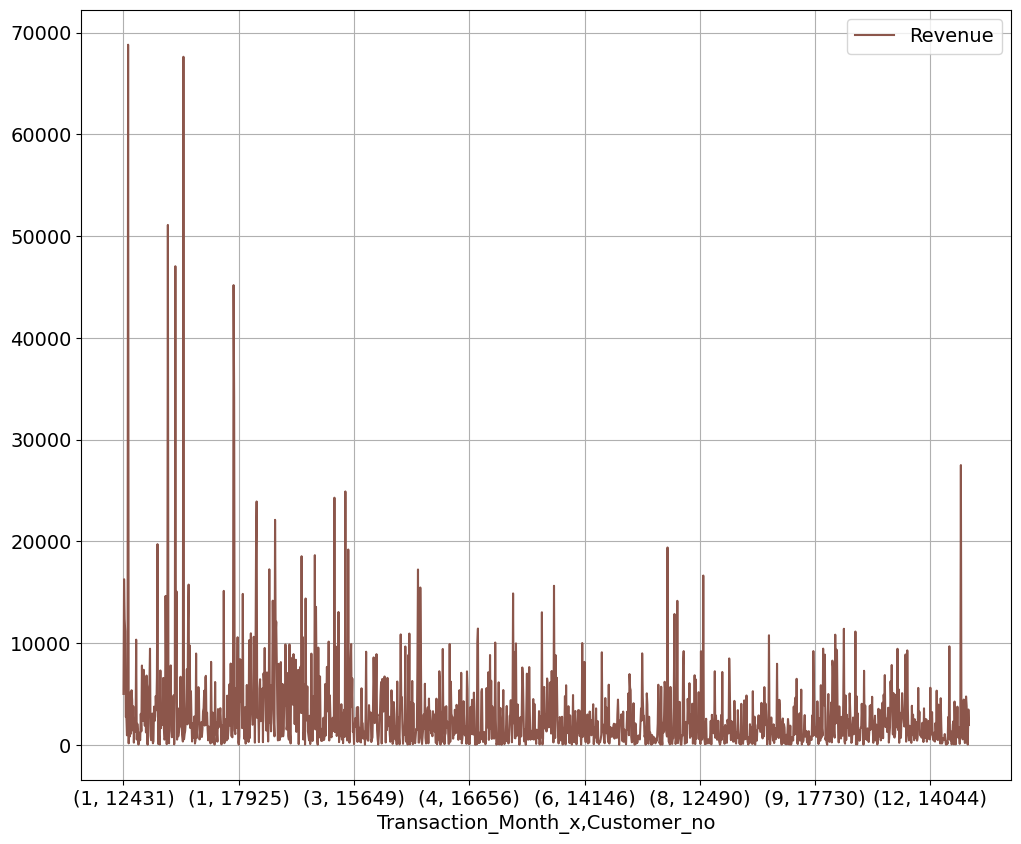

In [26]:
#Visualisation of revenue growth for new customers
new_rev.plot(kind='line',figsize=[12,10],color='#8c564b')

In [27]:
#Revenue for existing customers on month on month basis
ex_fin=pd.merge(left=ret,right=final,how='left',left_on='Customer_no',right_on='CustomerID')
ex_fin['Revenue']=ex_fin['Quantity']*ex_fin['Avg_Price']*(1-new_fin['Discount_pct']/100)+ex_fin['Delivery_Charges']
ex_rev=ex_fin.groupby(['Transaction_Month_x','Customer_no'])[['Revenue']].sum()
ex_rev

Revenue
Transaction_Month_x Customer_no           
2                   12472        10917.117
                    12748        71007.452
                    13370         3295.804
                    13767         6046.762
                    13941          712.172
...                                    ...
12                  17975            0.000
                    18041        12327.942
                    18055            0.000
                    18178            0.000
                    18198            0.000

[1110 rows x 1 columns]

<AxesSubplot:xlabel='Transaction_Month_x,Customer_no'>

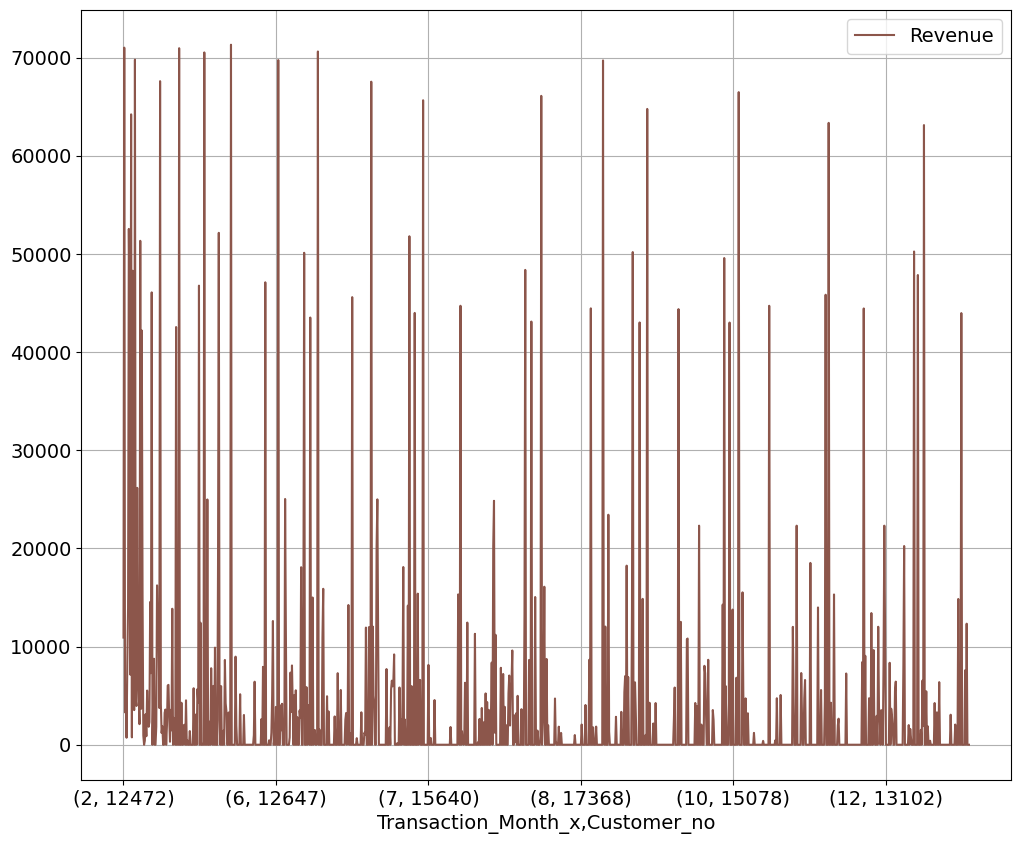

In [28]:
#Visualisation of revenue for existing customers
ex_rev.plot(kind='line',figsize=[12,10],color='#8c564b')

## •How the discounts playing role in the revenues?

In [29]:
# Revenue comparison for existing customers
ex_fin['Revenue_without_discount']=ex_fin['Quantity']*ex_fin['Avg_Price']
ex_wtrv=ex_fin.groupby(['Transaction_Month_x','Customer_no'])[['Revenue_without_discount']].sum()
ex_rev_com=pd.merge(left=ex_rev,right=ex_wtrv,on=['Transaction_Month_x','Customer_no'])
ex_rev_com.reset_index()

Transaction_Month_x Customer_no    Revenue  Revenue_without_discount
0                       2       12472  10917.117                  11417.33
1                       2       12748  71007.452                  74601.36
2                       2       13370   3295.804                   3074.76
3                       2       13767   6046.762                   5142.18
4                       2       13941    712.172                    888.86
...                   ...         ...        ...                       ...
1105                   12       17975      0.000                  12532.34
1106                   12       18041  12327.942                  14193.67
1107                   12       18055      0.000                   8623.28
1108                   12       18178      0.000                   2904.37
1109                   12       18198      0.000                   2124.03

[1110 rows x 4 columns]

In [30]:
# Revenue comparison for new customers
new_fin['Revenue_without_discount']=new_fin['Quantity']*new_fin['Avg_Price']
new_wtrv=new_fin.groupby(['Transaction_Month_x','Customer_no'])[['Revenue_without_discount']].sum()
new_rev_com=pd.merge(left=new_rev,right=new_wtrv,on=['Transaction_Month_x','Customer_no']).reset_index()
new_rev_com

Transaction_Month_x Customer_no    Revenue  Revenue_without_discount
0                       1       12431   4999.138                   5600.17
1                       1       12433  16270.055                  13829.98
2                       1       12471  12346.916                  13907.84
3                       1       12472  11167.401                  11417.33
4                       1       12583   2728.622                   2361.48
...                   ...         ...        ...                       ...
1463                   12       17672   3802.592                   4878.26
1464                   12       17929    204.226                    273.18
1465                   12       18017     20.192                     19.56
1466                   12       18202   3467.320                   4726.20
1467                   12       18250   1942.518                   2396.54

[1468 rows x 4 columns]

In [31]:
final['Revenue']=final['Quantity']*final['Avg_Price']*(1-final['Discount_pct']/100)+final['Delivery_Charges']
final['Revenue_without_discount']=final['Quantity']*final['Avg_Price']+final['Delivery_Charges']
rev_com=final.groupby('Transaction_Month')[['Revenue','Revenue_without_discount']].sum()

<AxesSubplot:xlabel='Transaction_Month'>

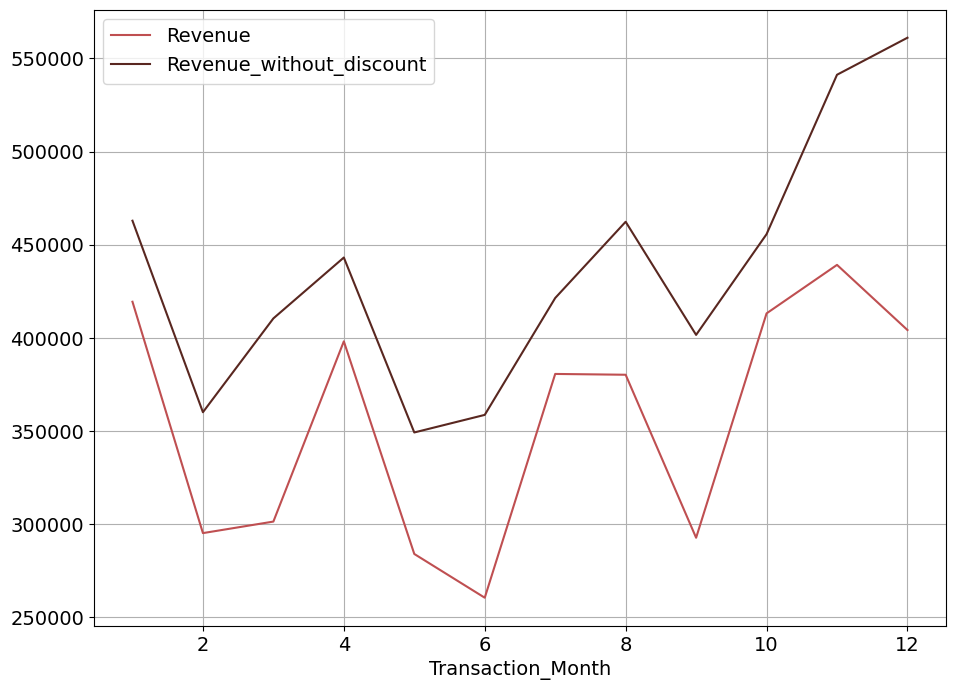

In [32]:
rev_com.plot(kind='line',figsize=[11,8],color=['#bf4f51','#592720',])


## •Analyse KPI’s like Revenue, number of orders, average order value, number of customers (existing/new), quantity, by category, by month, by week, by day etc…

1.Revenue Analysis at different levels

In [33]:
#Revenue by category
rev_cat=final.groupby('Product_Category ')[['Revenue']].sum().sort_values(by='Revenue',ascending=False)
rev_cat

Revenue
Product_Category                 
Nest-USA              2146617.768
Apparel                650242.403
Nest                   419791.546
Office                 321677.166
Drinkware              211263.411
Bags                   147007.773
Notebooks & Journals   104912.950
Lifestyle              103679.212
Nest-Canada             59850.952
Headgear                51264.162
Gift Cards              16737.912
Waze                    10351.044
Bottles                  9033.491
Accessories              8687.139
Housewares               5910.424
Android                   929.744

<AxesSubplot:xlabel='Product_Category '>

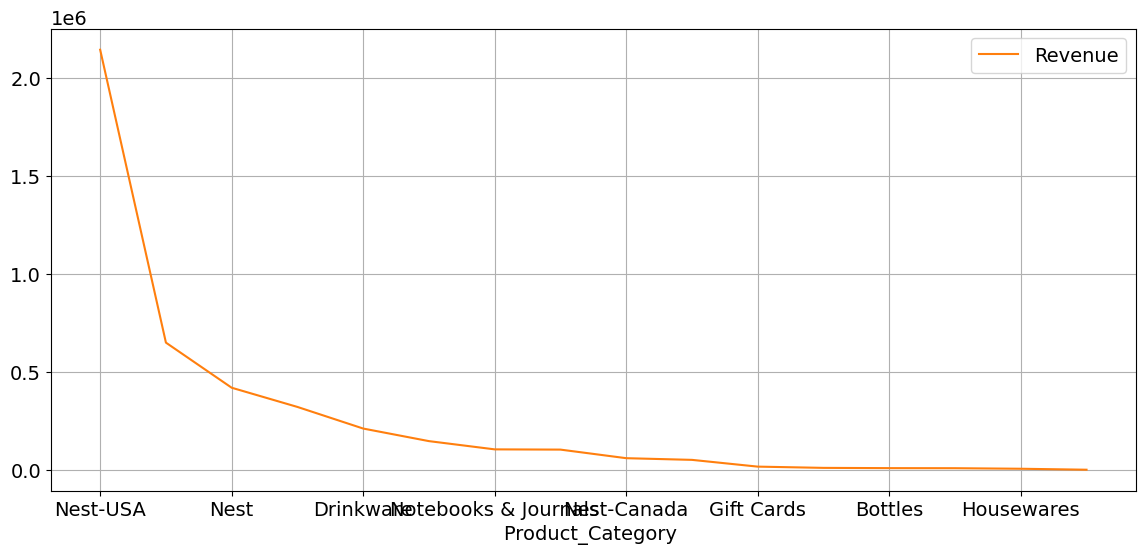

In [34]:
#Visualisation using pandas
rev_cat.plot(kind='line',color='#ff7f0e',figsize=[14,6])

In [35]:
#Revenue by month
rev_mnth=final.groupby(by='Transaction_Month')[['Revenue']].sum()
rev_mnth

Revenue
Transaction_Month            
1                  419351.097
2                  295113.200
3                  301305.001
4                  398089.533
5                  283911.414
6                  260413.065
7                  380586.361
8                  380151.824
9                  292620.128
10                 413098.693
11                 439154.058
12                 404162.723

<AxesSubplot:xlabel='Transaction_Month'>

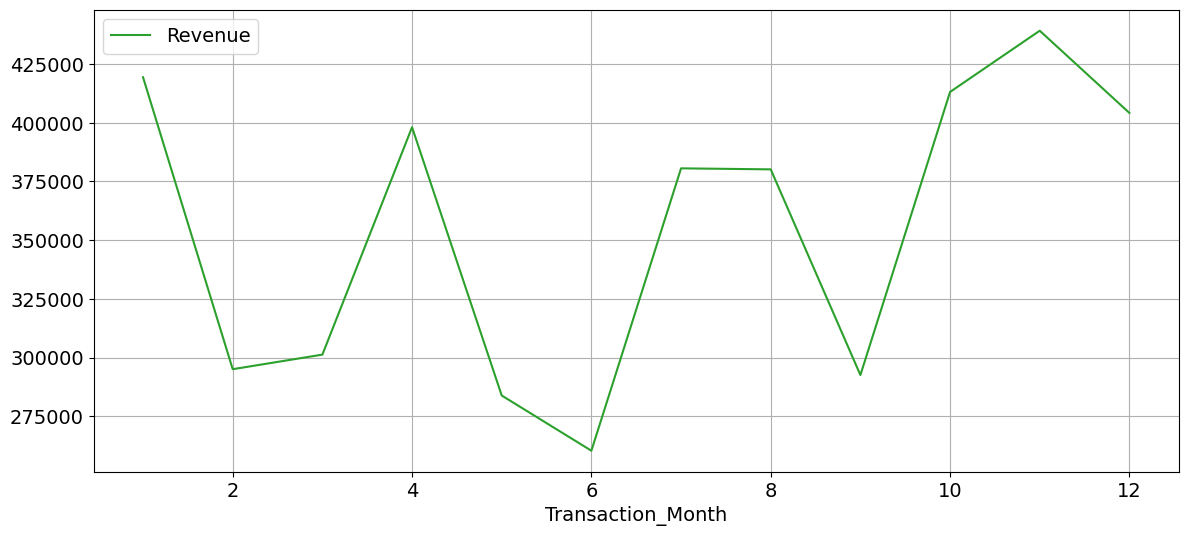

In [36]:
#Visualisation using pandas
rev_mnth.plot(kind='line',color='#2ca02c',figsize=[14,6])

In [37]:
#Revenue by customer
final.groupby(by='CustomerID')[['Revenue']].sum().sort_values(by='Revenue',ascending=False)

Revenue
CustomerID           
12748       68803.647
15311       67617.527
14606       51090.730
14911       47033.753
17841       45176.642
...               ...
13750           8.232
13748           7.616
16593           7.613
12875           6.960
13068           6.900

[1468 rows x 1 columns]

In [38]:
#Revenue by location
final.groupby(by='Location')[['Revenue']].sum().sort_values(by='Revenue',ascending=False)

Revenue
Location                  
Chicago        1482056.178
California     1318251.566
New York        865702.994
New Jersey      367737.257
Washington DC   234209.102

In [39]:
#MOnthwise Revenue for each location
rev_mnth_loc=pd.pivot_table(data=final,index=['Transaction_Month'],columns=['Location'],values='Revenue',aggfunc='sum')
rev_mnth_loc

Location           California     Chicago  New Jersey    New York  \
Transaction_Month                                                   
1                  158849.103  111350.883   32047.759   81939.583   
2                   86053.686  108097.832   27379.954   41129.366   
3                   85239.965  102653.800   16919.691   81990.866   
4                  122135.773  148493.289   42712.928   65449.828   
5                   80587.176  101344.096   25596.810   70810.692   
6                   80773.290   82111.011   31708.009   55653.118   
7                  121506.519  133404.491   23308.675   83331.467   
8                  111992.214  150948.878   21536.764   77397.374   
9                   93999.403  110627.257   21518.032   48408.371   
10                 113454.893  134698.963   40018.680  103525.735   
11                 121600.604  150781.004   44367.224   97790.612   
12                 142058.940  147544.674   40622.731   58275.982   

Location           Washington DC  
Transaction_Month                 
1                      35163.769  
2                      32452.362  
3                      14500.679  
4                      19297.715  
5                       5572.640  
6                      10167.637  
7                      19035.209  
8                      18276.594  
9                      18067.065  
10                     21400.422  
11                     24614.614  
12                     15660.396

<AxesSubplot:xlabel='Transaction_Month'>

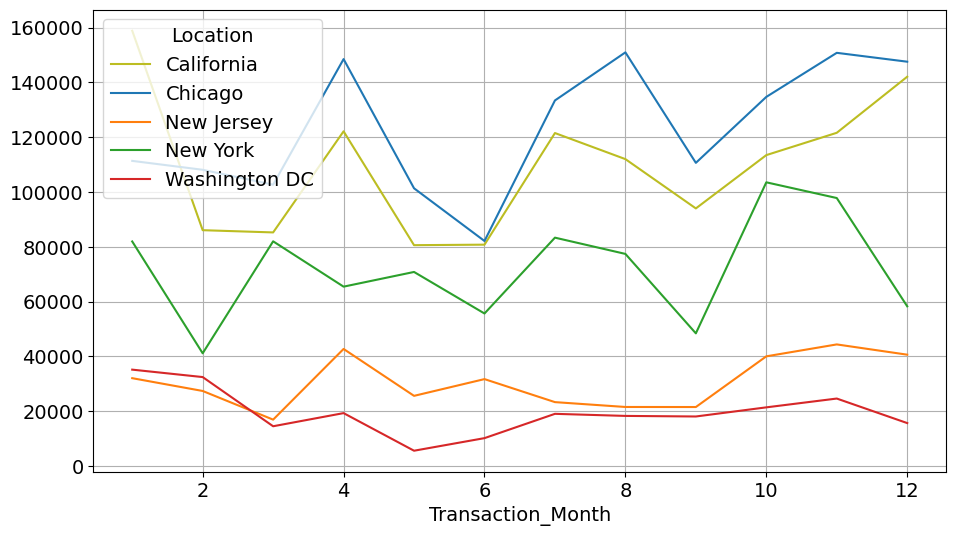

In [40]:
rev_mnth_loc.plot(kind='line',color=['#bcbd22','#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'],figsize=[11,6])

2.Order Analyis at different levels

In [41]:
#Number of orders at category level
ord_cat=final.groupby(by='Product_Category')[['Transaction_ID']].count().sort_values(by='Transaction_ID',ascending=False)
ord_cat

Transaction_ID
Product_Category                    
Apparel                        18126
Nest-USA                       14013
Office                          6513
Drinkware                       3483
Lifestyle                       3092
Nest                            2198
Bags                            1882
Headgear                         771
Notebooks & Journals             749
Waze                             554
Nest-Canada                      317
Bottles                          268
Accessories                      234
Fun                              160
Gift Cards                       159
Housewares                       122
Google                           105
Backpacks                         89
More Bags                         46
Android                           43

<AxesSubplot:xlabel='Product_Category'>

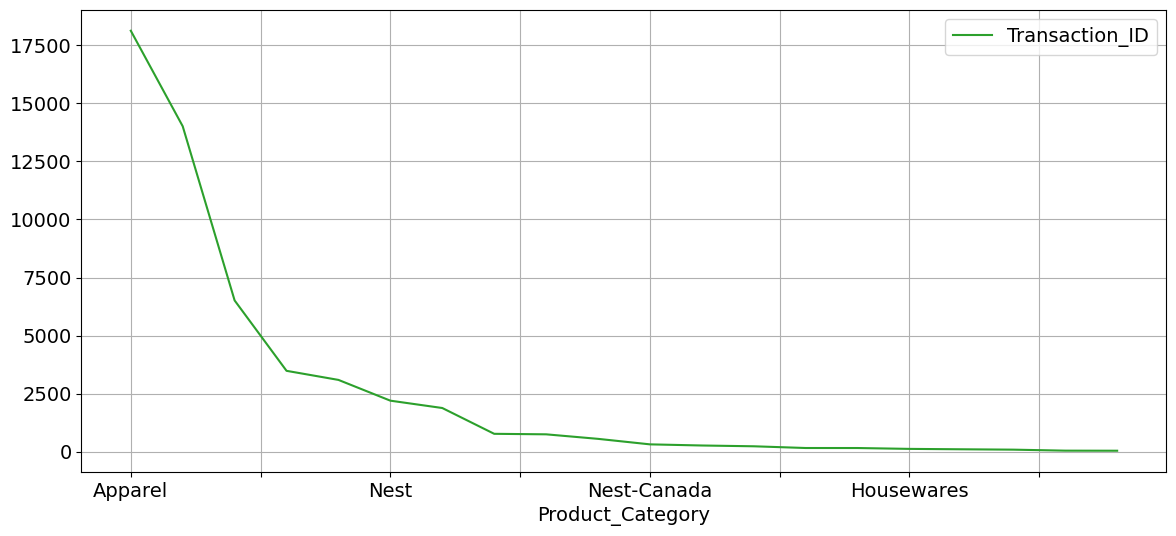

In [42]:
#Visualisation using pandas
ord_cat.plot(kind='line',color='#2ca02c',figsize=[14,6])

In [43]:
#Number of orders at month level
ord_mnth=final.groupby(by='Transaction_Month')[['Transaction_ID']].count()
ord_mnth

Transaction_ID
Transaction_Month                
1                            4063
2                            3284
3                            4346
4                            4150
5                            4572
6                            4193
7                            5251
8                            6150
9                            4288
10                           4164
11                           3961
12                           4502

<AxesSubplot:xlabel='Transaction_Month'>

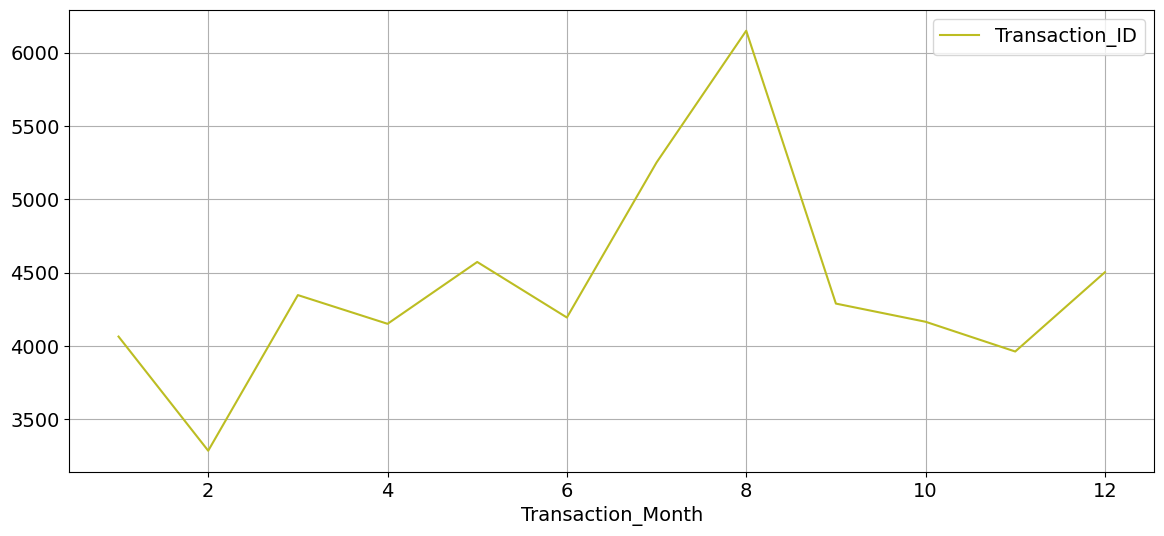

In [44]:
#Visualisation using pandas
ord_mnth.plot(kind='line',color='#bcbd22',figsize=[14,6])

In [45]:
#Number of orders at location level
ord_loc=final.groupby(by='Location')[['Transaction_ID']].count().sort_values(by='Transaction_ID',ascending=False)
ord_loc

Transaction_ID
Location                     
Chicago                 18380
California              16136
New York                11173
New Jersey               4503
Washington DC            2732

<AxesSubplot:xlabel='Location'>

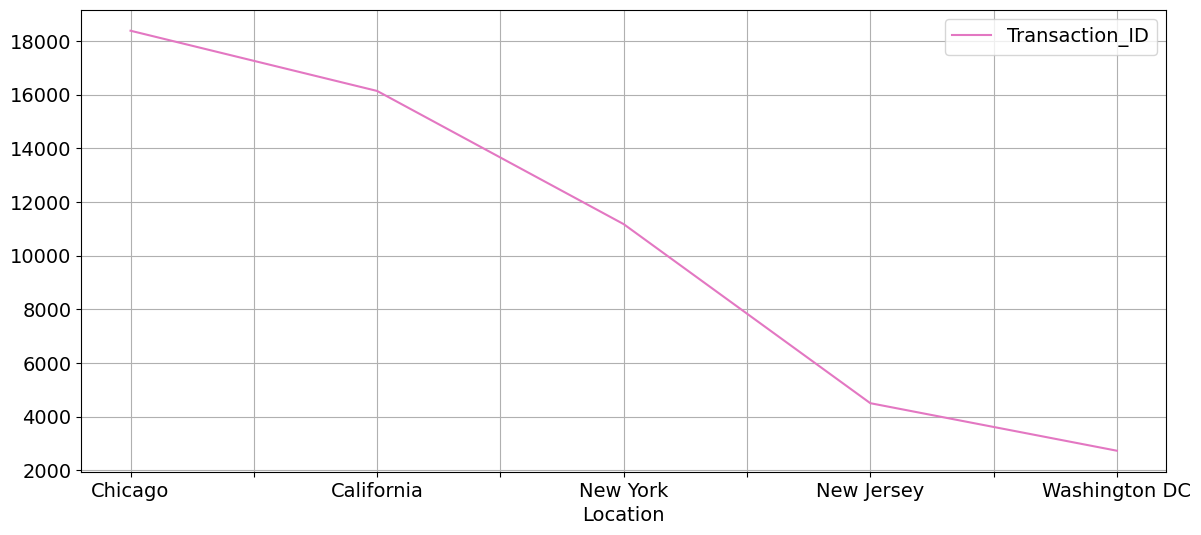

In [46]:
#Visualisation using pandas
ord_loc.plot(kind='line',color='#e377c2',figsize=[14,6])

In [47]:
#Number of orders at category and location levels
ord_cat_loc=pd.pivot_table(data=final,index=['Product_Category '],columns=['Location'],values='Transaction_ID',aggfunc='count')
ord_cat_loc


Location              California  Chicago  New Jersey  New York  Washington DC
Product_Category                                                              
Accessories                   80       86          17        41             10
Android                       13       18           4         7              1
Apparel                     5491     6158        1627      3902            948
Bags                         539      731         151       383             78
Bottles                       91       85          27        54             11
Drinkware                   1117     1252         284       675            155
Gift Cards                    27       89          18        24              1
Headgear                     221      264          62       191             33
Housewares                    38       50           4        23              7
Lifestyle                    977     1086         251       624            154
Nest                         762      710         188       421            117
Nest-Canada                   91      120          23        63             20
Nest-USA                    4184     4855        1203      2975            796
Notebooks & Journals         238      260          41       181             29
Office                      1993     2273         522      1409            316
Waze                         146      203          48       124             33

<AxesSubplot:xlabel='Product_Category '>

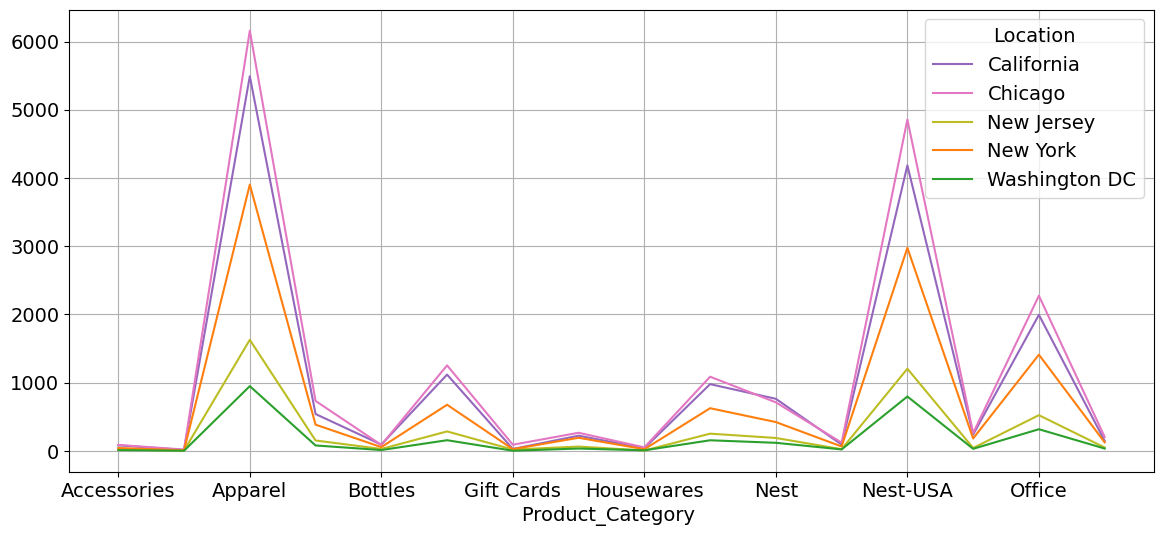

In [48]:
#Visualisation using pandas
ord_cat_loc.plot(kind='line',color=['#9467bd','#e377c2','#bcbd22','#ff7f0e', '#2ca02c'],figsize=[14,6])

3.Customer Analysis at different levels

In [49]:
#Customers at month level
cust_mnth=final.groupby(by='Transaction_Month')[['CustomerID']].count().sort_values(by='CustomerID',ascending=False)
cust_mnth

CustomerID
Transaction_Month            
8                        6150
7                        5251
5                        4572
12                       4502
3                        4346
9                        4288
6                        4193
10                       4164
4                        4150
1                        4063
11                       3961
2                        3284

<AxesSubplot:xlabel='Transaction_Month'>

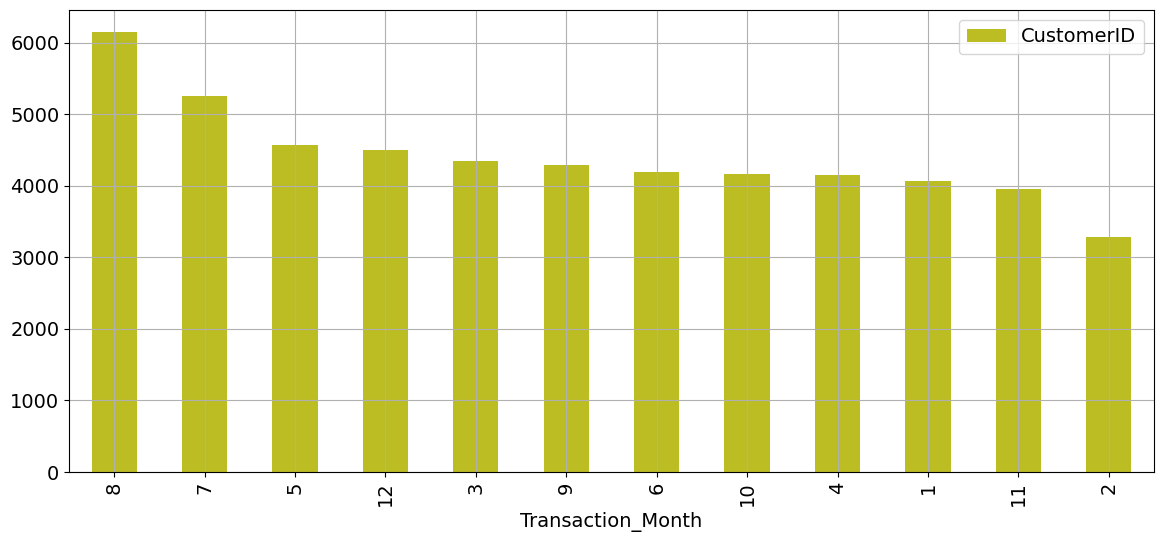

In [50]:
#Visualisation
cust_mnth.plot(kind='bar',color='#bcbd22',figsize=[14,6])

In [51]:
#Customer at month and gender level
cust_mnth_gen=pd.pivot_table(data=final,index=['Transaction_Month','Gender'],columns='Location',values='CustomerID',aggfunc='count')
cust_mnth_gen

Location                  California  Chicago  New Jersey  New York  \
Transaction_Month Gender                                              
1                 F              873      504         136       469   
                  M              618      554         179       376   
2                 F              629      782         212       388   
                  M              329      586          51        72   
3                 F              834      839         216       723   
                  M              394      755          72       286   
4                 F              743      997         202       688   
                  M              637      362         158       158   
5                 F              885     1058         205       875   
                  M              545      490         150       277   
6                 F              710      881         463       529   
                  M              558      483          46       350   
7                 F             1026     1269         387       589   
                  M              587      558           2       565   
8                 F              777     1520         293       992   
                  M              830      752         160       486   
9                 F              859      872         136       400   
                  M              497      731         199       381   
10                F              731      963         278       585   
                  M              470      418         129       366   
11                F              796      748         225       550   
                  M              263      612         159       375   
12                F             1012     1051         314       527   
                  M              533      595         131       166   

Location                  Washington DC  
Transaction_Month Gender                 
1                 F                  68  
                  M                 286  
2                 F                 185  
                  M                  50  
3                 F                 171  
                  M                  56  
4                 F                 158  
                  M                  47  
5                 F                  20  
                  M                  67  
6                 F                  92  
                  M                  81  
7                 F                 126  
                  M                 142  
8                 F                 159  
                  M                 181  
9                 F                  31  
                  M                 182  
10                F                  71  
                  M                 153  
11                F                  87  
                  M                 146  
12                F                  98  
                  M                  75

<AxesSubplot:xlabel='Transaction_Month,Gender'>

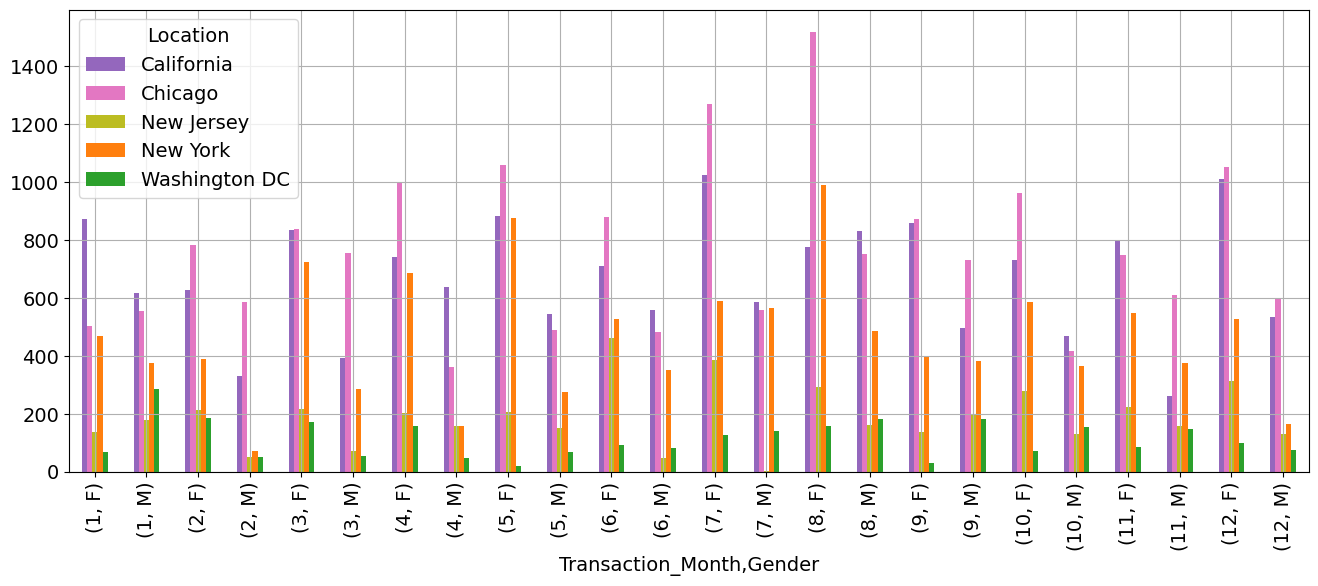

In [52]:
#Visualisation using pandas
cust_mnth_gen.plot(kind='bar',color=['#9467bd','#e377c2','#bcbd22','#ff7f0e', '#2ca02c'],figsize=[16,6])

In [53]:
#Customers at category level
cust_cat=final.groupby(by='Product_Category')[['CustomerID']].count().sort_values(by='CustomerID',ascending=False)
cust_cat

CustomerID
Product_Category                
Apparel                    18126
Nest-USA                   14013
Office                      6513
Drinkware                   3483
Lifestyle                   3092
Nest                        2198
Bags                        1882
Headgear                     771
Notebooks & Journals         749
Waze                         554
Nest-Canada                  317
Bottles                      268
Accessories                  234
Fun                          160
Gift Cards                   159
Housewares                   122
Google                       105
Backpacks                     89
More Bags                     46
Android                       43

<AxesSubplot:xlabel='Product_Category'>

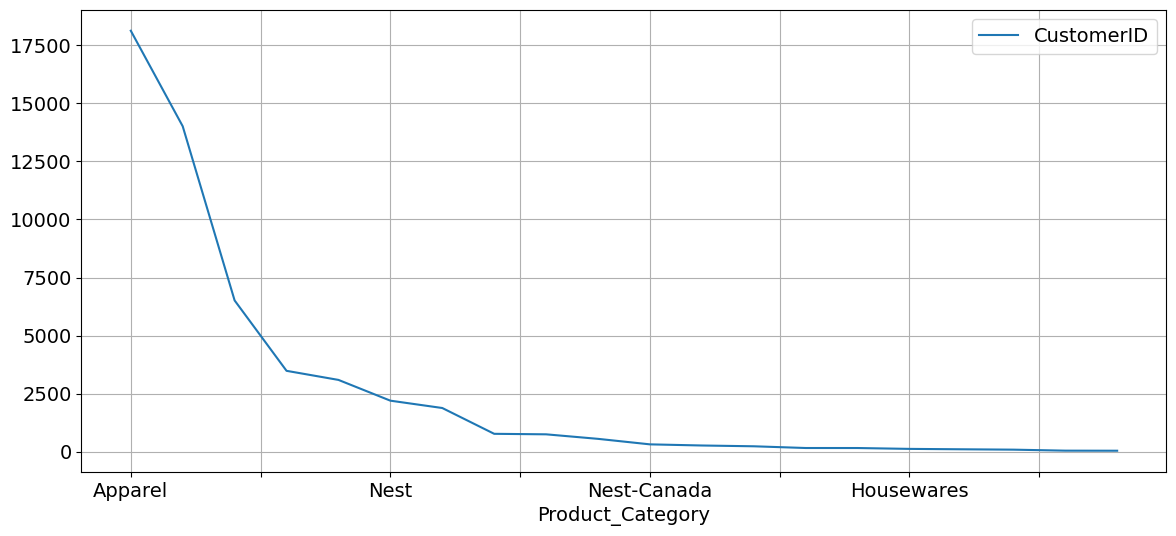

In [54]:
#Visualisation
cust_cat.plot(kind='line',color='#1f77b4',figsize=[14,6])

4.Quantity Analysis at different levels

In [55]:
#Quantity at month,category levels
quant_mnth=final.groupby(by=['Transaction_Month','Product_Category'])[['Quantity']].count()
quant_mnth

Quantity
Transaction_Month Product_Category              
1                 Accessories                  1
                  Android                      4
                  Apparel                    960
                  Backpacks                    3
                  Bags                       155
...                                          ...
12                Nest-Canada                 26
                  Nest-USA                  1534
                  Notebooks & Journals         9
                  Office                     385
                  Waze                        64

[207 rows x 1 columns]

<AxesSubplot:xlabel='Transaction_Month,Product_Category'>

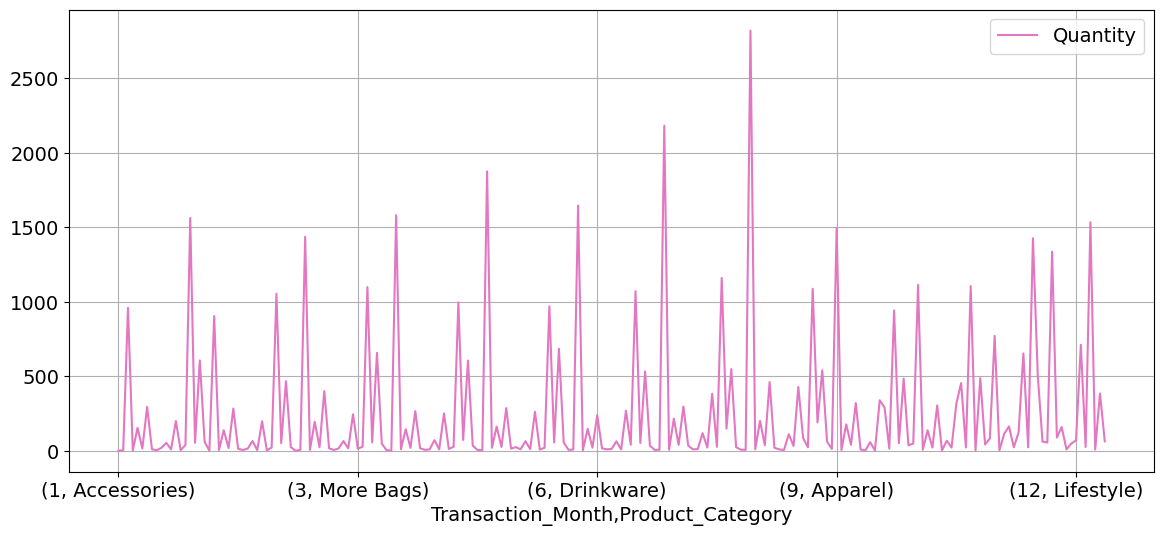

In [56]:
quant_mnth.plot(kind='line',color='#e377c2',figsize=[14,6])

In [57]:
#Quantity at category level
quant_cat=final.groupby(by='Product_Category')[['Quantity']].count().sort_values(by='Quantity',ascending=False)
quant_cat

Quantity
Product_Category              
Apparel                  18126
Nest-USA                 14013
Office                    6513
Drinkware                 3483
Lifestyle                 3092
Nest                      2198
Bags                      1882
Headgear                   771
Notebooks & Journals       749
Waze                       554
Nest-Canada                317
Bottles                    268
Accessories                234
Fun                        160
Gift Cards                 159
Housewares                 122
Google                     105
Backpacks                   89
More Bags                   46
Android                     43

<AxesSubplot:xlabel='Product_Category'>

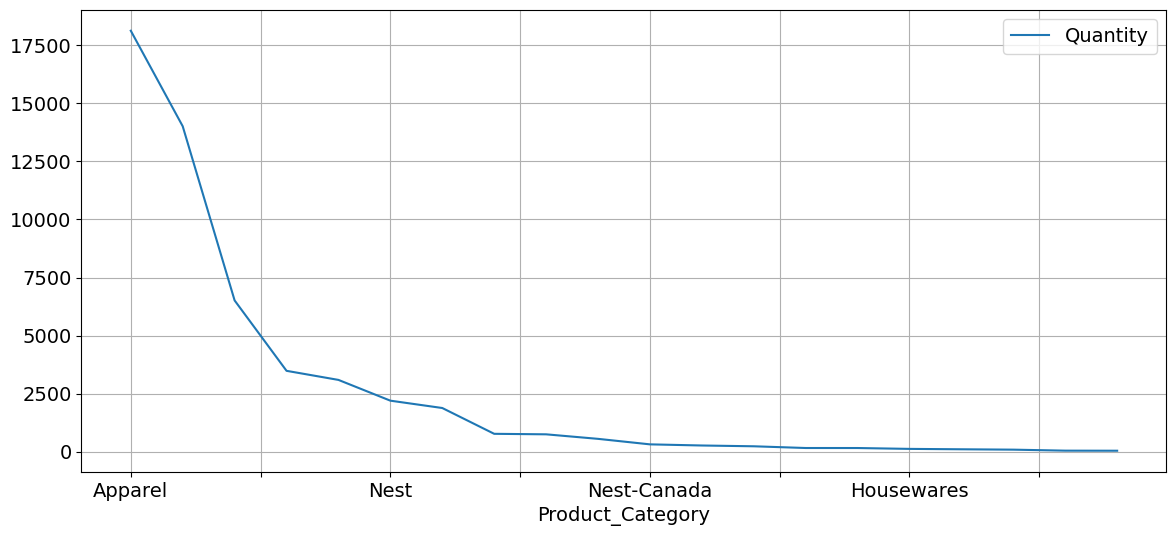

In [58]:
#Visualisation
quant_cat.plot(kind='line',color='#1f77b4',figsize=[14,6])

5.Average order value analysis at different levels

In [59]:
#Average order value analysis at month level
trans_cust=final.groupby(['CustomerID','Transaction_Month'])[['Transaction_ID']].count()
rev_cust=final.groupby(['CustomerID','Transaction_Month'])[['Revenue']].sum()
per_cust=pd.merge(left=trans_cust,right=rev_cust,on=['CustomerID','Transaction_Month']).rename(columns={'Transaction_ID':'Order_per_cust','Revenue':'Revenue_per_cust'})
per_cust['Avg_ord_value']=per_cust['Revenue_per_cust']/per_cust['Order_per_cust']
ord_val_mnth=per_cust.reset_index().drop(columns=['CustomerID','Order_per_cust','Revenue_per_cust'])
ord_val_mnth

Transaction_Month  Avg_ord_value
0                     9      85.846500
1                     3     266.533516
2                    11      80.232759
3                     6      37.995353
4                    10     115.621833
...                 ...            ...
2573                  4      17.669000
2574                  6      16.283000
2575                 10     274.200000
2576                  7      37.597018
2577                 10      95.160956

[2578 rows x 2 columns]

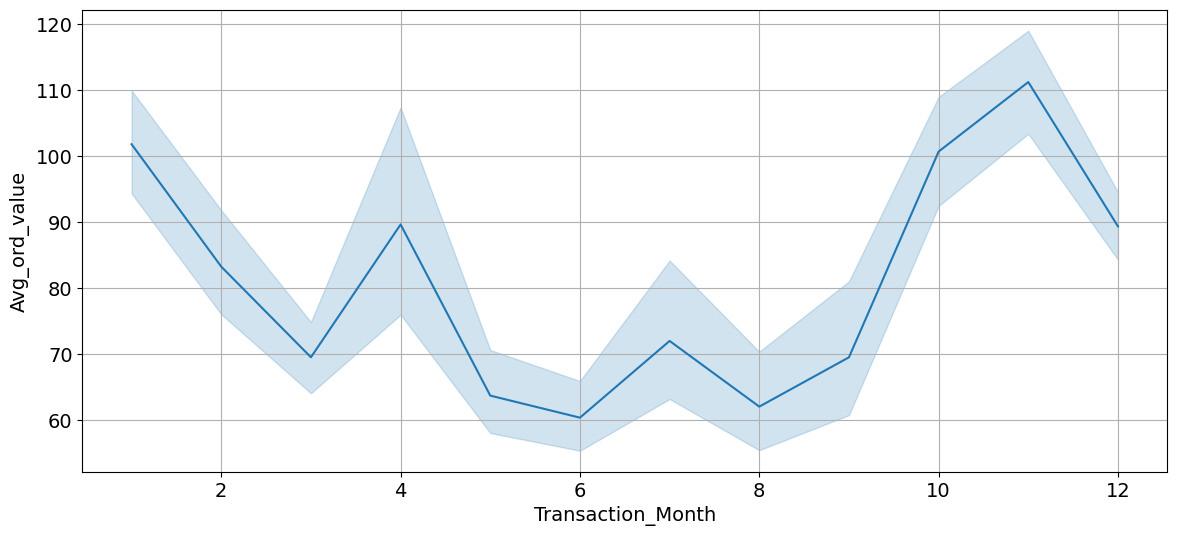

In [60]:
#Visualisation using seaborn and matplotlib
plt.figure(figsize=(14,6))
sns.lineplot(data=ord_val_mnth,x=ord_val_mnth['Transaction_Month'],y=ord_val_mnth['Avg_ord_value'])#,palette="coolwarm")
plt.show()


In [61]:
#Average order value analysis at location level
trans_cust=final.groupby(['CustomerID','Location'])[['Transaction_ID']].count()
rev_cust=final.groupby(['CustomerID','Location'])[['Revenue']].sum()
per_cust=pd.merge(left=trans_cust,right=rev_cust,on=['CustomerID','Location']).rename(columns={'Transaction_ID':'Order_per_cust','Revenue':'Revenue_per_cust'})
per_cust['Avg_ord_value']=per_cust['Revenue_per_cust']/per_cust['Order_per_cust']
ord_val_loc=per_cust.reset_index().drop(columns=['CustomerID','Order_per_cust','Revenue_per_cust'])
ord_val_loc

Location  Avg_ord_value
0       New York      85.846500
1       New York     176.488150
2     California      58.245739
3     California      63.525235
4        Chicago      45.756083
...          ...            ...
1463  California     106.557857
1464    New York      59.177525
1465     Chicago      17.495750
1466     Chicago     274.200000
1467  New Jersey      62.992873

[1468 rows x 2 columns]

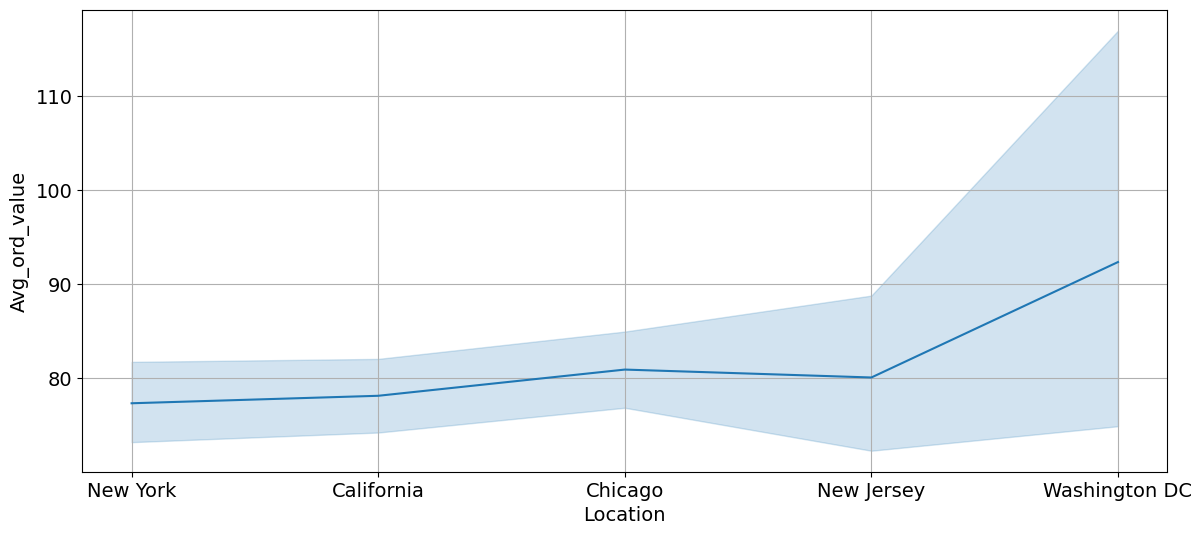

In [62]:
#Visualisation using seaborn and matplotlib
plt.figure(figsize=(14,6))
sns.lineplot(data=ord_val_loc,x=ord_val_loc['Location'],y=ord_val_loc['Avg_ord_value'])
plt.show()

In [63]:
#Average order value analysis at day level
final['Day']=final.Transaction_Date.dt.day
trans_cust=final.groupby(['CustomerID','Day'])[['Transaction_ID']].count()
rev_cust=final.groupby(['CustomerID','Day'])[['Revenue']].sum()
per_cust=pd.merge(left=trans_cust,right=rev_cust,on=['CustomerID','Day']).rename(columns={'Transaction_ID':'Order_per_cust','Revenue':'Revenue_per_cust'})
per_cust['Avg_ord_value']=per_cust['Revenue_per_cust']/per_cust['Order_per_cust']
ord_val_day=per_cust.reset_index().drop(columns=['CustomerID','Order_per_cust','Revenue_per_cust'])
ord_val_day

Day  Avg_ord_value
0      15      85.846500
1       1      19.333000
2       2      89.976720
3      24     266.533516
4      19     115.621833
...   ...            ...
3058    5      17.669000
3059   20      16.283000
3060   23     274.200000
3061   10      95.160956
3062   29      37.597018

[3063 rows x 2 columns]

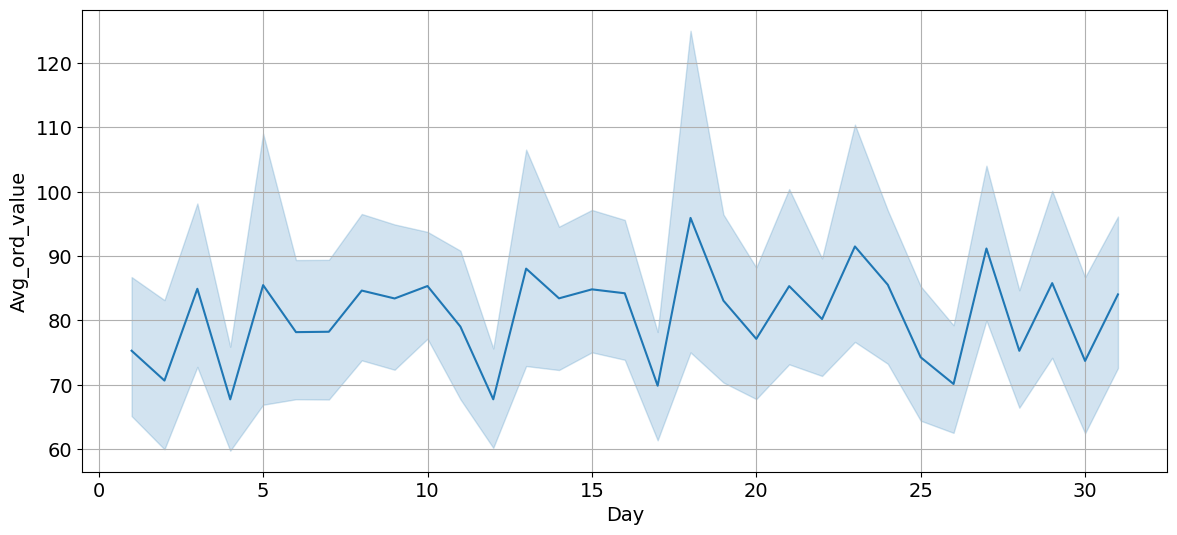

In [64]:
#Visualisation using seaborn and matplotlib
plt.figure(figsize=(14,6))
sns.lineplot(data=ord_val_day,x=ord_val_day['Day'],y=ord_val_day['Avg_ord_value'])
plt.show()

In [65]:
#Average order value analysis at category level
trans_cust=final.groupby(['CustomerID','Product_Category'])[['Transaction_ID']].count()
rev_cust=final.groupby(['CustomerID','Product_Category'])[['Revenue']].sum()
per_cust=pd.merge(left=trans_cust,right=rev_cust,on=['CustomerID','Product_Category']).rename(columns={'Transaction_ID':'Order_per_cust','Revenue':'Revenue_per_cust'})
per_cust['Avg_ord_value']=per_cust['Revenue_per_cust']/per_cust['Order_per_cust']
ord_val_cat=per_cust.reset_index().drop(columns=['CustomerID','Order_per_cust','Revenue_per_cust'])
ord_val_cat

Product_Category  Avg_ord_value
0                  Apparel      88.993000
1                   Office      82.700000
2              Accessories       8.392000
3                  Apparel     335.536842
4                     Bags      37.894000
...                    ...            ...
8881                  Nest     200.266667
8882              Nest-USA     161.497500
8883  Notebooks & Journals      18.150000
8884                Office       9.702846
8885                  Waze      12.291000

[8886 rows x 2 columns]

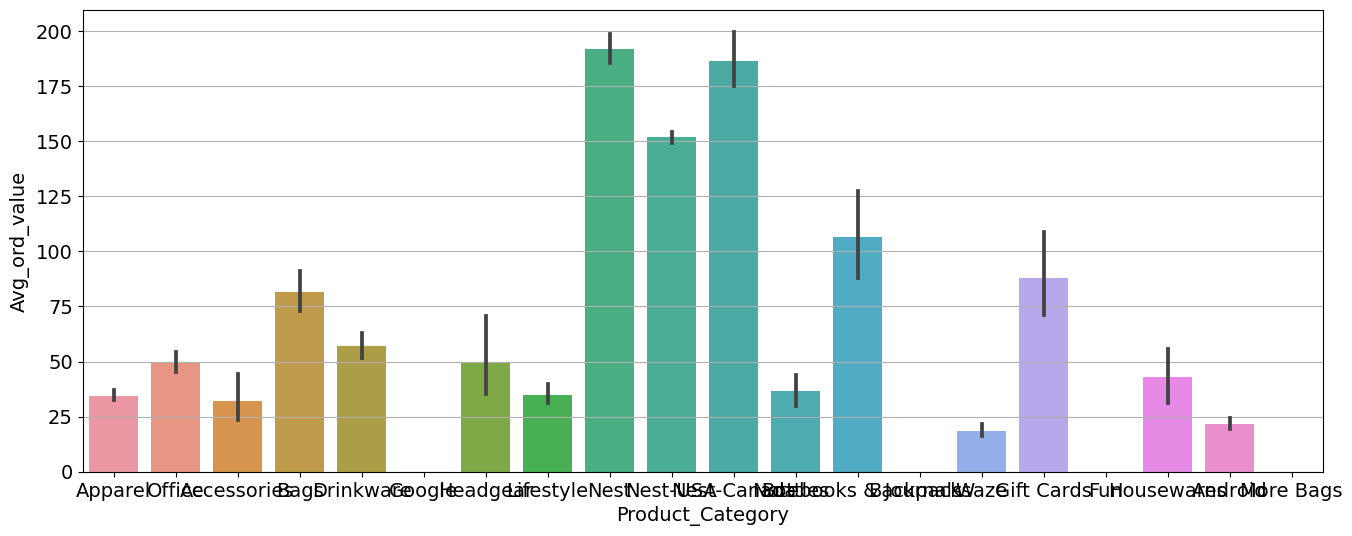

In [66]:
#Visualisation using seaborn and matplotlib
plt.figure(figsize=(16,6))
sns.barplot(data=ord_val_cat,x=ord_val_cat['Product_Category'],y=ord_val_cat['Avg_ord_value'])
plt.show()

## •Understand the trends/seasonality of sales by category, location, month etc…

In [67]:
#Sales by category
sales_cat=final.groupby(by='Product_Category')[['Quantity']].sum().sort_values(by='Quantity',ascending=False)
sales_cat

Quantity
Product_Category              
Office                   88383
Apparel                  32438
Drinkware                30501
Lifestyle                24881
Nest-USA                 21430
Bags                     15273
Notebooks & Journals      9556
Headgear                  3533
Nest                      2837
Housewares                2484
Bottles                   2090
Waze                      1144
Accessories               1097
Fun                        834
Google                     575
Nest-Canada                469
Gift Cards                 206
More Bags                  144
Backpacks                  113
Android                     45

<AxesSubplot:xlabel='Product_Category'>

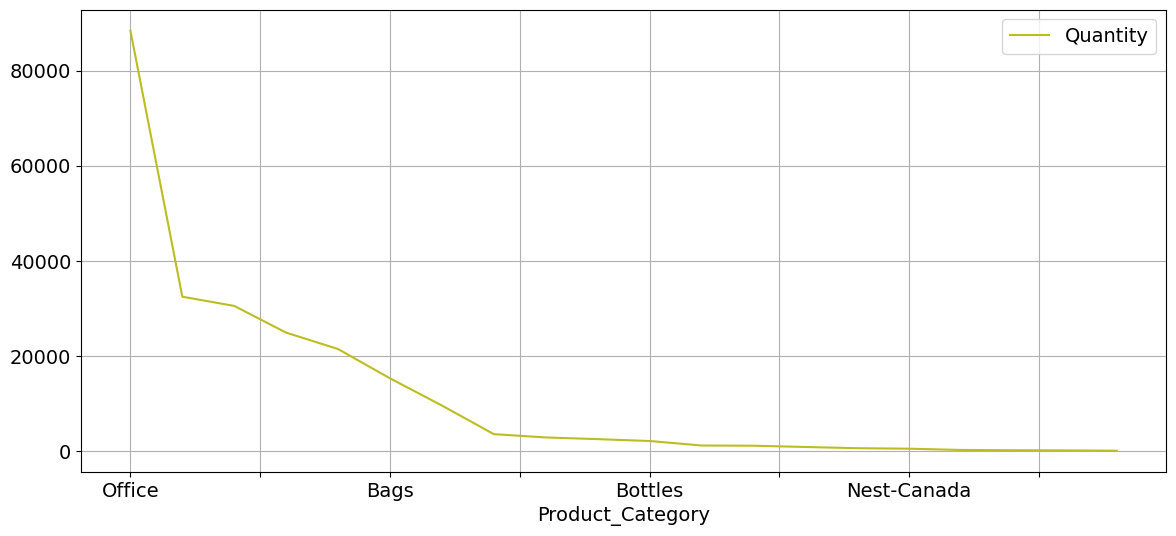

In [68]:
sales_cat.plot(kind='line',color='#bcbd22',figsize=[14,6])

In [69]:
#Sales by location
sales_loc=final.groupby(by=['Location','Product_Category'])[['Quantity']].sum().sort_values(by='Quantity',ascending=False)
sales_loc

Quantity
Location      Product_Category          
Chicago       Office               29905
California    Office               26465
New York      Office               18415
Chicago       Drinkware            12528
              Apparel              11497
...                                  ...
Washington DC Backpacks                4
New Jersey    Android                  4
Washington DC More Bags                1
              Gift Cards               1
              Android                  1

[100 rows x 1 columns]

<AxesSubplot:xlabel='Location,Product_Category'>

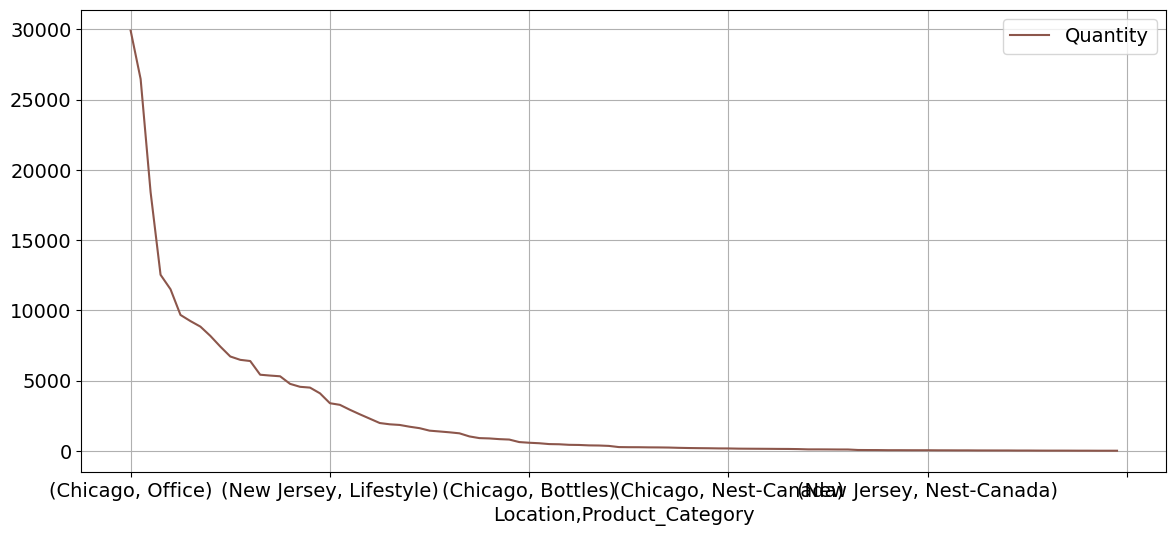

In [70]:
sales_loc.plot(kind='line',color='#8c564b',figsize=[14,6])

In [71]:
#Sales by month
sales_mnth=final.groupby(by=['Transaction_Month','Product_Category'])[['Quantity']].sum().sort_values(by='Quantity',ascending=False)
sales_mnth


Quantity
Transaction_Month Product_Category          
1                 Office               10237
6                 Office                9294
4                 Office                9106
3                 Office                8940
8                 Office                8076
...                                      ...
1                 Backpacks                3
4                 Android                  2
2                 Android                  1
3                 Accessories              1
1                 Accessories              1

[207 rows x 1 columns]

<AxesSubplot:xlabel='Transaction_Month,Product_Category'>

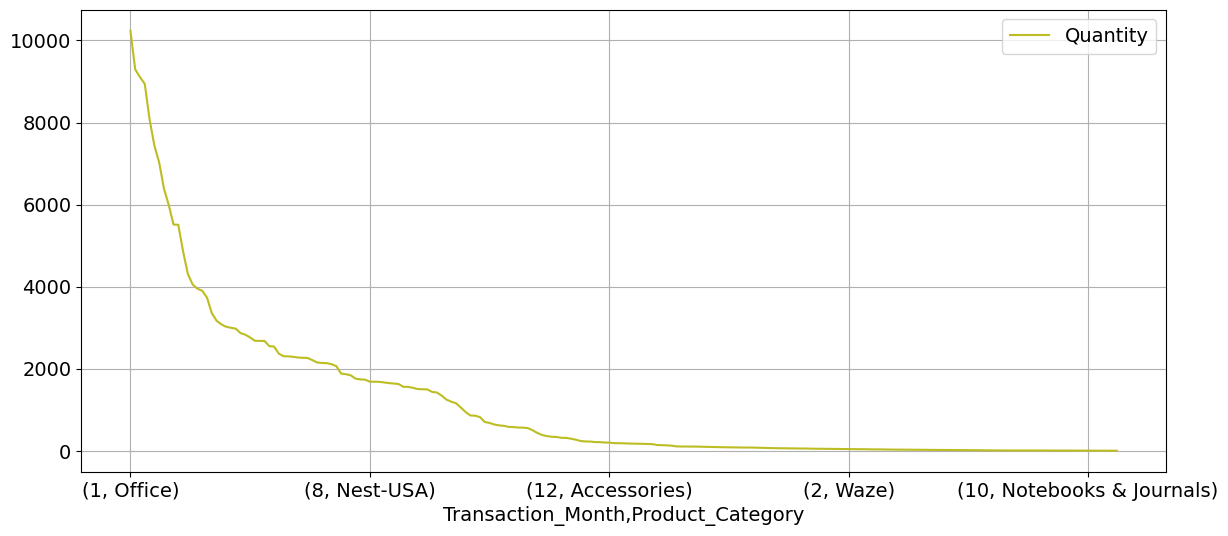

In [72]:
sales_mnth.plot(kind='line',color='#bcbd22',figsize=[14,6])

## •How number order varies and sales with different days?

In [73]:
#Sales analysis at day level
sales_day=final.groupby(by='Day')[['Revenue']].sum()

<AxesSubplot:xlabel='Day'>

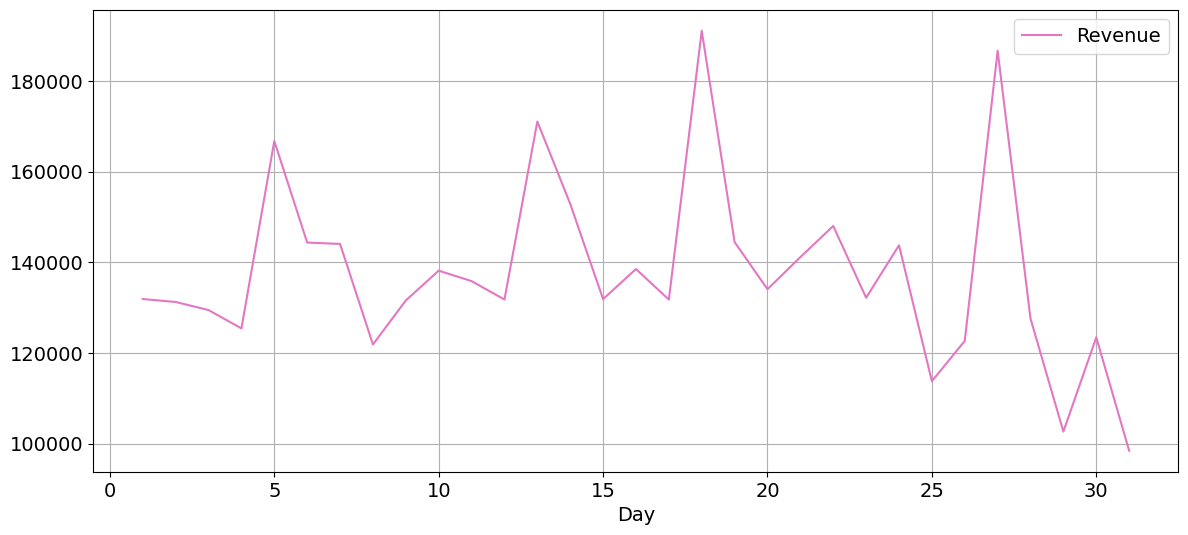

In [74]:
#Visualisation
sales_day.plot(kind='line',color='#e377c2',figsize=[14,6])

In [75]:
#Order Analysis at day level
ord_day=final.groupby(by='Day')[['Transaction_ID']].count()#.sort_values(by='Transaction_ID',ascending=False)
ord_day

Transaction_ID
Day                
1              1723
2              1606
3              1732
4              1740
5              1736
6              1878
7              1828
8              1531
9              1610
10             1614
11             1864
12             1747
13             2066
14             1828
15             1604
16             1740
17             1807
18             1985
19             1859
20             1671
21             1781
22             1731
23             1506
24             1682
25             1525
26             1661
27             2062
28             1661
29             1277
30             1619
31             1250

<AxesSubplot:xlabel='Day'>

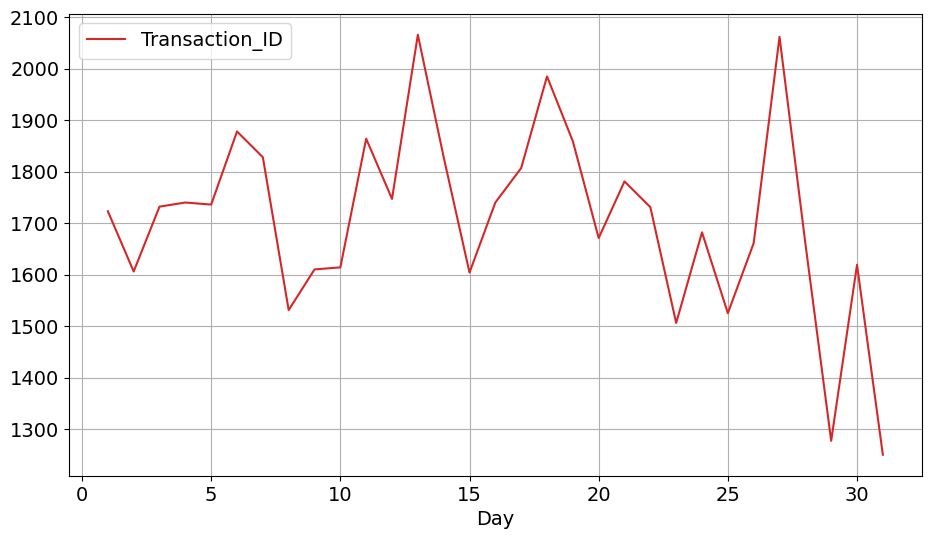

In [76]:
ord_day.plot(kind='line',color='#d62728',figsize=[11,6])

## •Calculate the Marketing spend, percentage of marketing spend out of revenue, Tax, percentage of delivery charges by month.

In [77]:
#Marketing Spend by month
markt_spend['Transaction_Month']=markt_spend['Date'].dt.month
markt_spend['Total_spend']=markt_spend['Offline_Spend']+markt_spend['Online_Spend']
spend_mnth=markt_spend.groupby(by='Transaction_Month')[['Total_spend']].sum().reset_index()
rev_mnth=final.groupby(by='Transaction_Month')[['Revenue']].sum().reset_index()
spend=pd.merge(left=rev_mnth,right=spend_mnth,how='left',on='Transaction_Month')
spnd_mnth=spend.groupby(by='Transaction_Month')[['Total_spend']].sum()
spnd_mnth

Total_spend
Transaction_Month             
1                    154928.95
2                    137107.92
3                    122250.09
4                    157026.83
5                    118259.64
6                    134318.14
7                    120217.85
8                    142904.15
9                    135514.54
10                   151224.65
11                   161144.96
12                   198648.75

In [78]:
#Percentage market spend by month
spend['Percent_mrkt_spend']=spend['Total_spend']/spend['Revenue']
spend.groupby('Transaction_Month')[['Percent_mrkt_spend']].sum()

Percent_mrkt_spend
Transaction_Month                    
1                            0.369449
2                            0.464594
3                            0.405735
4                            0.394451
5                            0.416537
6                            0.515789
7                            0.315875
8                            0.375913
9                            0.463107
10                           0.366074
11                           0.366944
12                           0.491507

In [79]:
#Tax by month
final['Tax']=final['Revenue']*final['GST']
final.groupby('Transaction_Month')[['Tax']].sum()

Tax
Transaction_Month             
1                  48666.18405
2                  36231.34200
3                  38134.64053
4                  49678.37193
5                  35574.81416
6                  32064.10561
7                  46064.10681
8                  44396.16714
9                  33187.77628
10                 42462.65615
11                 40127.27496
12                 40042.98295

In [80]:
#Percentage of delivery charge by month
rev_del=final.groupby('Transaction_Month')[['Revenue','Delivery_Charges']].sum().reset_index()
rev_del['Percent_delivery_charge']=rev_del['Delivery_Charges']/rev_del['Revenue']*100
rev_del

Transaction_Month     Revenue  Delivery_Charges  Percent_delivery_charge
0                   1  419351.097          59242.32                14.127141
1                   2  295113.200          49216.60                16.677194
2                   3  301305.001          60799.94                20.178869
3                   4  398089.533          41481.74                10.420204
4                   5  283911.414          41396.17                14.580664
5                   6  260413.065          37513.58                14.405414
6                   7  380586.361          48723.93                12.802332
7                   8  380151.824          61099.57                16.072413
8                   9  292620.128          41005.42                14.013192
9                  10  413098.693          45961.88                11.126126
10                 11  439154.058          32311.93                 7.357766
11                 12  404162.723          37881.99                 9.372955

## •	How marketing spend is impacting on revenue?

In [81]:
date_rev=final.groupby(["Transaction_Date"])[["Revenue"]].sum().reset_index()
spend=pd.merge(left=date_rev,right=markt_spend,left_on="Transaction_Date",right_on="Date",how="inner")
spend_rev=spend[["Transaction_Date","Revenue","Total_spend"]]
spend_rev

Transaction_Date    Revenue  Total_spend
0         2019-01-01   7684.799      6924.50
1         2019-01-02  12805.908      7980.36
2         2019-01-03  25034.571      6076.38
3         2019-01-04  16218.449      7428.55
4         2019-01-05  17957.955      8555.30
..               ...        ...          ...
360       2019-12-27  10334.513      7396.87
361       2019-12-28   8376.674      7246.84
362       2019-12-29   9010.759      6546.58
363       2019-12-30   6059.109      4674.31
364       2019-12-31   7587.264      6058.75

[365 rows x 3 columns]

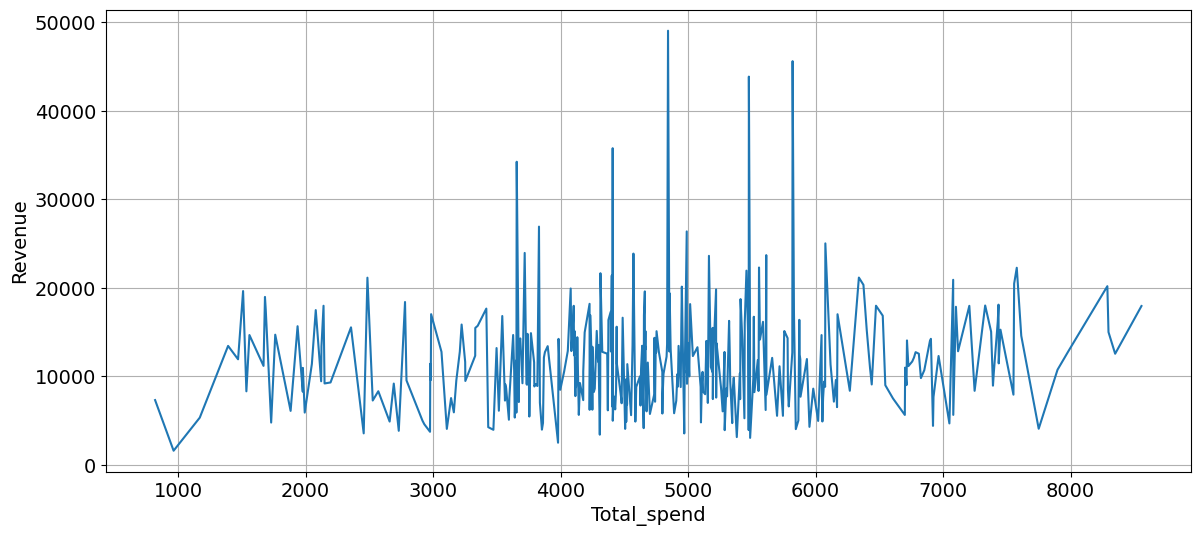

In [82]:
plt.figure(figsize=[14,6])
sns.lineplot(x=spend['Total_spend'],y=spend['Revenue'])
plt.show()

##  •Which product was appeared in the transactions?

In [83]:
final.groupby('Product_Category')[['Transaction_ID']].count().sort_values(by='Transaction_ID',ascending=False).head(1)

Transaction_ID
Product_Category                
Apparel                    18126

## •Which product was purchased mostly based on the quantity?

In [84]:
final.groupby('Product_Category')[['Quantity']].sum().sort_values(by='Quantity',ascending=False).head(1)

Quantity
Product_Category          
Office               88383

## 3.Performing Customer Segmentation
## •Heuristic (Value based, RFM) – Divide the customers into Premium, Gold, Silver, Standard customers and define strategy on the same.
## •Scientific (Using K-Means) & Understand the profiles. Define strategy for each segment.


In [85]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52924 entries, 0 to 52923
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   CustomerID                52924 non-null  object        
 1   Transaction_ID            52924 non-null  object        
 2   Transaction_Date          52924 non-null  datetime64[ns]
 3   Product_SKU               52924 non-null  object        
 4   Product_Description       52924 non-null  object        
 5   Product_Category          52924 non-null  object        
 6   Quantity                  52924 non-null  int64         
 7   Avg_Price                 52924 non-null  float64       
 8   Delivery_Charges          52924 non-null  float64       
 9   Coupon_Status             52924 non-null  object        
 10  Transaction_Month         52924 non-null  int64         
 11  Gender                    52924 non-null  object        
 12  Location          

In [86]:
x=final.groupby(['CustomerID',final.Product_Category.rename('prod_cat')])[['Product_Category']].count()#.reset_index()
cat=x.groupby(['CustomerID'])[['Product_Category']].count()
cat

Product_Category
CustomerID                  
12346                      2
12347                     10
12348                      6
12350                      4
12356                      7
...                      ...
18259                      4
18260                     11
18269                      2
18277                      1
18283                     13

[1468 rows x 1 columns]

In [87]:
y=final.groupby(['CustomerID',final.Product_SKU.rename('prod_cat')])[['Product_SKU']].count()#.reset_index()
sku=y.groupby(['CustomerID'])[['Product_SKU']].count()
sku

Product_SKU
CustomerID             
12346                 2
12347                42
12348                21
12350                11
12356                33
...                 ...
18259                 7
18260                35
18269                 8
18277                 1
18283                69

[1468 rows x 1 columns]

In [88]:
z=final.groupby(['CustomerID',final.Product_Description.rename('prod_cat')])[['Product_Description']].count()#.reset_index()
desc=z.groupby(['CustomerID'])[['Product_Description']].count()
desc

Product_Description
CustomerID                     
12346                         2
12347                        38
12348                        18
12350                        10
12356                        29
...                         ...
18259                         4
18260                        32
18269                         8
18277                         1
18283                        57

[1468 rows x 1 columns]

In [89]:
rev=final.groupby('CustomerID')[['Revenue']].sum()
rev

Revenue
CustomerID           
12346         171.693
12347       10589.289
12348        1339.652
12350        1079.929
12356        1647.219
...               ...
18259         745.905
18260        2367.101
18269         139.966
18277         274.200
18283        6425.273

[1468 rows x 1 columns]

In [90]:
no_of_baskets=final.groupby('CustomerID')[['Transaction_ID']].count()
no_of_baskets

Transaction_ID
CustomerID                
12346                    2
12347                   60
12348                   23
12350                   17
12356                   36
...                    ...
18259                    7
18260                   40
18269                    8
18277                    1
18283                  102

[1468 rows x 1 columns]

In [91]:
a=final.groupby('CustomerID')[['Transaction_Date']].max()
a['Recency']=max(final['Transaction_Date'])-a['Transaction_Date']
rec=a.drop(columns='Transaction_Date')
from datetime import timedelta
rec['Recency']=rec['Recency'].apply(lambda x:x.days)
rec

Recency
CustomerID         
12346           107
12347            59
12348            73
12350            17
12356           107
...             ...
18259           270
18260            87
18269           194
18277            69
18283            82

[1468 rows x 1 columns]

In [92]:
cc=final.groupby('CustomerID')[['Coupon_Code']].count()
cc

Coupon_Code
CustomerID             
12346                 2
12347                59
12348                23
12350                17
12356                36
...                 ...
18259                 6
18260                39
18269                 8
18277                 1
18283               101

[1468 rows x 1 columns]

In [93]:
ten=final.groupby('CustomerID')[['Tenure_Months']].mean()
ten

Tenure_Months
CustomerID               
12346                31.0
12347                20.0
12348                39.0
12350                25.0
12356                31.0
...                   ...
18259                 5.0
18260                43.0
18269                25.0
18277                47.0
18283                36.0

[1468 rows x 1 columns]

In [94]:
m=pd.get_dummies(data=final,columns=['Transaction_Month'])
m1=m.groupby('CustomerID')[['Transaction_Month_1']].sum()
m2=m.groupby('CustomerID')[['Transaction_Month_2']].sum()
m3=m.groupby('CustomerID')[['Transaction_Month_3']].sum()
m4=m.groupby('CustomerID')[['Transaction_Month_4']].sum()
m5=m.groupby('CustomerID')[['Transaction_Month_5']].sum()
m6=m.groupby('CustomerID')[['Transaction_Month_6']].sum()
m7=m.groupby('CustomerID')[['Transaction_Month_7']].sum()
m8=m.groupby('CustomerID')[['Transaction_Month_8']].sum()
m9=m.groupby('CustomerID')[['Transaction_Month_9']].sum()
m10=m.groupby('CustomerID')[['Transaction_Month_10']].sum()
m11=m.groupby('CustomerID')[['Transaction_Month_11']].sum()
m12=m.groupby('CustomerID')[['Transaction_Month_12']].sum()
mt=pd.concat([m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12],axis=1)
mt

Transaction_Month_1  Transaction_Month_2  Transaction_Month_3  \
CustomerID                                                                  
12346                       0.0                    0                    0   
12347                       0.0                    0                   31   
12348                       0.0                    0                    0   
12350                       0.0                    0                    0   
12356                       0.0                    0                    0   
...                         ...                  ...                  ...   
18259                       0.0                    0                    0   
18260                       0.0                    0                    0   
18269                       0.0                    0                    0   
18277                       0.0                    0                    0   
18283                       0.0                    0                    0   

            Transaction_Month_4  Transaction_Month_5  Transaction_Month_6  \
CustomerID                                                                  
12346                         0                    0                    0   
12347                         0                    0                    0   
12348                         0                    0                   17   
12350                         0                    0                    0   
12356                         0                    0                    0   
...                         ...                  ...                  ...   
18259                         7                    0                    0   
18260                         0                    0                   11   
18269                         7                    0                    1   
18277                         0                    0                    0   
18283                         0                    0                    0   

            Transaction_Month_7  Transaction_Month_8  Transaction_Month_9  \
CustomerID                                                                  
12346                         0                    0                    2   
12347                         0                    0                    0   
12348                         0                    0                    0   
12350                         0                    0                    0   
12356                         0                    0                   36   
...                         ...                  ...                  ...   
18259                         0                    0                    0   
18260                         0                   26                    0   
18269                         0                    0                    0   
18277                         0                    0                    0   
18283                        57                    0                    0   

            Transaction_Month_10  Transaction_Month_11  Transaction_Month_12  
CustomerID                                                                    
12346                          0                     0                   0.0  
12347                          0                    29                   0.0  
12348                          6                     0                   0.0  
12350                          0                     0                  17.0  
12356                          0                     0                   0.0  
...                          ...                   ...                   ...  
18259                          0                     0                   0.0  
18260                          3                     0                   0.0  
18269                          0                     0                   0.0  
18277                          1                     0                   0.0  
18283                         45                     0    

In [95]:
data=pd.concat([cat,sku,desc,rev,no_of_baskets,rec,cc,ten,mt],axis=1).rename(columns={'Product_Category':'prod_cats',
                                                                       'Product_SKU':'no_skus',
                                                                       'Product_Description':'item_cnts',
                                                                       'Transaction_ID':'Frequency',
                                                                       'Revenue':'Monetary',
                                                                       'Coupon_Code':'no_coupon_codes',
                                                                       'Tenure_Months':'avg_tenure'})


In [96]:
data=data.reset_index()
data.head()

CustomerID  prod_cats  no_skus  item_cnts   Monetary  Frequency  Recency  \
0      12346          2        2          2    171.693          2      107   
1      12347         10       42         38  10589.289         60       59   
2      12348          6       21         18   1339.652         23       73   
3      12350          4       11         10   1079.929         17       17   
4      12356          7       33         29   1647.219         36      107   

   no_coupon_codes  avg_tenure  Transaction_Month_1  ...  Transaction_Month_3  \
0                2        31.0                  0.0  ...                    0   
1               59        20.0                  0.0  ...                   31   
2               23        39.0                  0.0  ...                    0   
3               17        25.0                  0.0  ...                    0   
4               36        31.0                  0.0  ...                    0   

   Transaction_Month_4  Transaction_Month_5  Transaction_Month_6  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                   17   
3                    0                    0                    0   
4                    0                    0                    0   

   Transaction_Month_7  Transaction_Month_8  Transaction_Month_9  \
0                    0                    0                    2   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                   36   

   Transaction_Month_10  Transaction_Month_11  Transaction_Month_12  
0                     0                     0                   0.0  
1                     0                    29                   0.0  
2                     6                     0                   0.0  
3                     0                     0                  17.0  
4                     0                     0                   0.0  

[5 rows x 21 columns]

In [97]:
data.CustomerID=data.CustomerID.astype('str')

## Heuristic Segmentation-Value Based

In [98]:
seg=data.copy()

In [99]:
# Segmenting customers on Revenue
seg['Value_seg']=pd.qcut(seg.Monetary, q =10,labels=False)
seg

CustomerID  prod_cats  no_skus  item_cnts   Monetary  Frequency  Recency  \
0         12346          2        2          2    171.693          2      107   
1         12347         10       42         38  10589.289         60       59   
2         12348          6       21         18   1339.652         23       73   
3         12350          4       11         10   1079.929         17       17   
4         12356          7       33         29   1647.219         36      107   
...         ...        ...      ...        ...        ...        ...      ...   
1463      18259          4        7          4    745.905          7      270   
1464      18260         11       35         32   2367.101         40       87   
1465      18269          2        8          8    139.966          8      194   
1466      18277          1        1          1    274.200          1       69   
1467      18283         13       69         57   6425.273        102       82   

      no_coupon_codes  avg_tenure  Transaction_Month_1  ...  \
0                   2        31.0                  0.0  ...   
1                  59        20.0                  0.0  ...   
2                  23        39.0                  0.0  ...   
3                  17        25.0                  0.0  ...   
4                  36        31.0                  0.0  ...   
...               ...         ...                  ...  ...   
1463                6         5.0                  0.0  ...   
1464               39        43.0                  0.0  ...   
1465                8        25.0                  0.0  ...   
1466                1        47.0                  0.0  ...   
1467              101        36.0                  0.0  ...   

      Transaction_Month_4  Transaction_Month_5  Transaction_Month_6  \
0                       0                    0                    0   
1                       0                    0                    0   
2                       0                    0                   17   
3                       0                    0                    0   
4                       0                    0                    0   
...                   ...                  ...                  ...   
1463                    7                    0                    0   
1464                    0                    0                   11   
1465                    7                    0                    1   
1466                    0                    0                    0   
1467                    0                    0                    0   

      Transaction_Month_7  Transaction_Month_8  Transaction_Month_9  \
0                       0                    0                    2   
1                       0                    0                    0   
2                       0                    0                    0   
3                       0                    0                    0   
4                       0                    0                   36   
...                   ...                  ...                  ...   
1463                    0                    0                    0   
1464                    0                   26                    0   
1465                    0                    0                    0   
1466                    0                    0                    0   
1467                   57                    0                    0   

      Transaction_Month_10  Transaction_Month_11  Transaction_Month_12  \
0                        0                     0                   0.0   
1                        0                    29                   0.0   
2                        6                     0                   0.0   
3                        0                     0                  17.0   
4                        0                     0                   0.0   
...                    ...                   ...                   ...   
1463                     0                     0   

In [100]:
#Percentage of revenue by each segment
seg.groupby(by='Value_seg')[['Monetary']].sum()/np.sum(seg.groupby(by='Value_seg')[['Monetary']].sum())

Monetary
Value_seg          
0          0.002540
1          0.011132
2          0.021456
3          0.031967
4          0.047068
5          0.064740
6          0.087987
7          0.123852
8          0.185745
9          0.423513

# RFM Segmentation

In [101]:
quantiles = seg[['Frequency','Monetary','Recency' ]].quantile(q=[0.33,0.67])
quantiles

Frequency    Monetary  Recency
0.33       13.0   858.96110    78.00
0.67       35.0  2758.38507   187.89

In [102]:
seg['r_seg'] = np.where(seg.Recency<=78, 'Active', np.where(seg.Recency<=187, 'At Risk', 'Churn'))
seg['m_seg'] = np.where(seg.Monetary<=858.96110, 1, np.where(seg.Monetary<=2758.38507, 2, 3))
seg['f_seg'] = np.where(seg.Frequency<=13, 1, np.where(seg.Frequency<=35, 2, 3))

In [103]:
seg['fm_seg']=np.where(((seg.m_seg==3)&(seg.f_seg==3)),'Platinum',np.where(((seg.m_seg==3)&(seg.f_seg==2))|((seg.m_seg==2)&(seg.f_seg==3)),'Gold',np.where(((seg.m_seg==1)&(seg.f_seg==3))|((seg.m_seg==3)&(seg.f_seg==1))|((seg.m_seg==1)&(seg.f_seg==3))|((seg.m_seg==3)&(seg.f_seg==1))
         |((seg.m_seg==2)&(seg.f_seg==2)),'Silver','Standard')))
seg

CustomerID  prod_cats  no_skus  item_cnts   Monetary  Frequency  Recency  \
0         12346          2        2          2    171.693          2      107   
1         12347         10       42         38  10589.289         60       59   
2         12348          6       21         18   1339.652         23       73   
3         12350          4       11         10   1079.929         17       17   
4         12356          7       33         29   1647.219         36      107   
...         ...        ...      ...        ...        ...        ...      ...   
1463      18259          4        7          4    745.905          7      270   
1464      18260         11       35         32   2367.101         40       87   
1465      18269          2        8          8    139.966          8      194   
1466      18277          1        1          1    274.200          1       69   
1467      18283         13       69         57   6425.273        102       82   

      no_coupon_codes  avg_tenure  Transaction_Month_1  ...  \
0                   2        31.0                  0.0  ...   
1                  59        20.0                  0.0  ...   
2                  23        39.0                  0.0  ...   
3                  17        25.0                  0.0  ...   
4                  36        31.0                  0.0  ...   
...               ...         ...                  ...  ...   
1463                6         5.0                  0.0  ...   
1464               39        43.0                  0.0  ...   
1465                8        25.0                  0.0  ...   
1466                1        47.0                  0.0  ...   
1467              101        36.0                  0.0  ...   

      Transaction_Month_8  Transaction_Month_9  Transaction_Month_10  \
0                       0                    2                     0   
1                       0                    0                     0   
2                       0                    0                     6   
3                       0                    0                     0   
4                       0                   36                     0   
...                   ...                  ...                   ...   
1463                    0                    0                     0   
1464                   26                    0                     3   
1465                    0                    0                     0   
1466                    0                    0                     1   
1467                    0                    0                    45   

      Transaction_Month_11  Transaction_Month_12  Value_seg    r_seg  m_seg  \
0                        0                   0.0          0  At Risk      1   
1                       29                   0.0          9   Active      3   
2                        0                   0.0          4   Active      2   
3                        0                  17.0          3   Active      2   
4                        0                   0.0          5  At Risk      2   
...                    ...                   ...        ...      ...    ...   
1463                     0                   0.0          2    Churn      1   
1464                     0                   0.0          6  At Risk      2   
1465                     0                   0.0          0    Churn      1   
1466                     0                   0.0          1   Active      1   
1467                     0                   0.0          8  At Risk      3   

      f_seg    fm_seg  
0         1  Standard  
1         3  Platinum  
2         2    Silver  
3         2    Silver  
4         3      Gold  
...     ...       ...  
1463      1  Standard  
1464      3      Gold  
1465      1  Standard  
1466      1  Standard  
1467      3  Platinum  

[1468 rows x 26 columns]

In [104]:
seg=seg.reset_index()

In [105]:
#Profiling of Customers
seg.groupby(['r_seg','fm_seg'])[['prod_cats','no_skus','item_cnts','Monetary','Frequency','Recency','no_coupon_codes','avg_tenure']].mean().T

r_seg                 Active                                        \
fm_seg                  Gold     Platinum       Silver    Standard   
prod_cats           6.982456     9.542105     6.000000    3.522727   
no_skus            24.385965    57.878947    17.925234    7.757576   
item_cnts          22.403509    50.257895    16.766355    7.265152   
Monetary         3169.450702  8407.681900  1808.878065  669.730553   
Frequency          32.035088    95.226316    22.093458    8.696970   
Recency            36.631579    35.278947    34.738318   35.674242   
no_coupon_codes    31.807018    94.700000    22.065421    8.696970   
avg_tenure         23.122807    26.000000    25.009346   27.636364   

r_seg                At Risk                                        \
fm_seg                  Gold     Platinum       Silver    Standard   
prod_cats           7.934783     9.777778     6.397959    3.623853   
no_skus            32.891304    58.866667    21.132653    8.000000   
item_cnts          29.413043    50.866667    19.683673    7.444954   
Monetary         2522.720826  6534.030822  1662.296612  492.002294   
Frequency          39.673913    86.155556    24.428571    8.467890   
Recency           121.456522   125.644444   134.744898  133.821101   
no_coupon_codes    39.478261    85.355556    24.316327    8.408257   
avg_tenure         28.304348    25.748148    27.367347   24.059633   

r_seg                 Churn                                        
fm_seg                 Gold     Platinum       Silver    Standard  
prod_cats           7.05000     9.000000     5.640351    3.130612  
no_skus            28.50000    47.744186    18.280702    7.065306  
item_cnts          25.52500    43.139535    16.728070    6.628571  
Monetary         3021.68925  5888.547442  1621.417956  520.241943  
Frequency          36.17500    69.604651    21.736842    7.697959  
Recency           265.25000   271.104651   257.833333  270.853061  
no_coupon_codes    35.72500    68.627907    21.570175    7.608163  
avg_tenure         26.75000    25.197674    27.307018   26.130612

In [106]:
seg['rfm_seg']=seg['r_seg']+'_'+seg['fm_seg']

In [107]:
seg.rfm_seg.value_counts()

Churn_Standard      245
At Risk_Standard    218
Active_Platinum     190
At Risk_Platinum    135
Active_Standard     132
Churn_Silver        114
Active_Silver       107
At Risk_Silver       98
Churn_Platinum       86
Active_Gold          57
At Risk_Gold         46
Churn_Gold           40
Name: rfm_seg, dtype: int64

In [108]:
seg.rfm_seg.value_counts()/seg.rfm_seg.value_counts().sum()

Churn_Standard      0.166894
At Risk_Standard    0.148501
Active_Platinum     0.129428
At Risk_Platinum    0.091962
Active_Standard     0.089918
Churn_Silver        0.077657
Active_Silver       0.072888
At Risk_Silver      0.066757
Churn_Platinum      0.058583
Active_Gold         0.038828
At Risk_Gold        0.031335
Churn_Gold          0.027248
Name: rfm_seg, dtype: float64

## Win-back Campaign

In [109]:
#Usage of coupons by Segemnts
seg[seg.rfm_seg=='Churn_Standard'].groupby(by='CustomerID')[['no_coupon_codes']].mean().mean()
seg[seg.rfm_seg=='Churn_Silver'].groupby(by='CustomerID')[['no_coupon_codes']].mean().mean()
seg[seg.rfm_seg=='Churn_Gold'].groupby(by='CustomerID')[['no_coupon_codes']].mean().mean()
seg[seg.rfm_seg=='At Risk_Standard'].groupby(by='CustomerID')[['no_coupon_codes']].mean().mean()
seg[seg.rfm_seg=='At Risk_Silver'].groupby(by='CustomerID')[['no_coupon_codes']].mean().mean()
seg[seg.rfm_seg=='At Risk_Gold'].groupby(by='CustomerID')[['no_coupon_codes']].mean().mean()
seg[seg.rfm_seg=='Active_Standard'].groupby(by='CustomerID')[['no_coupon_codes']].mean().mean()
seg[seg.rfm_seg=='Active_Silver'].groupby(by='CustomerID')[['no_coupon_codes']].mean().mean()
seg[seg.rfm_seg=='Active_Gold'].groupby(by='CustomerID')[['no_coupon_codes']].mean().mean()

no_coupon_codes    31.807018
dtype: float64

In [110]:
#Customer Segments who have used least no.of discount coupons
p=seg[seg.rfm_seg=='Churn_Standard'][['CustomerID']]
q=seg[seg.rfm_seg=='At Risk_Standard'][['CustomerID']]
r=seg[seg.rfm_seg=='Active_Standard'][['CustomerID']]
pd.concat([p,q,r],axis=0)

CustomerID
27        12434
29        12441
58        12551
68        12586
73        12605
...         ...
1385      17929
1405      18008
1408      18017
1438      18144
1466      18277

[595 rows x 1 columns]

Customer Segments in the above categories can be included in the Win-Back Campaign. These customers should be given more discounts and offers as a strategy to win them back in business.

## Retention Campaign

In [111]:
# Purchase pattern of Segments
seg[seg.rfm_seg=='Churn_Standard'].groupby(by='CustomerID')[['no_skus']].mean().mean()
seg[seg.rfm_seg=='Churn_Silver'].groupby(by='CustomerID')[['no_skus']].mean().mean()
seg[seg.rfm_seg=='Churn_Gold'].groupby(by='CustomerID')[['no_skus']].mean().mean()
seg[seg.rfm_seg=='Churn_Platinum'].groupby(by='CustomerID')[['no_skus']].mean().mean()
seg[seg.rfm_seg=='At Risk_Standard'].groupby(by='CustomerID')[['no_skus']].mean().mean()
seg[seg.rfm_seg=='At Risk_Silver'].groupby(by='CustomerID')[['no_skus']].mean().mean()
seg[seg.rfm_seg=='At Risk_Gold'].groupby(by='CustomerID')[['no_skus']].mean().mean()
seg[seg.rfm_seg=='At Risk_Platinum'].groupby(by='CustomerID')[['no_skus']].mean().mean()
seg[seg.rfm_seg=='Active_Standard'].groupby(by='CustomerID')[['no_skus']].mean().mean()
seg[seg.rfm_seg=='Active_Silver'].groupby(by='CustomerID')[['no_skus']].mean().mean()
seg[seg.rfm_seg=='Active_Gold'].groupby(by='CustomerID')[['no_skus']].mean().mean()
seg[seg.rfm_seg=='Active_Platinum'].groupby(by='CustomerID')[['no_skus']].mean().mean()

no_skus    57.878947
dtype: float64

In [112]:
#Customers who purchase most number of products
a=seg[seg.rfm_seg=='Churn_Silver'][['CustomerID']]
b=seg[seg.rfm_seg=='At Risk_Gold'][['CustomerID']]
c=seg[seg.rfm_seg=='At Risk_Platinum'][['CustomerID']]
d=seg[seg.rfm_seg=='Active_Platinum'][['CustomerID']]
pd.concat([a,b,c,d],axis=0)

CustomerID
24        12429
122       12763
169       12963
170       12967
195       13065
...         ...
1423      18077
1435      18125
1439      18145
1459      18239
1460      18245

[485 rows x 1 columns]

The above customers can be included in the Retention Campaign.These customers can be retained by giving them more offers on the products they usually buy.

## Upselling 

In [113]:
x=seg[seg.rfm_seg=='Active_Standard'][['CustomerID']]
y=seg[seg.rfm_seg=='Active_Silver'][['CustomerID']]
z=seg[seg.rfm_seg=='Active_Gold'][['CustomerID']]
v=seg[seg.rfm_seg=='Active_Platinum'][['CustomerID']]
u=seg[seg.rfm_seg=='At Risk_Platinum'][['CustomerID']]
t=seg[seg.rfm_seg=='At Risk_Gold'][['CustomerID']]

In [114]:
pd.concat([x,y,z,v,u,t],axis=0)

CustomerID
7         12373
17        12414
20        12421
31        12464
32        12468
...         ...
1338      17769
1361      17858
1429      18106
1451      18212
1464      18260

[667 rows x 1 columns]

The above customers can be included in the upselling campaign, and make them increase the quantity of purchase.

## Cross-Selling 

In [115]:
x=seg[seg.rfm_seg=='Active_Standard'][['CustomerID']]
y=seg[seg.rfm_seg=='Active_Silver'][['CustomerID']]
z=seg[seg.rfm_seg=='Active_Gold'][['CustomerID']]
v=seg[seg.rfm_seg=='Active_Platinum'][['CustomerID']]

In [116]:
pd.concat([x,y,z,v],axis=0)

CustomerID
7         12373
17        12414
20        12421
31        12464
32        12468
...         ...
1423      18077
1435      18125
1439      18145
1459      18239
1460      18245

[486 rows x 1 columns]

The above customers can be made to expand the market basket by suggesting products usually bought together .

# K-Means Clustering

## Data Preprocessing

In [117]:
data_km=data[data.columns.difference(['CustomerID'])]
col=data_km.columns
data_num=data_km[['prod_cats','no_skus','item_cnts','Monetary','Frequency','Recency','no_coupon_codes','avg_tenure']]

In [118]:
data_km.head()

Frequency   Monetary  Recency  Transaction_Month_1  Transaction_Month_10  \
0          2    171.693      107                  0.0                     0   
1         60  10589.289       59                  0.0                     0   
2         23   1339.652       73                  0.0                     6   
3         17   1079.929       17                  0.0                     0   
4         36   1647.219      107                  0.0                     0   

   Transaction_Month_11  Transaction_Month_12  Transaction_Month_2  \
0                     0                   0.0                    0   
1                    29                   0.0                    0   
2                     0                   0.0                    0   
3                     0                  17.0                    0   
4                     0                   0.0                    0   

   Transaction_Month_3  Transaction_Month_4  Transaction_Month_5  \
0                    0                    0                    0   
1                   31                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   Transaction_Month_6  Transaction_Month_7  Transaction_Month_8  \
0                    0                    0                    0   
1                    0                    0                    0   
2                   17                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   Transaction_Month_9  avg_tenure  item_cnts  no_coupon_codes  no_skus  \
0                    2        31.0          2                2        2   
1                    0        20.0         38               59       42   
2                    0        39.0         18               23       21   
3                    0        25.0         10               17       11   
4                   36        31.0         29               36       33   

   prod_cats  
0          2  
1         10  
2          6  
3          4  
4          7

In [119]:
data_num.head()

prod_cats  no_skus  item_cnts   Monetary  Frequency  Recency  \
0          2        2          2    171.693          2      107   
1         10       42         38  10589.289         60       59   
2          6       21         18   1339.652         23       73   
3          4       11         10   1079.929         17       17   
4          7       33         29   1647.219         36      107   

   no_coupon_codes  avg_tenure  
0                2        31.0  
1               59        20.0  
2               23        39.0  
3               17        25.0  
4               36        31.0

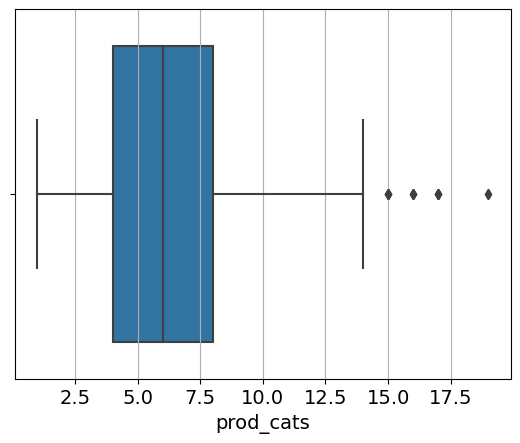

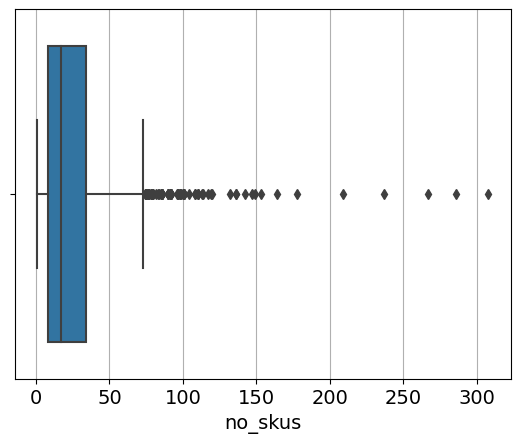

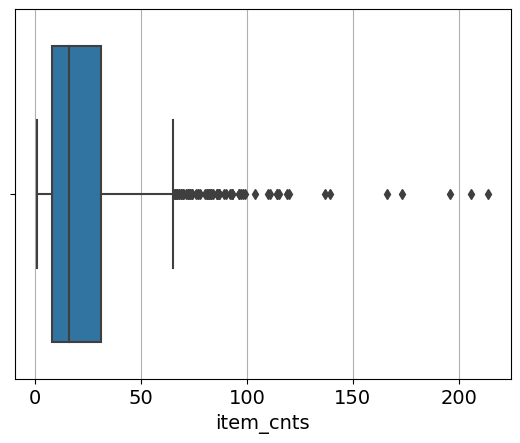

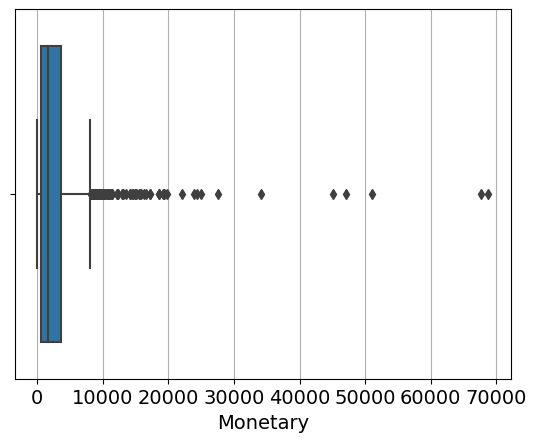

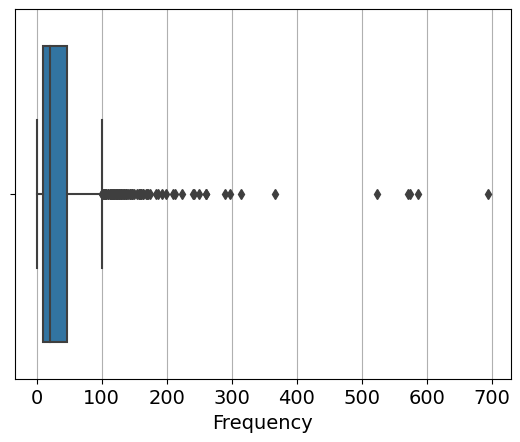

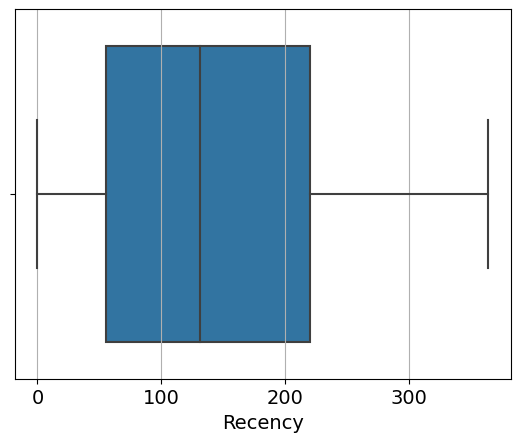

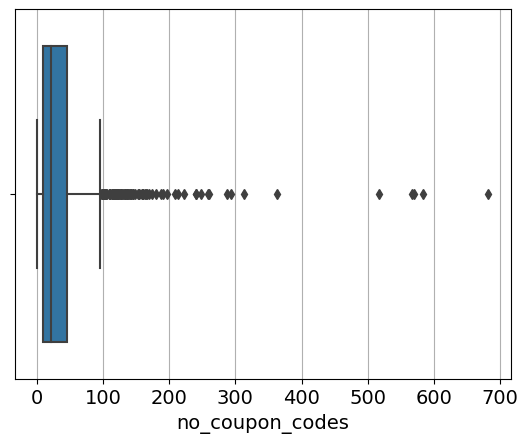

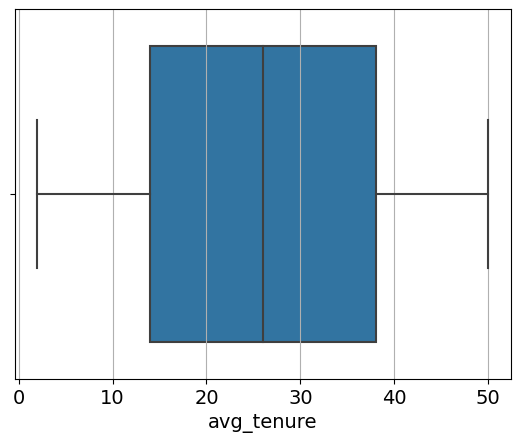

In [120]:
#Checking for outliers:
for i in data_num.columns:
    sns.boxplot(data_num[i])
    plt.show()

In [121]:
## Transforming X variables 
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson',standardize=True)
pg=pt.fit_transform(data_km)

In [122]:
data_trs = pd.DataFrame(pg,index=data_km.index,columns=data_km.columns)
data_trs_num=data_trs[['prod_cats','no_skus','item_cnts','Monetary','Frequency','Recency','no_coupon_codes','avg_tenure',
                       ]]

In [123]:
# Handling Outliers
data_trs_num = data_trs_num.apply(lambda x: x.clip(lower = x.quantile(0.01), upper = x.quantile(0.99)))

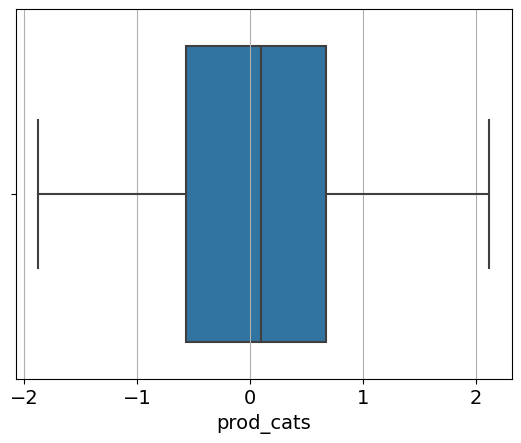

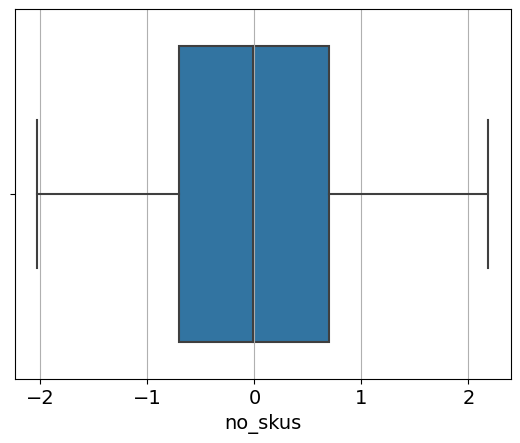

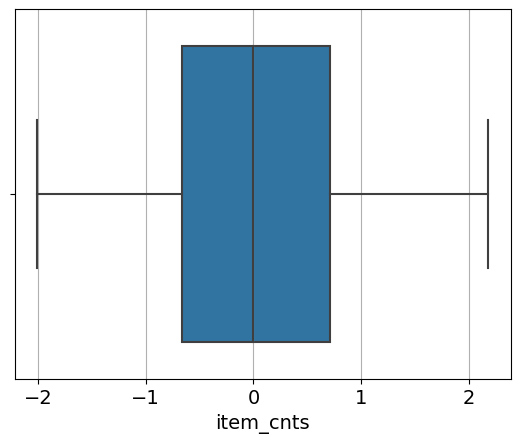

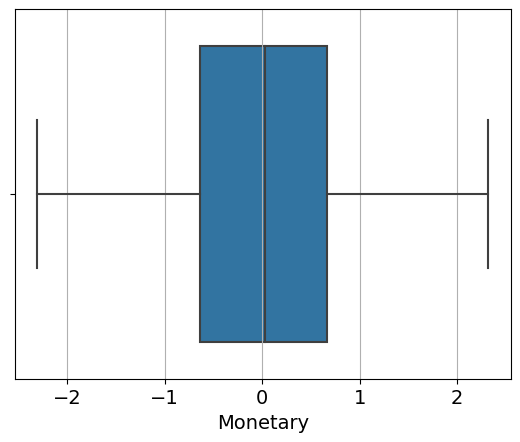

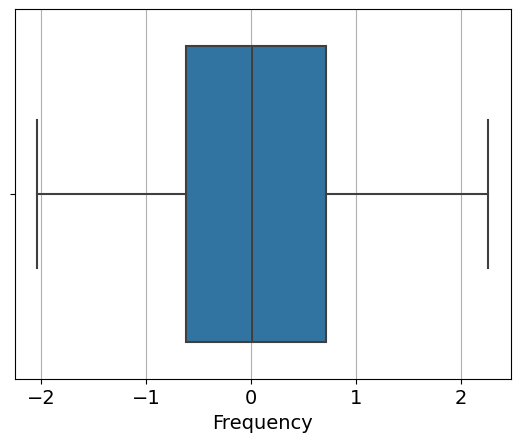

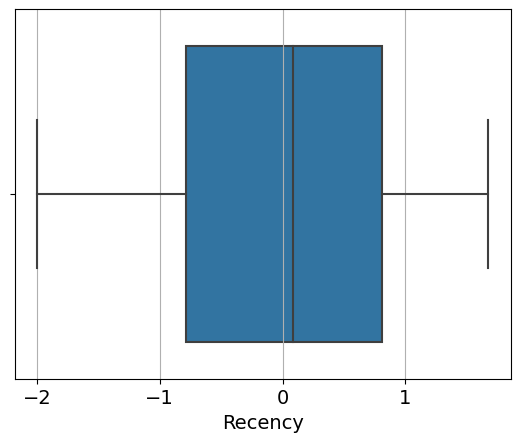

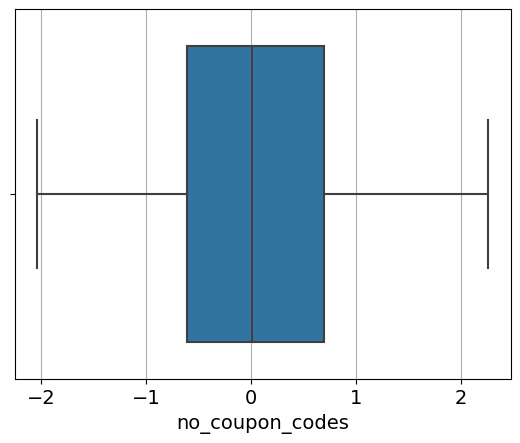

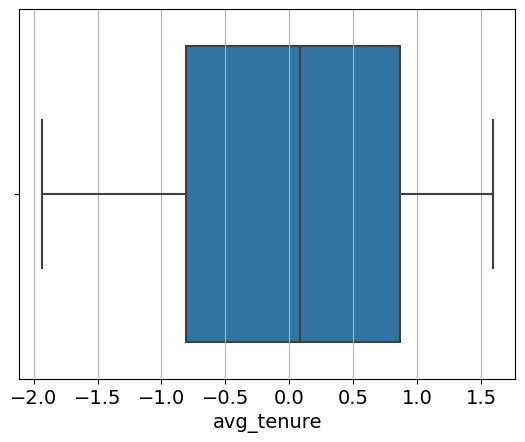

In [124]:
#Checking data after outlier treatment
for i in data_trs_num.columns:
    sns.boxplot(data_trs_num[i])
    plt.show()

C:\Users\itsfe\anaconda3\lib\site-packages\seaborn\matrix.py:302: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.

C:\Users\itsfe\anaconda3\lib\site-packages\seaborn\matrix.py:312: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



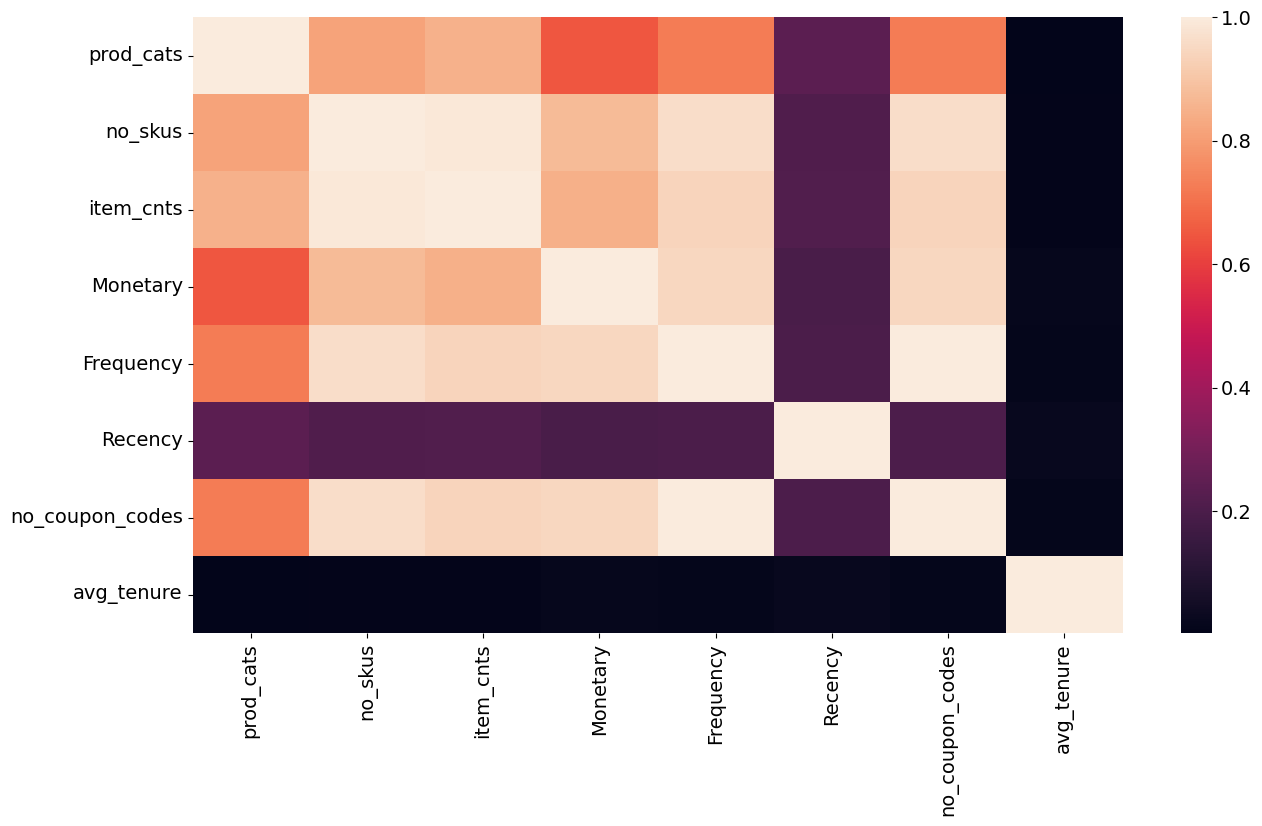

In [125]:
# Visualize correlation matrix in Seaborn using a heatmap
plt.figure(figsize = (15, 8))
sns.heatmap(data_num.corr().abs())
plt.show()

In [126]:
#Tabulation of corelation between variables
np.abs(data_num.corr())

prod_cats   no_skus  item_cnts  Monetary  Frequency  \
prod_cats         1.000000  0.815921   0.849892  0.647815   0.726371   
no_skus           0.815921  1.000000   0.992119  0.872656   0.963599   
item_cnts         0.849892  0.992119   1.000000  0.846285   0.940856   
Monetary          0.647815  0.872656   0.846285  1.000000   0.946366   
Frequency         0.726371  0.963599   0.940856  0.946366   1.000000   
Recency           0.238115  0.208483   0.214544  0.194273   0.199993   
no_coupon_codes   0.725758  0.963400   0.940729  0.946272   0.999937   
avg_tenure        0.001472  0.006314   0.006366  0.014909   0.010963   

                  Recency  no_coupon_codes  avg_tenure  
prod_cats        0.238115         0.725758    0.001472  
no_skus          0.208483         0.963400    0.006314  
item_cnts        0.214544         0.940729    0.006366  
Monetary         0.194273         0.946272    0.014909  
Frequency        0.199993         0.999937    0.010963  
Recency          1.000000         0.202216    0.022597  
no_coupon_codes  0.202216         1.000000    0.011617  
avg_tenure       0.022597         0.011617    1.000000

In [127]:
## Standardization of data
sc=StandardScaler()
data_std=sc.fit_transform(data_trs)
data_std

array([[-1.71446399, -1.3416887 , -0.14783068, ..., -1.71221398,
        -1.69488567, -1.3745743 ],
       [ 0.9681264 ,  1.68984063, -0.72606313, ...,  0.95925106,
         0.9319753 ,  1.19366441],
       [ 0.08340305, -0.10665782, -0.53780719, ...,  0.08930224,
         0.19256412,  0.09415479],
       ...,
       [-0.79343608, -1.44125993,  0.61889136, ..., -0.78916697,
        -0.70827007, -1.3745743 ],
       [-2.03889211, -1.09904828, -0.58950957, ..., -2.03743219,
        -2.02839937, -1.87532504],
       [ 1.48780462,  1.19329653, -0.42664937, ...,  1.48591781,
         1.50689493,  1.89762126]])

In [128]:
std_data=pd.DataFrame(data_std,columns=data_trs.columns)

In [129]:
std_data.head()

Frequency  Monetary   Recency  Transaction_Month_1  Transaction_Month_10  \
0  -1.714464 -1.341689 -0.147831            -0.413671             -0.407977   
1   0.968126  1.689841 -0.726063            -0.413671             -0.407977   
2   0.083403 -0.106658 -0.537807            -0.413671              2.490865   
3  -0.179311 -0.258591 -1.511469            -0.413671             -0.407977   
4   0.487609  0.044642 -0.147831            -0.413671             -0.407977   

   Transaction_Month_11  Transaction_Month_12  Transaction_Month_2  \
0             -0.382866             -0.437047            -0.283195   
1              2.656339             -0.437047            -0.283195   
2             -0.382866             -0.437047            -0.283195   
3             -0.382866              2.340295            -0.283195   
4             -0.382866             -0.437047            -0.283195   

   Transaction_Month_3  Transaction_Month_4  Transaction_Month_5  \
0            -0.405825            -0.423612            -0.396452   
1             2.507841            -0.423612            -0.396452   
2            -0.405825            -0.423612            -0.396452   
3            -0.405825            -0.423612            -0.396452   
4            -0.405825            -0.423612            -0.396452   

   Transaction_Month_6  Transaction_Month_7  Transaction_Month_8  \
0            -0.461590            -0.436201            -0.504381   
1            -0.461590            -0.436201            -0.504381   
2             2.236232            -0.436201            -0.504381   
3            -0.461590            -0.436201            -0.504381   
4            -0.461590            -0.436201            -0.504381   

   Transaction_Month_9  avg_tenure  item_cnts  no_coupon_codes   no_skus  \
0             2.478224    0.418221  -1.668964        -1.712214 -1.694886   
1            -0.388639   -0.345290   0.945017         0.959251  0.931975   
2            -0.388639    0.930516   0.118064         0.089302  0.192564   
3            -0.388639    0.012039  -0.458535        -0.173872 -0.428459   
4             2.622861    0.418221   0.633907         0.494168  0.666300   

   prod_cats  
0  -1.374574  
1   1.193664  
2   0.094155  
3  -0.569077  
4   0.392004

In [130]:
data_std.shape

(1468, 20)

## Dimensionality Reduction: Applying PCA

In [131]:
#Reducing variables to PCAs and checking Eigen values
pc=PCA(n_components=20).fit(data_std)
pc.explained_variance_

array([6.20800609e+00, 1.80909890e+00, 1.12727116e+00, 1.08142347e+00,
       1.07748903e+00, 1.02354454e+00, 1.01205520e+00, 1.00259892e+00,
       9.85951916e-01, 9.52763299e-01, 9.11532311e-01, 8.87806577e-01,
       8.53167240e-01, 7.17187121e-01, 1.58102968e-01, 9.61404229e-02,
       9.18852312e-02, 1.33108835e-02, 4.15232398e-03, 1.45665850e-04])

In [132]:
pc.explained_variance_/sum(pc.explained_variance_)

array([3.10188860e-01, 9.03933271e-02, 5.63251631e-02, 5.40343403e-02,
       5.38377521e-02, 5.11423652e-02, 5.05682893e-02, 5.00957978e-02,
       4.92640143e-02, 4.76057139e-02, 4.55455688e-02, 4.43600902e-02,
       4.26293032e-02, 3.58349287e-02, 7.89976343e-03, 4.80374661e-03,
       4.59113195e-03, 6.65090806e-04, 2.07474771e-04, 7.27833113e-06])

In [133]:
# Amount of variance that each PC explains
pc.explained_variance_ratio_


array([3.10188860e-01, 9.03933271e-02, 5.63251631e-02, 5.40343403e-02,
       5.38377521e-02, 5.11423652e-02, 5.05682893e-02, 5.00957978e-02,
       4.92640143e-02, 4.76057139e-02, 4.55455688e-02, 4.43600902e-02,
       4.26293032e-02, 3.58349287e-02, 7.89976343e-03, 4.80374661e-03,
       4.59113195e-03, 6.65090806e-04, 2.07474771e-04, 7.27833113e-06])

In [134]:
#Cumulative variance
cv=np.round(np.cumsum(pc.explained_variance_ratio_)*100,2)

In [135]:
pd.DataFrame({'Eigen_values':pc.explained_variance_,'Variance_Ratio':np.round(pc.explained_variance_ratio_*100,2),'Cum_Variance':cv})

Eigen_values  Variance_Ratio  Cum_Variance
0       6.208006           31.02         31.02
1       1.809099            9.04         40.06
2       1.127271            5.63         45.69
3       1.081423            5.40         51.09
4       1.077489            5.38         56.48
5       1.023545            5.11         61.59
6       1.012055            5.06         66.65
7       1.002599            5.01         71.66
8       0.985952            4.93         76.58
9       0.952763            4.76         81.35
10      0.911532            4.55         85.90
11      0.887807            4.44         90.34
12      0.853167            4.26         94.60
13      0.717187            3.58         98.18
14      0.158103            0.79         98.97
15      0.096140            0.48         99.45
16      0.091885            0.46         99.91
17      0.013311            0.07         99.98
18      0.004152            0.02        100.00
19      0.000146            0.00        100.00

Number of components is chosen as 8 as it is explaining cumulative variance > 75 % and individual component explaining > 0.8 variance

In [136]:
#Fitting data on selected 8 PCAs
pc_final=PCA(n_components=8).fit(data_std)
pc_final

PCA(n_components=8)

In [137]:
pc_final.explained_variance_

array([6.20800609, 1.8090989 , 1.12727116, 1.08142347, 1.07748903,
       1.02354454, 1.0120552 , 1.00259892])

In [138]:
red=pc_final.fit_transform(data_std)

In [139]:
dim=pd.DataFrame(red,columns=['C1','C2','C3','C4','C5','C6','C7','C8'])

In [140]:
dim.shape

(1468, 8)

In [141]:
pd.DataFrame(data_std).head()

0         1         2         3         4         5         6   \
0 -1.714464 -1.341689 -0.147831 -0.413671 -0.407977 -0.382866 -0.437047   
1  0.968126  1.689841 -0.726063 -0.413671 -0.407977  2.656339 -0.437047   
2  0.083403 -0.106658 -0.537807 -0.413671  2.490865 -0.382866 -0.437047   
3 -0.179311 -0.258591 -1.511469 -0.413671 -0.407977 -0.382866  2.340295   
4  0.487609  0.044642 -0.147831 -0.413671 -0.407977 -0.382866 -0.437047   

         7         8         9         10        11        12        13  \
0 -0.283195 -0.405825 -0.423612 -0.396452 -0.461590 -0.436201 -0.504381   
1 -0.283195  2.507841 -0.423612 -0.396452 -0.461590 -0.436201 -0.504381   
2 -0.283195 -0.405825 -0.423612 -0.396452  2.236232 -0.436201 -0.504381   
3 -0.283195 -0.405825 -0.423612 -0.396452 -0.461590 -0.436201 -0.504381   
4 -0.283195 -0.405825 -0.423612 -0.396452 -0.461590 -0.436201 -0.504381   

         14        15        16        17        18        19  
0  2.478224  0.418221 -1.668964 -1.712214 -1.694886 -1.374574  
1 -0.388639 -0.345290  0.945017  0.959251  0.931975  1.193664  
2 -0.388639  0.930516  0.118064  0.089302  0.192564  0.094155  
3 -0.388639  0.012039 -0.458535 -0.173872 -0.428459 -0.569077  
4  2.622861  0.418221  0.633907  0.494168  0.666300  0.392004

In [142]:
dim.head()

C1        C2        C3        C4        C5        C6        C7  \
0 -3.821856  0.627901  0.444710 -0.765806  1.412144  1.063525 -0.885164   
1  2.811499  0.262303  0.967937 -0.690890 -1.193225 -2.116058 -1.165989   
2  0.311982  0.625065 -0.738135  0.849736 -1.490587  1.935749 -1.052522   
3 -0.785580  2.429799  0.103604  0.684209  1.123970 -0.877498  0.211371   
4  0.947217 -0.156496  0.378917 -0.789989  1.491775  0.742205 -1.242939   

         C8  
0 -0.547997  
1  0.636519  
2  1.257191  
3 -0.166581  
4 -0.911539

#### Loading Matrix

Loadings=Eigenvectors * sqrt(Eigenvalues)

Loadings are the covariances/correlations between the original variables and the unit-scaled components.

In [143]:
data_std

array([[-1.71446399, -1.3416887 , -0.14783068, ..., -1.71221398,
        -1.69488567, -1.3745743 ],
       [ 0.9681264 ,  1.68984063, -0.72606313, ...,  0.95925106,
         0.9319753 ,  1.19366441],
       [ 0.08340305, -0.10665782, -0.53780719, ...,  0.08930224,
         0.19256412,  0.09415479],
       ...,
       [-0.79343608, -1.44125993,  0.61889136, ..., -0.78916697,
        -0.70827007, -1.3745743 ],
       [-2.03889211, -1.09904828, -0.58950957, ..., -2.03743219,
        -2.02839937, -1.87532504],
       [ 1.48780462,  1.19329653, -0.42664937, ...,  1.48591781,
         1.50689493,  1.89762126]])

In [144]:
pc_final.components_

array([[ 3.95522892e-01,  3.73462652e-01, -1.34125308e-01,
         2.22794660e-02,  8.14751452e-02,  1.02403148e-01,
         6.78964106e-02,  1.04652286e-01,  7.05503673e-02,
         3.02646337e-02,  9.45066203e-02,  7.12137050e-02,
         1.07523076e-01,  9.56160164e-02,  8.00129166e-02,
         4.92142939e-03,  3.93962297e-01,  3.95460443e-01,
         3.93868125e-01,  3.73043185e-01],
       [-6.35587562e-02, -3.23432030e-02, -6.75343838e-01,
        -2.13725653e-01,  1.96234061e-01,  2.55548313e-01,
         5.27976538e-01, -7.64165610e-02, -1.48145456e-01,
        -1.97912196e-01, -9.30555720e-02, -1.88950288e-02,
         2.25165031e-02,  1.07659730e-01,  4.47917403e-02,
        -3.02522382e-02, -7.78928858e-02, -6.17040723e-02,
        -7.89315027e-02, -5.89756373e-02],
       [-1.04033198e-02, -6.22699184e-02,  1.57748777e-02,
        -3.87603481e-01,  3.15975488e-02, -2.18266797e-01,
         1.44554553e-02, -7.84148600e-02,  5.50421916e-01,
        -3.72713319e-01,  4.7

In [145]:
Loadings =  pd.DataFrame((pc_final.components_.T * np.sqrt(pc_final.explained_variance_)).T,
                         columns = std_data.columns).T

In [146]:
Loadings

0         1         2         3         4  \
Frequency             0.985480 -0.085488 -0.011046  0.002279  0.010600   
Monetary              0.930515 -0.043502 -0.066114  0.005653 -0.001593   
Recency              -0.334185 -0.908356  0.016749  0.023592 -0.038831   
Transaction_Month_1   0.055511 -0.287467 -0.411530  0.504133 -0.075961   
Transaction_Month_10  0.203002  0.263940  0.033548  0.053351 -0.418258   
Transaction_Month_11  0.255146  0.343720 -0.231740 -0.385347 -0.349479   
Transaction_Month_12  0.169170  0.710143  0.015348  0.338504  0.377835   
Transaction_Month_2   0.260750 -0.102782 -0.083255 -0.080680  0.366264   
Transaction_Month_3   0.175782 -0.199260  0.584400  0.277699 -0.045746   
Transaction_Month_4   0.075407 -0.266197 -0.395721 -0.370437  0.238640   
Transaction_Month_5   0.235471 -0.125162  0.505120 -0.057642 -0.066595   
Transaction_Month_6   0.177435 -0.025414 -0.296571  0.198140 -0.261773   
Transaction_Month_7   0.267903  0.030285  0.002364 -0.051120  0.057263   
Transaction_Month_8   0.238236  0.144805 -0.017899  0.182303 -0.227412   
Transaction_Month_9   0.199359  0.060246  0.130739 -0.267001  0.449809   
avg_tenure            0.012262 -0.040690 -0.179238  0.436050  0.325494   
item_cnts             0.981591 -0.104768  0.005297  0.002686  0.000034   
no_coupon_codes       0.985324 -0.082994 -0.011938  0.002429  0.011238   
no_skus               0.981357 -0.106165  0.009046 -0.000221  0.007215   
prod_cats             0.929470 -0.079324  0.011319 -0.005893 -0.025723   

                             5         6         7  
Frequency            -0.040909 -0.028658 -0.023888  
Monetary             -0.092702 -0.061294 -0.046955  
Recency               0.028136  0.017773 -0.003579  
Transaction_Month_1  -0.164260  0.086464 -0.433508  
Transaction_Month_10  0.501243 -0.212192 -0.139363  
Transaction_Month_11 -0.336272 -0.234891  0.221247  
Transaction_Month_12 -0.242084  0.215931 -0.036956  
Transaction_Month_2   0.446534  0.074399  0.204720  
Transaction_Month_3  -0.208575  0.003622  0.156094  
Transaction_Month_4  -0.230162  0.102375  0.027967  
Transaction_Month_5  -0.108143  0.015873  0.153917  
Transaction_Month_6   0.265458  0.175112  0.520597  
Transaction_Month_7   0.109258  0.684570  0.227719  
Transaction_Month_8   0.229852  0.155054 -0.229119  
Transaction_Month_9   0.341339 -0.184330 -0.297181  
avg_tenure            0.030391 -0.525968  0.429478  
item_cnts            -0.017364 -0.014767 -0.013544  
no_coupon_codes      -0.041072 -0.029654 -0.023665  
no_skus              -0.016811 -0.007738 -0.015020  
prod_cats             0.008180 -0.038197 -0.047812

In [147]:
#Uploading loadings to excel
Loadings.to_excel("Loadings.xlsx")

## Clustering

In [148]:
#Fitting different clusters on data
km_2 = KMeans( n_clusters = 2, random_state = 123).fit(dim)
km_3 = KMeans( n_clusters = 3, random_state = 123).fit(dim)
km_4 = KMeans( n_clusters = 4, random_state = 123).fit(dim)
km_5 = KMeans( n_clusters = 5, random_state = 123).fit(dim)
km_6 = KMeans( n_clusters = 6, random_state = 123).fit(dim)
km_7 = KMeans( n_clusters = 7, random_state = 123).fit(dim)
km_8 = KMeans( n_clusters = 8, random_state = 123).fit(dim)
km_9 = KMeans( n_clusters = 9, random_state = 123).fit(dim)
km_10 =KMeans( n_clusters = 10,random_state = 123).fit(dim)

In [149]:
# Save the cluster labels and sort by cluster
data_km['cluster_2'] = km_2.labels_
data_km['cluster_3'] = km_3.labels_
data_km['cluster_4'] = km_4.labels_
data_km['cluster_5'] = km_5.labels_
data_km['cluster_6'] = km_6.labels_
data_km['cluster_7'] = km_7.labels_
data_km['cluster_8'] = km_8.labels_
data_km['cluster_9'] = km_9.labels_
data_km['cluster_10'] = km_10.labels_

In [150]:
data_km.head()

Frequency   Monetary  Recency  Transaction_Month_1  Transaction_Month_10  \
0          2    171.693      107                  0.0                     0   
1         60  10589.289       59                  0.0                     0   
2         23   1339.652       73                  0.0                     6   
3         17   1079.929       17                  0.0                     0   
4         36   1647.219      107                  0.0                     0   

   Transaction_Month_11  Transaction_Month_12  Transaction_Month_2  \
0                     0                   0.0                    0   
1                    29                   0.0                    0   
2                     0                   0.0                    0   
3                     0                  17.0                    0   
4                     0                   0.0                    0   

   Transaction_Month_3  Transaction_Month_4  ...  prod_cats  cluster_2  \
0                    0                    0  ...          2          0   
1                   31                    0  ...         10          1   
2                    0                    0  ...          6          1   
3                    0                    0  ...          4          0   
4                    0                    0  ...          7          1   

   cluster_3  cluster_4  cluster_5  cluster_6  cluster_7  cluster_8  \
0          2          2          1          2          6          0   
1          1          1          3          0          2          3   
2          0          0          3          0          4          1   
3          0          3          0          3          3          5   
4          0          0          2          1          5          1   

   cluster_9  cluster_10  
0          6           9  
1          1           2  
2          8           6  
3          7           5  
4          8           1  

[5 rows x 29 columns]

In [151]:
clust=data_km[['cluster_2','cluster_3','cluster_4',
             'cluster_5','cluster_6',
             'cluster_7','cluster_8',
             'cluster_9','cluster_10']]          

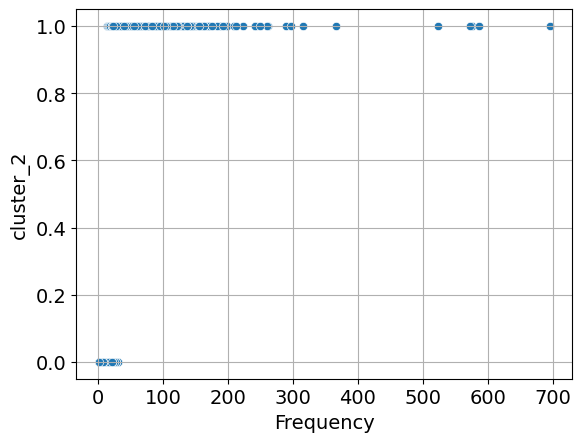

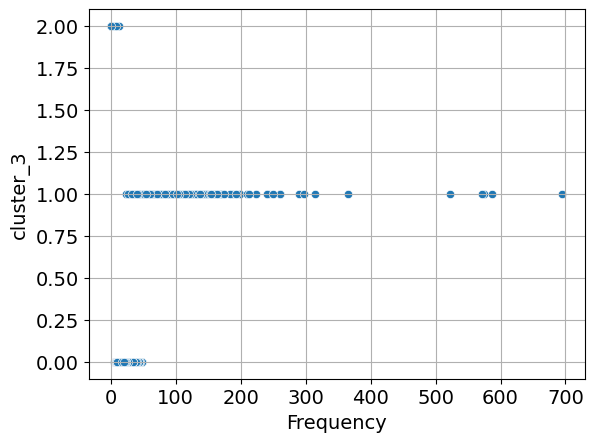

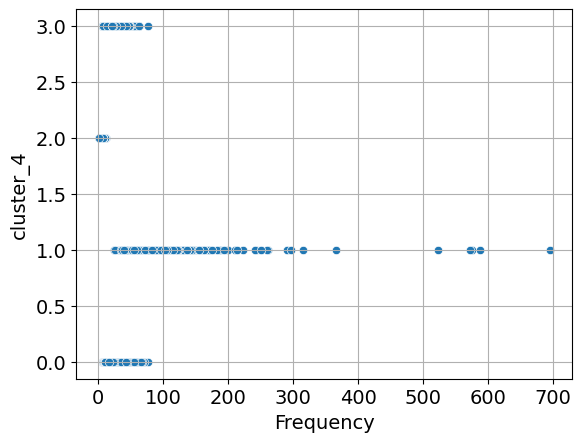

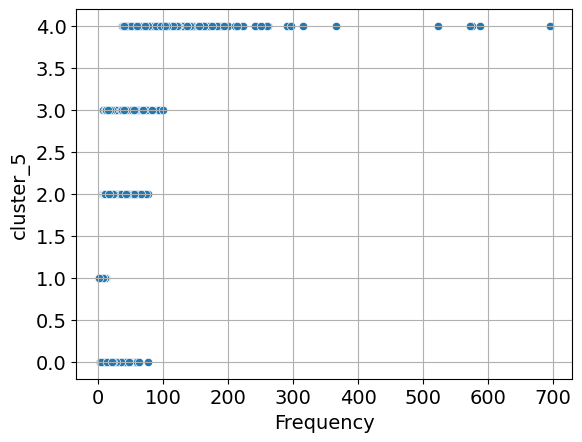

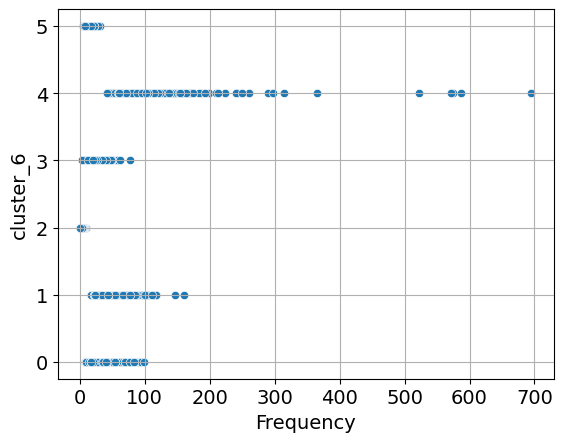

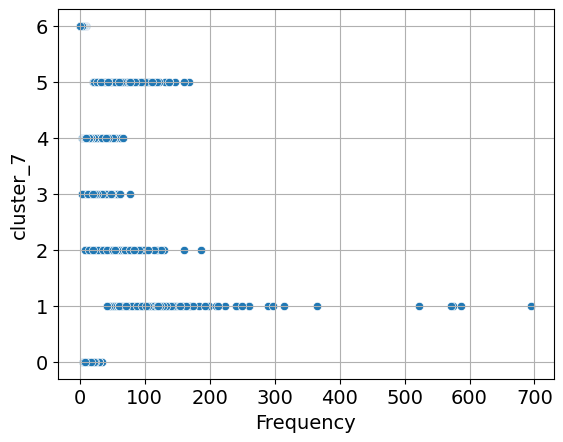

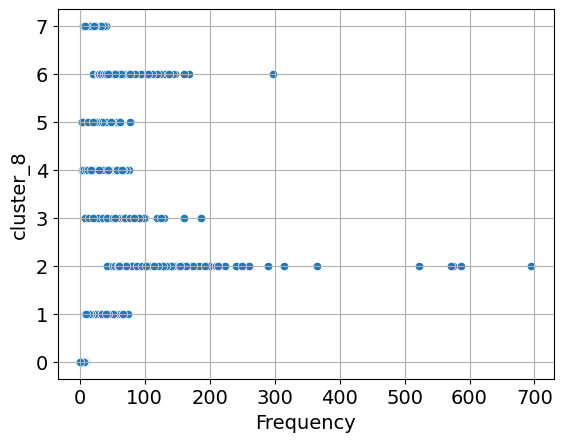

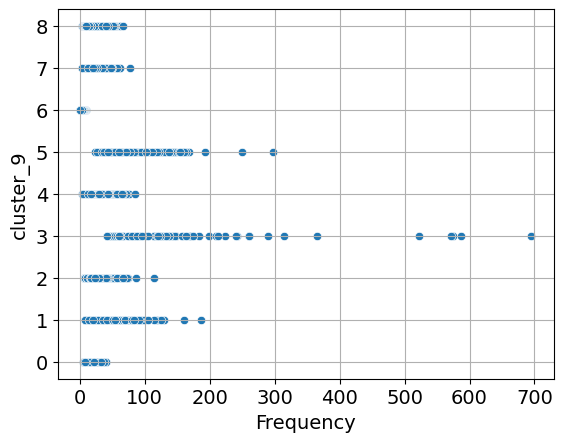

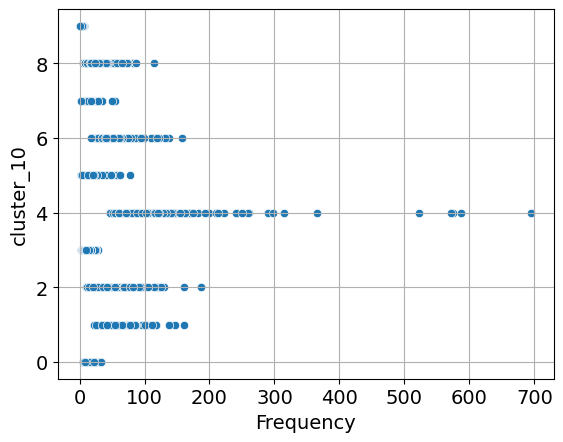

In [152]:
# Scatterplot of frequency of clusters
for i in clust.columns:
    sns.scatterplot( data_km.Frequency,data_km[i] )
    plt.show()

### Analysis of the cluster size | Count method

In [153]:
data_km.cluster_2.value_counts()/sum(data_km.cluster_2.value_counts())

0    0.512943
1    0.487057
Name: cluster_2, dtype: float64

In [154]:
data_km.cluster_3.value_counts()/sum(data_km.cluster_3.value_counts())

0    0.474114
1    0.308583
2    0.217302
Name: cluster_3, dtype: float64

In [155]:
data_km.cluster_4.value_counts()/sum(data_km.cluster_4.value_counts())

0    0.388965
1    0.229564
2    0.215259
3    0.166213
Name: cluster_4, dtype: float64

In [156]:
data_km.cluster_5.value_counts()/sum(data_km.cluster_5.value_counts())

2    0.348093
1    0.217984
4    0.173706
3    0.151907
0    0.108311
Name: cluster_5, dtype: float64

In [157]:
data_km.cluster_6.value_counts()/sum(data_km.cluster_6.value_counts())

5    0.293597
1    0.213215
2    0.147139
0    0.145095
3    0.108311
4    0.092643
Name: cluster_6, dtype: float64

In [158]:
data_km.cluster_7.value_counts()/sum(data_km.cluster_7.value_counts())

0    0.235695
5    0.188011
6    0.149864
4    0.149864
3    0.106267
2    0.097411
1    0.072888
Name: cluster_7, dtype: float64

In [159]:
data_km.cluster_8.value_counts()/sum(data_km.cluster_8.value_counts())

7    0.194142
0    0.155995
6    0.151907
1    0.150545
5    0.105586
3    0.096049
4    0.077657
2    0.068120
Name: cluster_8, dtype: float64

In [160]:
data_km.cluster_9.value_counts()/sum(data_km.cluster_9.value_counts())

8    0.150545
6    0.149183
0    0.134877
5    0.128065
2    0.109673
7    0.104905
1    0.094687
4    0.075613
3    0.052452
Name: cluster_9, dtype: float64

In [161]:
data_km.cluster_10.value_counts()/sum(data_km.cluster_10.value_counts())

0    0.123978
9    0.121935
3    0.113079
8    0.111035
5    0.106267
6    0.101499
1    0.100136
2    0.087875
4    0.069482
7    0.064714
Name: cluster_10, dtype: float64

### Choosing number  of clusters using Silhouette Coefficient   -- SC

In [162]:
# Calculate SC for K=3
metrics.silhouette_score( dim, km_3.labels_ )

0.14557590645415666

In [163]:
k_range=range(3,11)
scores=[]
for k in k_range:
    km=KMeans(n_clusters=k,random_state=123)
    km.fit(dim)
    scores.append(metrics.silhouette_score( dim, km.labels_ ))

In [164]:
scores

[0.14557590645415666,
 0.16651013749561844,
 0.17906072948724347,
 0.1666851823559278,
 0.17873556997932655,
 0.19124095784045902,
 0.20709138204398803,
 0.19586116327965133]

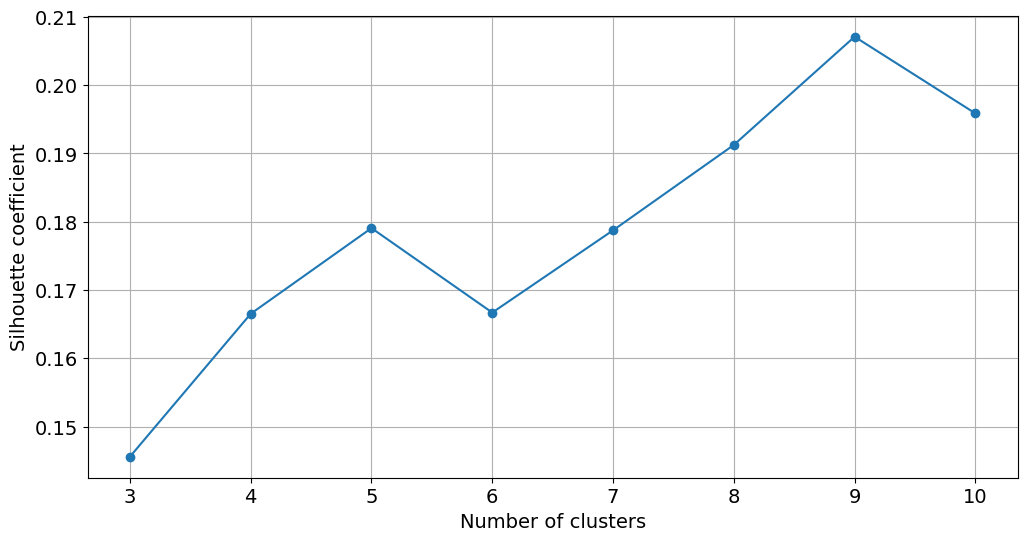

In [165]:
#Plot the results
plt.figure(figsize=[12,6])
plt.plot(k_range,scores,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette coefficient')
plt.grid('True')
plt.show()

The solution can be 6 based on the SC score. If we take highest SC score, 5 segment solution is best.

### Segment Distribution

In [166]:
#Checking the distribution of cluster_5 and cluster_4 again
data_km.cluster_6.value_counts()/sum(data_km.cluster_6.value_counts())

5    0.293597
1    0.213215
2    0.147139
0    0.145095
3    0.108311
4    0.092643
Name: cluster_6, dtype: float64

In [167]:
data_km.cluster_5.value_counts()/sum(data_km.cluster_5.value_counts())

2    0.348093
1    0.217984
4    0.173706
3    0.151907
0    0.108311
Name: cluster_5, dtype: float64

### Elbow Analysis 

In [168]:
cluster_range=range(3,21)
cluster_errors=[]

In [169]:
#Finding inertia of each cluster_range
for k in cluster_range:
    clusters=KMeans(n_clusters=k).fit(dim)
    cluster_errors.append(clusters.inertia_)

In [170]:
cluster_errors

[13689.887882080435,
 12403.144096185839,
 11509.94887390477,
 10728.588414361702,
 10093.471304857676,
 9569.326458641517,
 9097.59470807192,
 8663.72999649969,
 8342.285429686497,
 8021.265050735948,
 7756.158845909578,
 7483.655776406151,
 7292.813330021982,
 7048.61503896166,
 6820.185361158793,
 6667.6797880466665,
 6530.476068291679,
 6357.784969085218]

In [171]:
f_score=pd.DataFrame({'Cluster_seg':cluster_range,'Inertia':cluster_errors})
f_score

Cluster_seg       Inertia
0             3  13689.887882
1             4  12403.144096
2             5  11509.948874
3             6  10728.588414
4             7  10093.471305
5             8   9569.326459
6             9   9097.594708
7            10   8663.729996
8            11   8342.285430
9            12   8021.265051
10           13   7756.158846
11           14   7483.655776
12           15   7292.813330
13           16   7048.615039
14           17   6820.185361
15           18   6667.679788
16           19   6530.476068
17           20   6357.784969

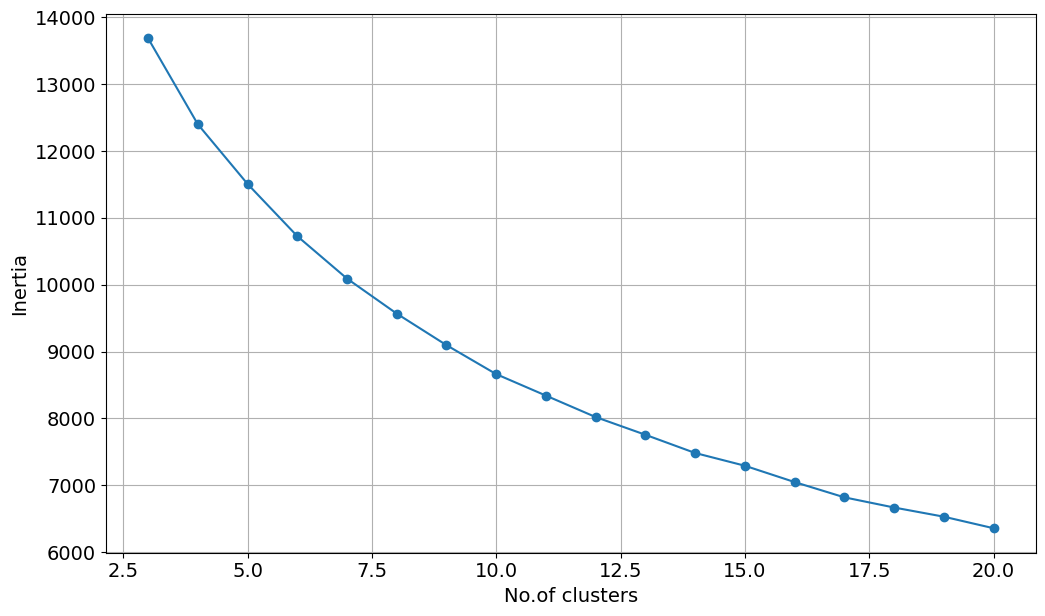

In [172]:
plt.figure(figsize=[12,7])
plt.plot(f_score['Cluster_seg'],f_score['Inertia'],marker='o')
plt.grid('True')
plt.xlabel('No.of clusters')
plt.ylabel('Inertia')
plt.show()


 The elbow diagram shows that the gain in explained variance reduces significantly from 3 to 4 to 5 to 6 to 7. 
  So, optimal number of clusters could either be 6 or 7. 

Based on all the above quantitative validation methods, 6 Cluster Segmentation appears to be the ideal type of segementation.

# Profiling

In [173]:
size = pd.concat( [pd.Series( data_km.shape[0] ), 
                   pd.Series.sort_index(data_km.cluster_3.value_counts()), 
                   pd.Series.sort_index(data_km.cluster_4.value_counts()),
                   pd.Series.sort_index(data_km.cluster_5.value_counts()), 
                   pd.Series.sort_index(data_km.cluster_6.value_counts()),
                   pd.Series.sort_index(data_km.cluster_7.value_counts()), 
                   pd.Series.sort_index(data_km.cluster_8.value_counts()),
                   pd.Series.sort_index(data_km.cluster_9.value_counts()), 
                   pd.Series.sort_index(data_km.cluster_10.value_counts())
                  ]
                )

In [174]:
size.head()

0    1468
0     696
1     453
2     319
0     571
dtype: int64

In [175]:
#Size and distribution of each cluster
Seg_size=pd.DataFrame(size,columns=['Seg_size']).T
Seg_dist=pd.DataFrame(size/data_km.shape[0],columns=['Seg_dist']).T
Seg_size
Seg_dist

0         0         1         2         0         1         2  \
Seg_dist  1.0  0.474114  0.308583  0.217302  0.388965  0.229564  0.215259   

                 3         0         1  ...         0         1         2  \
Seg_dist  0.166213  0.108311  0.217984  ...  0.123978  0.100136  0.087875   

                 3         4         5         6         7         8         9  
Seg_dist  0.113079  0.069482  0.106267  0.101499  0.064714  0.111035  0.121935  

[1 rows x 53 columns]

In [176]:
pd.concat([Seg_size,Seg_dist],axis=0)

0           0           1           2           0           1  \
Seg_size  1468.0  696.000000  453.000000  319.000000  571.000000  337.000000   
Seg_dist     1.0    0.474114    0.308583    0.217302    0.388965    0.229564   

                   2           3           0           1  ...           0  \
Seg_size  316.000000  244.000000  159.000000  320.000000  ...  182.000000   
Seg_dist    0.215259    0.166213    0.108311    0.217984  ...    0.123978   

                   1           2           3           4           5  \
Seg_size  147.000000  129.000000  166.000000  102.000000  156.000000   
Seg_dist    0.100136    0.087875    0.113079    0.069482    0.106267   

                   6          7           8           9  
Seg_size  149.000000  95.000000  163.000000  179.000000  
Seg_dist    0.101499   0.064714    0.111035    0.121935  

[2 rows x 53 columns]

In [177]:
#Mean values of each variables in each cluster

In [178]:
data

CustomerID  prod_cats  no_skus  item_cnts   Monetary  Frequency  Recency  \
0         12346          2        2          2    171.693          2      107   
1         12347         10       42         38  10589.289         60       59   
2         12348          6       21         18   1339.652         23       73   
3         12350          4       11         10   1079.929         17       17   
4         12356          7       33         29   1647.219         36      107   
...         ...        ...      ...        ...        ...        ...      ...   
1463      18259          4        7          4    745.905          7      270   
1464      18260         11       35         32   2367.101         40       87   
1465      18269          2        8          8    139.966          8      194   
1466      18277          1        1          1    274.200          1       69   
1467      18283         13       69         57   6425.273        102       82   

      no_coupon_codes  avg_tenure  Transaction_Month_1  ...  \
0                   2        31.0                  0.0  ...   
1                  59        20.0                  0.0  ...   
2                  23        39.0                  0.0  ...   
3                  17        25.0                  0.0  ...   
4                  36        31.0                  0.0  ...   
...               ...         ...                  ...  ...   
1463                6         5.0                  0.0  ...   
1464               39        43.0                  0.0  ...   
1465                8        25.0                  0.0  ...   
1466                1        47.0                  0.0  ...   
1467              101        36.0                  0.0  ...   

      Transaction_Month_3  Transaction_Month_4  Transaction_Month_5  \
0                       0                    0                    0   
1                      31                    0                    0   
2                       0                    0                    0   
3                       0                    0                    0   
4                       0                    0                    0   
...                   ...                  ...                  ...   
1463                    0                    7                    0   
1464                    0                    0                    0   
1465                    0                    7                    0   
1466                    0                    0                    0   
1467                    0                    0                    0   

      Transaction_Month_6  Transaction_Month_7  Transaction_Month_8  \
0                       0                    0                    0   
1                       0                    0                    0   
2                      17                    0                    0   
3                       0                    0                    0   
4                       0                    0                    0   
...                   ...                  ...                  ...   
1463                    0                    0                    0   
1464                   11                    0                   26   
1465                    1                    0                    0   
1466                    0                    0                    0   
1467                    0                   57                    0   

      Transaction_Month_9  Transaction_Month_10  Transaction_Month_11  \
0                       2                     0                     0   
1                       0                     0                    29   
2                       0                     6                     0   
3                       0                     0                     0   
4                      36                     0                     0   
...                   ...                   ...                   ...   
1463                    0                     0           

In [179]:
Profling_output = pd.concat( [data_km.apply(lambda x: x.mean()).T, 
                              data_km.groupby('cluster_3').apply(lambda x: x.mean()).T, 
                              data_km.groupby('cluster_4').apply(lambda x: x.mean()).T,
                              data_km.groupby('cluster_5').apply(lambda x: x.mean()).T, 
                              data_km.groupby('cluster_6').apply(lambda x: x.mean()).T,
                              data_km.groupby('cluster_7').apply(lambda x: x.mean()).T, 
                              data_km.groupby('cluster_8').apply(lambda x: x.mean()).T,
                              data_km.groupby('cluster_9').apply(lambda x: x.mean()).T,
                              data_km.groupby('cluster_10').apply(lambda x: x.mean()).T], axis = 1 )

In [180]:
Profling_output.head()

0            0            1           2  \
Frequency               36.051771    20.288793    82.690949    4.213166   
Monetary              2907.327723  1612.596591  6709.615064  332.709235   
Recency                144.292234   143.015805   114.545254  189.319749   
Transaction_Month_1      2.767711     1.620690     5.933775    0.774295   
Transaction_Month_10     2.836512     1.808908     6.240618    0.244514   

                                0            1           2            3  \
Frequency               23.681261    94.617211    4.237342    25.315574   
Monetary              1796.487203  7668.796386  322.969278  2277.541926   
Recency                195.483363   102.445104  187.294304    26.602459   
Transaction_Month_1      3.537653     4.991098    0.560127     0.754098   
Transaction_Month_10     1.928196     8.077151    0.408228     0.868852   

                                0           1  ...            0            1  \
Frequency               24.144654    4.415625  ...    15.653846    57.673469   
Monetary              2021.943723  325.861169  ...  1037.244846  4743.523531   
Recency                 16.867925  187.653125  ...   199.181319   196.210884   
Transaction_Month_1      0.981132    0.531250  ...     0.032967     6.938776   
Transaction_Month_10     0.729560    0.437500  ...     0.000000     0.000000   

                                2           3             4            5  \
Frequency               47.581395   12.042169    152.058824    22.884615   
Monetary              4471.772388  880.137018  12573.736010  1920.856647   
Recency                 42.131783  101.427711     61.931373    16.967949   
Transaction_Month_1      1.348837    0.066265      9.519608     0.910256   
Transaction_Month_10     0.922481    3.168675      8.862745     0.365385   

                                6            7            8           9  
Frequency               50.630872    14.757895    30.693252    2.407821  
Monetary              3807.640067  1430.313211  2118.952221  157.190760  
Recency                101.859060   304.400000   228.570552  190.720670  
Transaction_Month_1      2.328859    12.652632     1.018405    0.134078  
Transaction_Month_10    16.966443     0.000000     0.116564    0.061453  

[5 rows x 53 columns]

In [181]:
Profling_output_final = pd.concat( [Seg_size, Seg_dist, Profling_output], axis = 0 ).round(2)
Profling_output_final.head()

0        0        1       2        0        1       2  \
Seg_size   1468.00   696.00   453.00  319.00   571.00   337.00  316.00   
Seg_dist      1.00     0.47     0.31    0.22     0.39     0.23    0.22   
Frequency    36.05    20.29    82.69    4.21    23.68    94.62    4.24   
Monetary   2907.33  1612.60  6709.62  332.71  1796.49  7668.80  322.97   
Recency     144.29   143.02   114.55  189.32   195.48   102.45  187.29   

                 3        0       1  ...        0        1        2       3  \
Seg_size    244.00   159.00  320.00  ...   182.00   147.00   129.00  166.00   
Seg_dist      0.17     0.11    0.22  ...     0.12     0.10     0.09    0.11   
Frequency    25.32    24.14    4.42  ...    15.65    57.67    47.58   12.04   
Monetary   2277.54  2021.94  325.86  ...  1037.24  4743.52  4471.77  880.14   
Recency      26.60    16.87  187.65  ...   199.18   196.21    42.13  101.43   

                  4        5        6        7        8       9  
Seg_size     102.00   156.00   149.00    95.00   163.00  179.00  
Seg_dist       0.07     0.11     0.10     0.06     0.11    0.12  
Frequency    152.06    22.88    50.63    14.76    30.69    2.41  
Monetary   12573.74  1920.86  3807.64  1430.31  2118.95  157.19  
Recency       61.93    16.97   101.86   304.40   228.57  190.72  

[5 rows x 53 columns]

In [182]:
Profling_output_final.columns = ['Overall', 
                    'KM3_1', 'KM3_2', 'KM3_3',
                    'KM4_1', 'KM4_2', 'KM4_3', 'KM4_4',
                    'KM5_1', 'KM5_2', 'KM5_3', 'KM5_4', 'KM5_5',
                    'KM6_1', 'KM6_2', 'KM6_3', 'KM6_4', 'KM6_5','KM6_6',
                    'KM7_1', 'KM7_2', 'KM7_3', 'KM7_4', 'KM7_5','KM7_6','KM7_7',
                    'KM8_1', 'KM8_2', 'KM8_3', 'KM8_4', 'KM8_5','KM8_6','KM8_7','KM8_8',
                    'KM9_1', 'KM9_2', 'KM9_3', 'KM9_4', 'KM9_5','KM9_6','KM9_7','KM9_8', 'KM9_9',
                    'KM10_1', 'KM10_2', 'KM10_3', 'KM10_4', 'KM10_5','KM10_6','KM10_7','KM10_8','KM10_9','KM10_10']

In [183]:
Profling_output_final

Overall    KM3_1    KM3_2   KM3_3    KM4_1    KM4_2  \
Seg_size              1468.00   696.00   453.00  319.00   571.00   337.00   
Seg_dist                 1.00     0.47     0.31    0.22     0.39     0.23   
Frequency               36.05    20.29    82.69    4.21    23.68    94.62   
Monetary              2907.33  1612.60  6709.62  332.71  1796.49  7668.80   
Recency                144.29   143.02   114.55  189.32   195.48   102.45   
Transaction_Month_1      2.77     1.62     5.93    0.77     3.54     4.99   
Transaction_Month_10     2.84     1.81     6.24    0.24     1.93     8.08   
Transaction_Month_11     2.70     1.81     5.91    0.07     0.00     5.82   
Transaction_Month_12     3.07     2.54     5.81    0.33     0.00     5.63   
Transaction_Month_2      2.24     0.70     6.12    0.08     1.31     7.30   
Transaction_Month_3      2.96     1.53     7.00    0.36     2.79     7.58   
Transaction_Month_4      2.83     1.80     6.04    0.49     2.45     7.23   
Transaction_Month_5      3.11     1.40     7.77    0.24     2.35     8.93   
Transaction_Month_6      2.86     2.07     5.81    0.39     2.85     6.38   
Transaction_Month_7      3.58     1.09     9.61    0.45     1.43    12.23   
Transaction_Month_8      4.19     2.58     9.30    0.45     3.26    11.52   
Transaction_Month_9      2.92     1.34     7.17    0.34     1.77     8.93   
avg_tenure              25.91    26.35    25.54   25.48    26.93    24.64   
item_cnts               22.90    15.45    47.87    3.67    17.95    53.52   
no_coupon_codes         35.78    20.18    81.99    4.19    23.50    93.80   
no_skus                 25.66    16.77    54.66    3.86    19.56    61.59   
prod_cats                6.05     5.57     9.53    2.18     5.95    10.03   
cluster_2                0.49     0.38     1.00    0.00     0.41     1.00   
cluster_3                0.74     0.00     1.00    2.00     0.15     1.00   
cluster_4                1.16     0.85     1.06    1.98     0.00     1.00   
cluster_5                2.06     1.82     3.20    0.98     2.09     3.69   
cluster_6                2.67     3.15     1.80    2.86     3.26     1.99   
cluster_7                3.03     2.10     3.39    4.53     2.20     3.19   
cluster_8                3.68     4.38     4.18    1.47     4.63     3.94   
cluster_9                4.25     4.00     3.85    5.34     3.61     3.87   
cluster_10               4.47     3.77     3.94    6.75     3.93     3.81   

                       KM4_3    KM4_4    KM5_1   KM5_2  ...   KM10_1   KM10_2  \
Seg_size              316.00   244.00   159.00  320.00  ...   182.00   147.00   
Seg_dist                0.22     0.17     0.11    0.22  ...     0.12     0.10   
Frequency               4.24    25.32    24.14    4.42  ...    15.65    57.67   
Monetary              322.97  2277.54  2021.94  325.86  ...  1037.24  4743.52   
Recency               187.29    26.60    16.87  187.65  ...   199.18   196.21   
Transaction_Month_1     0.56     0.75     0.98    0.53  ...     0.03     6.94   
Transaction_Month_10    0.41     0.87     0.73    0.44  ...     0.00     0.00   
Transaction_Month_11    0.07     8.10     0.62    0.08  ...     0.01     0.21   
Transaction_Month_12    0.16    10.47    16.30    0.09  ...     0.00     0.00   
Transaction_Month_2     0.09     0.20     0.31    0.08  ...     0.89     9.65   
Transaction_Month_3     0.33     0.40     0.79    0.32  ...     0.22     1.31   
Transaction_Month_4     0.50     0.64     0.32    0.51  ...     3.73    12.97   
Transaction_Month_5     0.26     0.56     0.45    0.25  ...     0.21     3.07   
Transaction_Month_6     0.46     1.10     1.19    0.49  ...     6.09     0.76   
Transaction_Month_7     0.47     0.66     0.74    0.47  ...     4.10     6.39   
Transaction_Month_8     0.56     0.94     1.14    0.70  ...     0.35     2.25   
Transaction_Month_9     0.38     0.62     0.58    0.44  ...     0.03    14.13   
avg_tenure             25.07    26.39    27.64   24.75  ...    25.82    25.92   
item_cnts         

In [184]:
Profling_output_final.to_excel('Profiling_mkt_km.xlsx')

# 6 cluster Profiling

In [185]:
six_clust_profile=Profling_output_final[['KM6_1','KM6_2','KM6_3','KM6_4','KM6_5','KM6_6']]
six_clust_profile

KM6_1    KM6_2   KM6_3    KM6_4     KM6_5    KM6_6
Seg_size               213.00   313.00  216.00   159.00    136.00   431.00
Seg_dist                 0.15     0.21    0.15     0.11      0.09     0.29
Frequency               38.55    49.60    2.80    23.47    138.57    13.94
Monetary              3602.98  3713.48  202.54  1952.54  11331.25  1027.73
Recency                 54.27   195.83  188.16    16.92     64.64   201.49
Transaction_Month_1      0.73     5.18    0.33     0.89      8.60     2.09
Transaction_Month_10    10.14     0.21    0.24     0.38     11.60     0.58
Transaction_Month_11    14.29     0.00    0.10     0.62      5.71     0.05
Transaction_Month_12     0.11     0.00    0.11    16.20     13.82     0.00
Transaction_Month_2      0.45     4.65    0.04     0.36     11.16     0.34
Transaction_Month_3      0.90     6.55    0.15     0.59      9.55     1.57
Transaction_Month_4      1.22     6.04    0.46     0.63      8.27     1.57
Transaction_Month_5      1.53     6.57    0.13     0.50     12.11     1.01
Transaction_Month_6      2.04     3.62    0.26     1.15     10.12     2.35
Transaction_Month_7      0.98     4.23    0.25     0.61     21.58     1.46
Transaction_Month_8      4.32     5.58    0.38     0.96     17.38     2.06
Transaction_Month_9      1.86     6.97    0.35     0.58      8.65     0.85
avg_tenure              24.32    26.95   25.85    27.43     26.19    25.33
item_cnts               25.17    33.80    2.54    16.00     71.29    11.33
no_coupon_codes         38.40    49.10    2.79    23.43    137.39    13.84
no_skus                 27.40    37.58    2.66    17.44     84.12    12.25
prod_cats                7.27     8.19    1.75     5.42     11.35     4.62
cluster_2                0.82     0.97    0.00     0.50      1.00     0.05
cluster_3                0.46     0.61    2.00     0.40      1.00     0.39
cluster_4                1.62     0.40    2.00     2.94      1.00     0.45
cluster_5                3.02     2.71    1.00     0.09      3.90     1.80
cluster_6                0.00     1.00    2.00     3.00      4.00     5.00
cluster_7                2.80     4.22    5.91     2.95      1.74     1.25
cluster_8                2.36     5.36    0.13     4.82      2.95     4.71
cluster_9                3.63     3.79    5.98     6.81      3.65     3.26
cluster_10               3.43     4.00    7.98     4.94      4.15     3.51

## Defining Strategy

In [186]:
clust_1=data[data_km.cluster_5==0][['CustomerID']]
clust_2=data[data_km.cluster_5==1][['CustomerID']]
clust_3=data[data_km.cluster_5==2][['CustomerID']]
clust_4=data[data_km.cluster_5==3][['CustomerID']]
clust_5=data[data_km.cluster_5==4][['CustomerID']]
clust_6=data[data_km.cluster_5==5][['CustomerID']]

## Cross_Selling

In [187]:
clust_5

CustomerID
6         12370
8         12377
9         12383
18        12415
26        12433
...         ...
1430      18109
1432      18116
1433      18118
1453      18223
1467      18283

[255 rows x 1 columns]

 The most valued customers in terms of Recency,Purchasing Power and Revenue belongs to the fourth cluster,clust_5. These customers can be included in Cross-selling campaign. Marketing expenditure should focus on making these customers expand the basket varieties. This involves advertising more on 'Frequently Bought Together' products, adding offers on combo packs,etc. 

## Upselling

In [188]:
pd.concat([clust_2,clust_1])

CustomerID
0         12346
27        12434
37        12477
44        12494
45        12500
...         ...
1365      17863
1445      18178
1449      18198
1450      18202
1461      18250

[479 rows x 1 columns]

The second-most valued customers in terms of Revenue and Purchasing Power belongs to cluster 2 and cluter 1,clust_2 and clust_1. These customers can be included in the upselling campaign. Focus should be on making the customers buy more number of products.This involves giving offers/discounts when 2 are more items are bought together,etc.

## Retention

In [189]:
pd.concat([clust_4,clust_6])

CustomerID
1         12347
2         12348
19        12417
20        12421
25        12431
...         ...
1439      18145
1441      18161
1459      18239
1460      18245
1464      18260

[223 rows x 1 columns]

The customers of clust_1 and clust_2 should be enthused to buy more products with offers/discount coupons. These customers can be retained by giving more offers on products they usually buy.

## Win-back

In [190]:
clust_3


CustomerID
4         12356
5         12359
10        12386
11        12388
12        12393
...         ...
1447      18190
1451      18212
1452      18219
1455      18226
1456      18229

[511 rows x 1 columns]

The customers of clust_3 are those at the risk of losing. Making them purchase more can be done by advertising more on products that they  usually buy less and giving more discount coupons.

## 4.Predicting Customer Lifetime Value (Low Value/Medium Value/High Value)
•First define dependent variable with categories low value, medium value, high value using customer revenue.

•Then perform Classification model


## Data Preprocessing

In [191]:
data_cls=data.copy()
data_cls=data_cls.set_index('CustomerID')

In [192]:
#Finding the quantile values
data_cls.Monetary.quantile(q=[0.33,0.66])

0.33     858.96110
0.66    2681.50384
Name: Monetary, dtype: float64

In [193]:
#Establishing the target variable
data_cls['Value']=np.where(data_cls.Monetary<858.96110,0,np.where(data_cls.Monetary<2681.50384,1,2))

In [194]:
data_cls.head()

prod_cats  no_skus  item_cnts   Monetary  Frequency  Recency  \
CustomerID                                                                 
12346               2        2          2    171.693          2      107   
12347              10       42         38  10589.289         60       59   
12348               6       21         18   1339.652         23       73   
12350               4       11         10   1079.929         17       17   
12356               7       33         29   1647.219         36      107   

            no_coupon_codes  avg_tenure  Transaction_Month_1  \
CustomerID                                                     
12346                     2        31.0                  0.0   
12347                    59        20.0                  0.0   
12348                    23        39.0                  0.0   
12350                    17        25.0                  0.0   
12356                    36        31.0                  0.0   

            Transaction_Month_2  ...  Transaction_Month_4  \
CustomerID                       ...                        
12346                         0  ...                    0   
12347                         0  ...                    0   
12348                         0  ...                    0   
12350                         0  ...                    0   
12356                         0  ...                    0   

            Transaction_Month_5  Transaction_Month_6  Transaction_Month_7  \
CustomerID                                                                  
12346                         0                    0                    0   
12347                         0                    0                    0   
12348                         0                   17                    0   
12350                         0                    0                    0   
12356                         0                    0                    0   

            Transaction_Month_8  Transaction_Month_9  Transaction_Month_10  \
CustomerID                                                                   
12346                         0                    2                     0   
12347                         0                    0                     0   
12348                         0                    0                     6   
12350                         0                    0                     0   
12356                         0                   36                     0   

            Transaction_Month_11  Transaction_Month_12  Value  
CustomerID                                                     
12346                          0                   0.0      0  
12347                         29                   0.0      2  
12348                          0                   0.0      1  
12350                          0                  17.0      1  
12356                          0                   0.0      1  

[5 rows x 21 columns]

In [195]:
data_cls.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1468 entries, 12346 to 18283
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   prod_cats             1468 non-null   int64  
 1   no_skus               1468 non-null   int64  
 2   item_cnts             1468 non-null   int64  
 3   Monetary              1468 non-null   float64
 4   Frequency             1468 non-null   int64  
 5   Recency               1468 non-null   int64  
 6   no_coupon_codes       1468 non-null   int64  
 7   avg_tenure            1468 non-null   float64
 8   Transaction_Month_1   1468 non-null   float64
 9   Transaction_Month_2   1468 non-null   uint8  
 10  Transaction_Month_3   1468 non-null   uint8  
 11  Transaction_Month_4   1468 non-null   uint8  
 12  Transaction_Month_5   1468 non-null   uint8  
 13  Transaction_Month_6   1468 non-null   uint8  
 14  Transaction_Month_7   1468 non-null   uint8  
 15  Transaction_Month_8  

In [196]:
Num_col=data_cls[['prod_cats','no_skus','item_cnts','Monetary','Frequency','Recency','no_coupon_codes','avg_tenure'
              ]]
Num_col.head()

prod_cats  no_skus  item_cnts   Monetary  Frequency  Recency  \
CustomerID                                                                 
12346               2        2          2    171.693          2      107   
12347              10       42         38  10589.289         60       59   
12348               6       21         18   1339.652         23       73   
12350               4       11         10   1079.929         17       17   
12356               7       33         29   1647.219         36      107   

            no_coupon_codes  avg_tenure  
CustomerID                               
12346                     2        31.0  
12347                    59        20.0  
12348                    23        39.0  
12350                    17        25.0  
12356                    36        31.0

In [197]:
Bin_col=data_cls[data_cls[data_cls.columns.difference(Num_col.columns)].columns.difference(['Value'])]
Bin_col.head()

Transaction_Month_1  Transaction_Month_10  Transaction_Month_11  \
CustomerID                                                                    
12346                       0.0                     0                     0   
12347                       0.0                     0                    29   
12348                       0.0                     6                     0   
12350                       0.0                     0                     0   
12356                       0.0                     0                     0   

            Transaction_Month_12  Transaction_Month_2  Transaction_Month_3  \
CustomerID                                                                   
12346                        0.0                    0                    0   
12347                        0.0                    0                   31   
12348                        0.0                    0                    0   
12350                       17.0                    0                    0   
12356                        0.0                    0                    0   

            Transaction_Month_4  Transaction_Month_5  Transaction_Month_6  \
CustomerID                                                                  
12346                         0                    0                    0   
12347                         0                    0                    0   
12348                         0                    0                   17   
12350                         0                    0                    0   
12356                         0                    0                    0   

            Transaction_Month_7  Transaction_Month_8  Transaction_Month_9  
CustomerID                                                                 
12346                         0                    0                    2  
12347                         0                    0                    0  
12348                         0                    0                    0  
12350                         0                    0                    0  
12356                         0                    0                   36

In [198]:
#Profiling
report=pandas_profiling.ProfileReport(data_cls)
#report.to_file('Report_Market.html')

In [199]:
#Dropping variables according to profile report
data_cls.drop(columns=['Transaction_Month_12','Transaction_Month_2','prod_cats','no_skus'],inplace=True)

# EDA

In [200]:
#Establishing dependent and independent variables
y=data_cls[['Value']]
X=data_cls[data_cls.columns.difference(['Value'])]

In [201]:
#Distribution of y
y.value_counts()/sum(y.value_counts())

Value
2        0.339918
0        0.330381
1        0.329700
dtype: float64

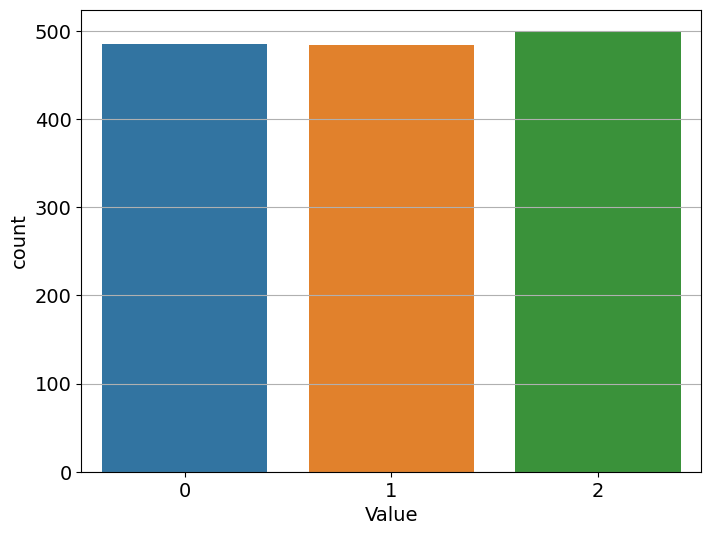

In [202]:
#Plotting of distribution of y
plt.figure(figsize=(8,6))
sns.countplot(x='Value',data=data_cls)
plt.show()

The data is balanced.

In [203]:
#Verifying nulls
data_cls.isnull().sum()

item_cnts               0
Monetary                0
Frequency               0
Recency                 0
no_coupon_codes         0
avg_tenure              0
Transaction_Month_1     0
Transaction_Month_3     0
Transaction_Month_4     0
Transaction_Month_5     0
Transaction_Month_6     0
Transaction_Month_7     0
Transaction_Month_8     0
Transaction_Month_9     0
Transaction_Month_10    0
Transaction_Month_11    0
Value                   0
dtype: int64

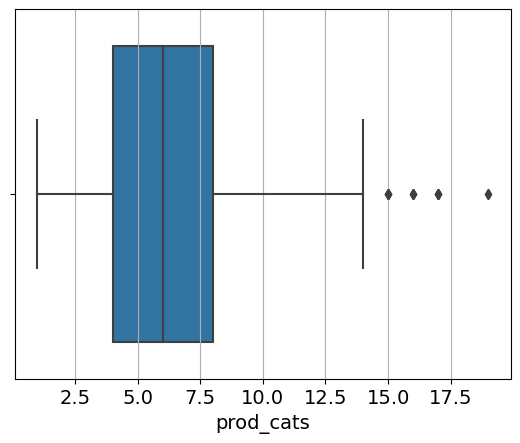

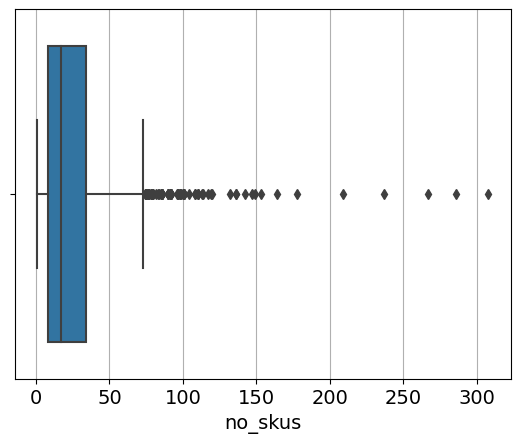

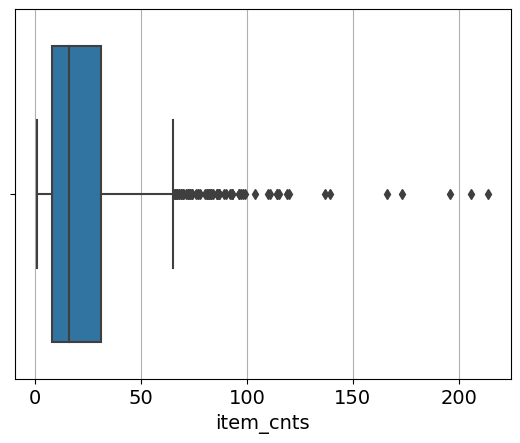

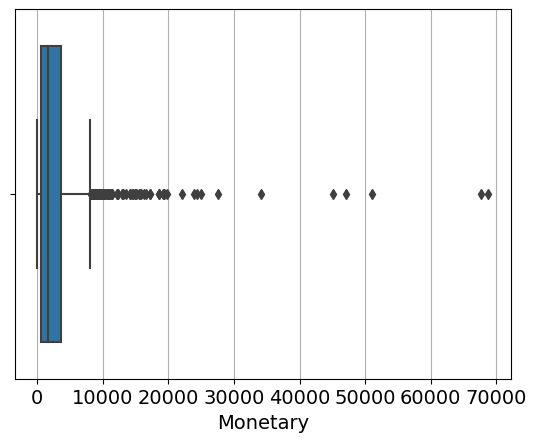

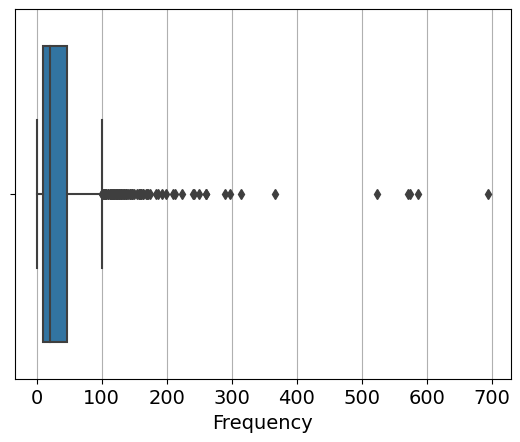

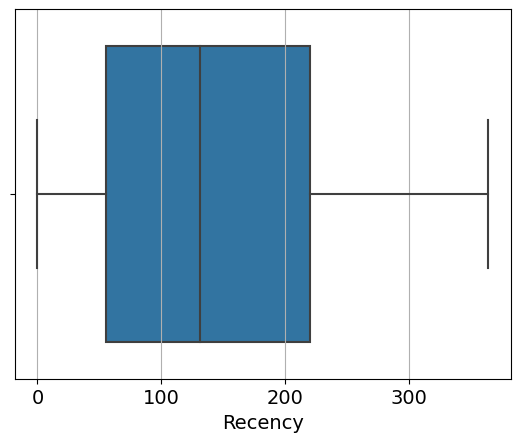

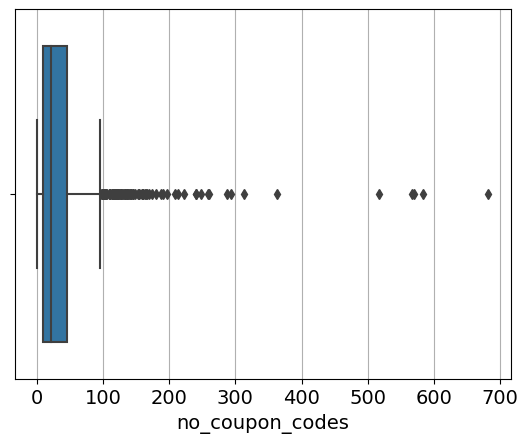

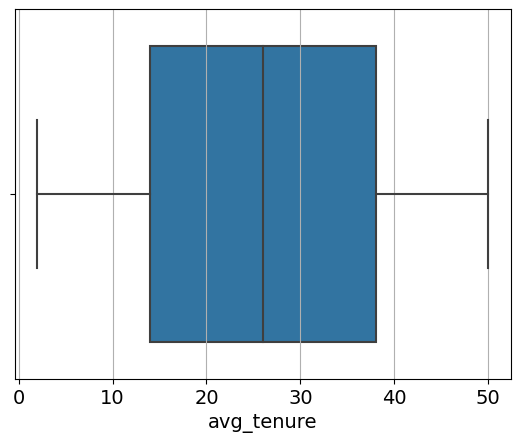

In [204]:
#Checking for outliers
for i in Num_col.columns:
    sns.boxplot(Num_col[i])
    plt.show()

prod_cats
[array([4., 1.]), array([ 8., 14.])]


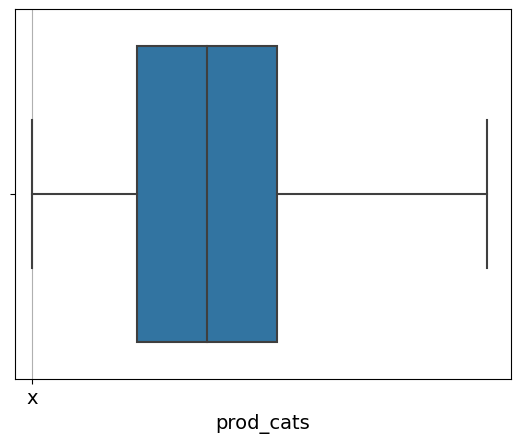

no_skus
[array([8., 1.]), array([34., 73.])]


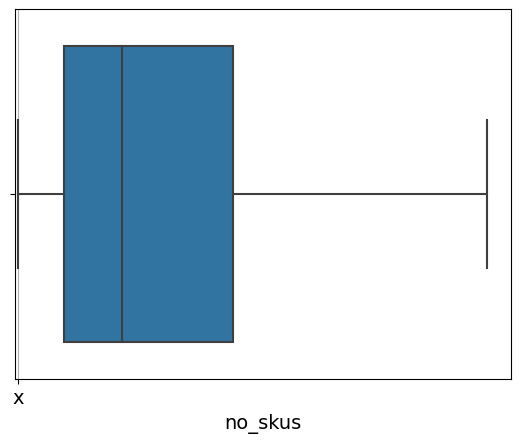

item_cnts
[array([8., 1.]), array([31., 65.])]


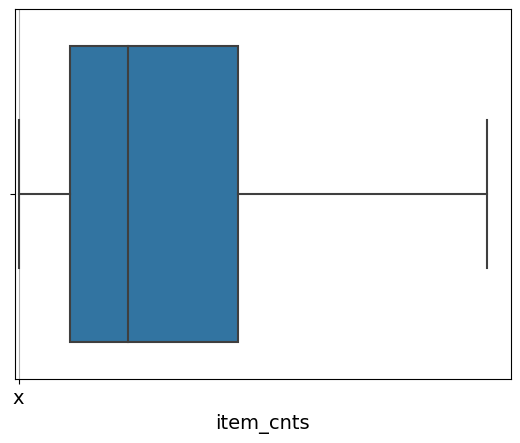

Monetary
[array([609.721,   6.9  ]), array([3584.19225, 8000.946  ])]


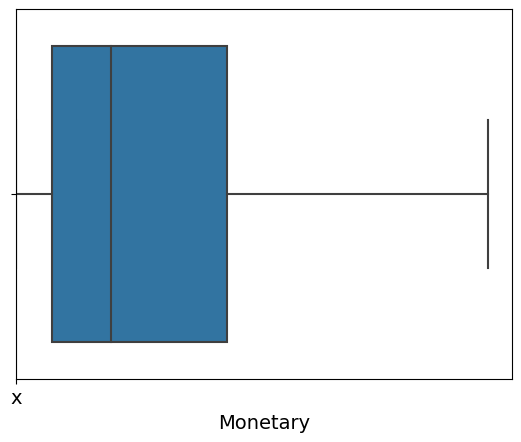

Frequency
[array([10.,  1.]), array([ 46., 100.])]


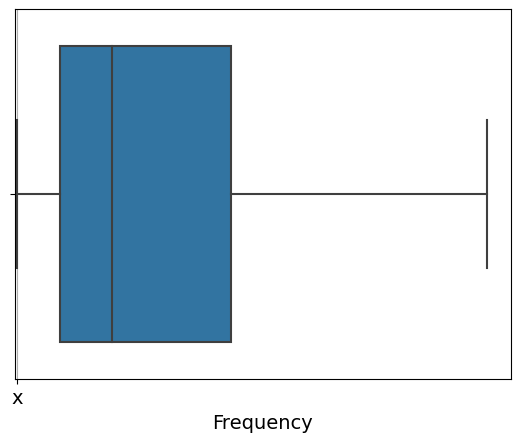

Recency
[array([55.,  0.]), array([220., 364.])]


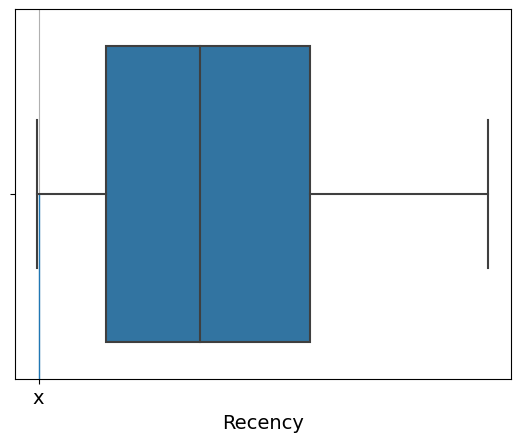

no_coupon_codes
[array([10.,  1.]), array([45., 96.])]


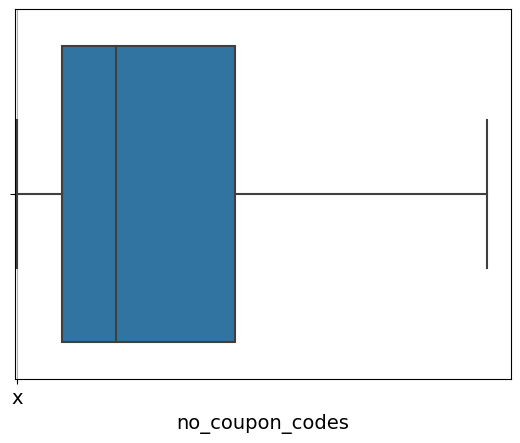

avg_tenure
[array([14.,  2.]), array([38., 50.])]


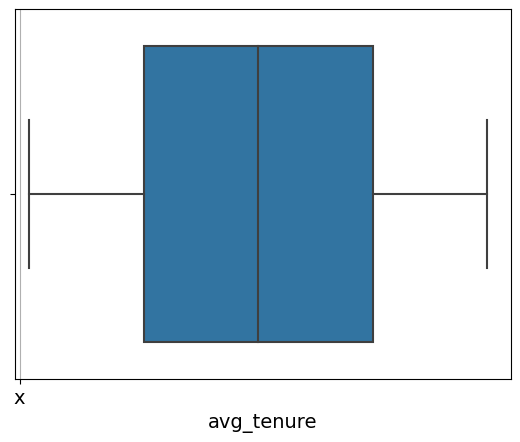

In [205]:
#Outlier treatment
for i in Num_col:
    _,bp=pd.DataFrame.boxplot(Num_col[i],return_type='both')
    whiskers=[whiskers.get_ydata()for whiskers in bp['whiskers']]
    print(i)
    print(whiskers)
    Num_col[i].clip(lower=whiskers[0][1],upper=whiskers[1][1],inplace=True)
    sns.boxplot(Num_col[i])
    plt.show()

In [206]:
# Table after outlier treatment
data_new=pd.concat([Num_col,Bin_col],axis=1)
data_new.head()

prod_cats  no_skus  item_cnts  Monetary  Frequency  Recency  \
CustomerID                                                                
12346             2.0      2.0        2.0   171.693        2.0      107   
12347            10.0     42.0       38.0  8000.946       60.0       59   
12348             6.0     21.0       18.0  1339.652       23.0       73   
12350             4.0     11.0       10.0  1079.929       17.0       17   
12356             7.0     33.0       29.0  1647.219       36.0      107   

            no_coupon_codes  avg_tenure  Transaction_Month_1  \
CustomerID                                                     
12346                   2.0        31.0                  0.0   
12347                  59.0        20.0                  0.0   
12348                  23.0        39.0                  0.0   
12350                  17.0        25.0                  0.0   
12356                  36.0        31.0                  0.0   

            Transaction_Month_10  Transaction_Month_11  Transaction_Month_12  \
CustomerID                                                                     
12346                          0                     0                   0.0   
12347                          0                    29                   0.0   
12348                          6                     0                   0.0   
12350                          0                     0                  17.0   
12356                          0                     0                   0.0   

            Transaction_Month_2  Transaction_Month_3  Transaction_Month_4  \
CustomerID                                                                  
12346                         0                    0                    0   
12347                         0                   31                    0   
12348                         0                    0                    0   
12350                         0                    0                    0   
12356                         0                    0                    0   

            Transaction_Month_5  Transaction_Month_6  Transaction_Month_7  \
CustomerID                                                                  
12346                         0                    0                    0   
12347                         0                    0                    0   
12348                         0                   17                    0   
12350                         0                    0                    0   
12356                         0                    0                    0   

            Transaction_Month_8  Transaction_Month_9  
CustomerID                                            
12346                         0                    2  
12347                         0                    0  
12348                         0                    0  
12350                         0                    0  
12356                         0                   36

In [207]:
# Checking for low variance
l=[]
for i in Num_col:
    if len(data_new[i].unique()) <2:
        l.append(i)
        print(i,final[i].unique())
print(l)

[]


Since all columns have high variance, no need of dropping any.

C:\Users\itsfe\anaconda3\lib\site-packages\seaborn\matrix.py:302: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.

C:\Users\itsfe\anaconda3\lib\site-packages\seaborn\matrix.py:312: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



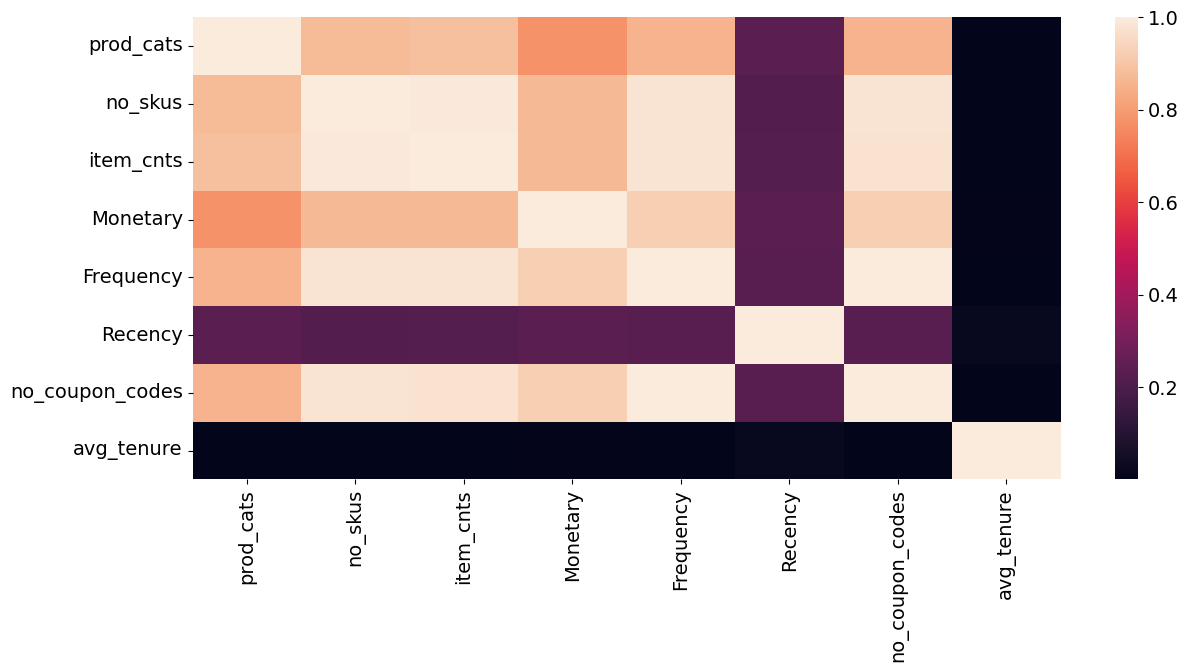

In [208]:
# Visualize correlation matrix in Seaborn using a heatmap for Numerical columns
plt.figure(figsize=[14,6])
sns.heatmap(Num_col.corr().abs())
plt.show()

In [209]:
## Transforming X variables 
pt = PowerTransformer(method='yeo-johnson',standardize=True)
pg=pt.fit_transform(X)

In [210]:
X_trs = pd.DataFrame(pg,index=X.index,columns=X.columns)
X_trs.head()

Frequency  Monetary   Recency  Transaction_Month_1  \
CustomerID                                                       
12346       -1.714464 -1.341689 -0.147831            -0.413671   
12347        0.968126  1.689841 -0.726063            -0.413671   
12348        0.083403 -0.106658 -0.537807            -0.413671   
12350       -0.179311 -0.258591 -1.511469            -0.413671   
12356        0.487609  0.044642 -0.147831            -0.413671   

            Transaction_Month_10  Transaction_Month_11  Transaction_Month_3  \
CustomerID                                                                    
12346                  -0.407977             -0.382866            -0.405825   
12347                  -0.407977              2.656339             2.507841   
12348                   2.490865             -0.382866            -0.405825   
12350                  -0.407977             -0.382866            -0.405825   
12356                  -0.407977             -0.382866            -0.405825   

            Transaction_Month_4  Transaction_Month_5  Transaction_Month_6  \
CustomerID                                                                  
12346                 -0.423612            -0.396452            -0.461590   
12347                 -0.423612            -0.396452            -0.461590   
12348                 -0.423612            -0.396452             2.236232   
12350                 -0.423612            -0.396452            -0.461590   
12356                 -0.423612            -0.396452            -0.461590   

            Transaction_Month_7  Transaction_Month_8  Transaction_Month_9  \
CustomerID                                                                  
12346                 -0.436201            -0.504381             2.478224   
12347                 -0.436201            -0.504381            -0.388639   
12348                 -0.436201            -0.504381            -0.388639   
12350                 -0.436201            -0.504381            -0.388639   
12356                 -0.436201            -0.504381             2.622861   

            avg_tenure  item_cnts  no_coupon_codes  
CustomerID                                          
12346         0.418221  -1.668964        -1.712214  
12347        -0.345290   0.945017         0.959251  
12348         0.930516   0.118064         0.089302  
12350         0.012039  -0.458535        -0.173872  
12356         0.418221   0.633907         0.494168

# Feature Selection

In [211]:
#### RFECV
classifier = LogisticRegression()
rfe = RFECV(estimator=classifier, min_features_to_select=15,scoring="accuracy",cv=5,verbose=True,n_jobs=-1)
rfe = rfe.fit(X_trs,y)

Fitting estimator with 16 features.


In [212]:
imp_vars_rfe=list(X_trs.columns[rfe.support_])
imp_vars_rfe

['Frequency',
 'Monetary',
 'Recency',
 'Transaction_Month_1',
 'Transaction_Month_10',
 'Transaction_Month_11',
 'Transaction_Month_3',
 'Transaction_Month_4',
 'Transaction_Month_6',
 'Transaction_Month_7',
 'Transaction_Month_8',
 'Transaction_Month_9',
 'avg_tenure',
 'item_cnts',
 'no_coupon_codes']

In [213]:
#SelectKBest
skb=SelectKBest(f_classif,k=8).fit(X_trs,y)

In [214]:
imp_vars_skb=list(X_trs.columns[skb.get_support()])
imp_vars_skb

['Frequency',
 'Monetary',
 'Recency',
 'Transaction_Month_10',
 'Transaction_Month_11',
 'Transaction_Month_7',
 'item_cnts',
 'no_coupon_codes']

In [215]:
fin_var=list(set(imp_vars_skb+imp_vars_rfe))
fin_var

['Monetary',
 'Transaction_Month_10',
 'Transaction_Month_6',
 'Transaction_Month_9',
 'Recency',
 'Frequency',
 'no_coupon_codes',
 'avg_tenure',
 'Transaction_Month_4',
 'Transaction_Month_1',
 'Transaction_Month_7',
 'Transaction_Month_3',
 'item_cnts',
 'Transaction_Month_8',
 'Transaction_Month_11']

In [216]:
X_fin=X_trs[['Transaction_Month_8',
 'avg_tenure',
 'Transaction_Month_7',
 'Monetary',
 'Recency',
 'Transaction_Month_4',
 'Transaction_Month_6',
 'Transaction_Month_9',
 #'item_cnts',
 'Transaction_Month_10',
 'Transaction_Month_11',
 #'Frequency',
 #'no_coupon_codes',
 'Transaction_Month_1',
 'Transaction_Month_3']]

In [217]:
#Calculation of VIF
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(X_fin.values,i)for i in range(X_fin.shape[1])]
vif['features']=X_fin.columns
vif

VIF              features
0   1.050145   Transaction_Month_8
1   1.005875            avg_tenure
2   1.054486   Transaction_Month_7
3   1.292389              Monetary
4   1.596072               Recency
5   1.047932   Transaction_Month_4
6   1.019390   Transaction_Month_6
7   1.061272   Transaction_Month_9
8   1.142926  Transaction_Month_10
9   1.273576  Transaction_Month_11
10  1.102843   Transaction_Month_1
11  1.058531   Transaction_Month_3

In [218]:
vif.sort_values(by='VIF',ascending=False)

VIF              features
4   1.596072               Recency
3   1.292389              Monetary
9   1.273576  Transaction_Month_11
8   1.142926  Transaction_Month_10
10  1.102843   Transaction_Month_1
7   1.061272   Transaction_Month_9
11  1.058531   Transaction_Month_3
2   1.054486   Transaction_Month_7
0   1.050145   Transaction_Month_8
5   1.047932   Transaction_Month_4
6   1.019390   Transaction_Month_6
1   1.005875            avg_tenure

## Splitting into train and test

In [219]:
train_X,test_X,train_y,test_y=train_test_split(X_fin,y,test_size=0.3,random_state=123)

In [220]:
train=pd.concat([train_X,train_y],axis=1)
test=pd.concat([test_X,test_y],axis=1)

## Multinominal Modelling- Logistic Regression

In [221]:
model=LogisticRegression()
model.fit(train_X,train_y)

LogisticRegression()

In [222]:
#Predicting train and test
train_pred=model.predict(train_X)
test_pred=model.predict(test_X)

In [223]:
coeff=model.coef_,model.intercept_
coeff

(array([[-5.34605194e-02,  1.32076239e-02, -2.69714029e-02,
         -8.33514873e+00, -1.58329433e-01, -5.90546060e-02,
         -7.87571958e-02,  1.62183629e-02, -2.08869683e-01,
         -1.16964266e-01,  1.03882232e-01, -7.07535061e-02],
        [ 1.46506217e-03,  1.36434251e-02, -4.46909659e-02,
         -1.41200574e-02,  4.03978827e-02, -1.25719194e-02,
         -9.05435346e-03, -2.44737901e-02,  7.12582477e-02,
          3.90365310e-02,  4.40503890e-02, -2.09754771e-03],
        [ 5.19954573e-02, -2.68510490e-02,  7.16623688e-02,
          8.34926878e+00,  1.17931550e-01,  7.16265254e-02,
          8.78115492e-02,  8.25542727e-03,  1.37611436e-01,
          7.79277346e-02, -1.47932621e-01,  7.28510538e-02]]),
 array([-1.10662818,  2.347741  , -1.24111282]))

In [224]:
#Predicting probabilities of classes for train
LR_Trainprob=pd.DataFrame(model.predict_proba(train_X),index=train_X.index,columns=['LR_Trainprob_0','LR_Trainprob_1','LR_Trainprob_2'])
LR_Trainprob

LR_Trainprob_0  LR_Trainprob_1  LR_Trainprob_2
CustomerID                                                
14565         1.325327e-02        0.933179    5.356760e-02
15384         6.812315e-02        0.923953    7.923871e-03
14341         8.389200e-03        0.945055    4.655560e-02
13869         1.178406e-12        0.000036    9.999643e-01
13253         9.525924e-01        0.047405    2.878509e-06
...                    ...             ...             ...
16656         9.995188e-01        0.000481    2.488195e-10
16938         4.201541e-02        0.932618    2.536618e-02
17802         5.742571e-01        0.425573    1.698724e-04
18011         2.368763e-02        0.954825    2.148734e-02
17951         6.115760e-01        0.388218    2.061413e-04

[1027 rows x 3 columns]

In [225]:
#Predicting probabilities of classes for test
LR_Testprob=pd.DataFrame(model.predict_proba(test_X), index=test_X.index,columns=['LR_Testprob_0','LR_Testprob_1','LR_Testprob_2'])
LR_Testprob

LR_Testprob_0  LR_Testprob_1  LR_Testprob_2
CustomerID                                             
12489        9.211277e-01       0.078866   6.370557e-06
12625        9.276436e-09       0.003816   9.961843e-01
17929        9.994784e-01       0.000522   3.197975e-10
13263        7.405193e-03       0.866956   1.256390e-01
13922        9.918468e-01       0.008153   8.697742e-08
...                   ...            ...            ...
17454        5.725966e-01       0.427107   2.967282e-04
13402        8.217711e-02       0.912703   5.120258e-03
12766        1.304701e-06       0.034603   9.653953e-01
15197        9.999895e-01       0.000011   9.614324e-14
14970        9.170152e-02       0.902226   6.072307e-03

[441 rows x 3 columns]

In [226]:
#Confusion matrix for classes [0,1,2]
cm=metrics.confusion_matrix(train_y,train_pred)
cm

array([[331,   7,   0],
       [  1, 329,   4],
       [  0,   2, 353]], dtype=int64)

C:\Users\itsfe\anaconda3\lib\site-packages\seaborn\matrix.py:302: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.

C:\Users\itsfe\anaconda3\lib\site-packages\seaborn\matrix.py:312: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



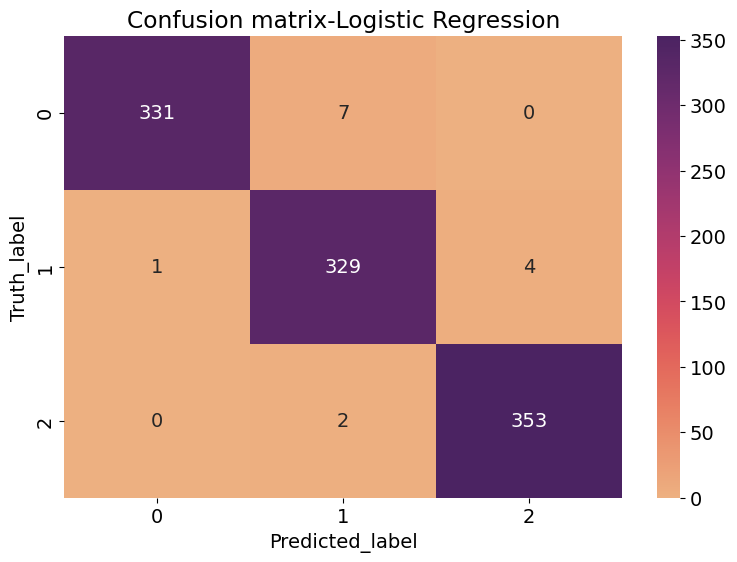

In [227]:
#Plotting of confusion matrix
plt.figure(figsize=[9,6])
sns.heatmap(cm,annot=True,cmap= 'flare',  fmt='d')
plt.xlabel('Predicted_label')
plt.ylabel('Truth_label')
plt.title('Confusion matrix-Logistic Regression')
plt.show()

In [228]:
#Classification Report for train
print(metrics.classification_report(train_y,train_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       338
           1       0.97      0.99      0.98       334
           2       0.99      0.99      0.99       355

    accuracy                           0.99      1027
   macro avg       0.99      0.99      0.99      1027
weighted avg       0.99      0.99      0.99      1027



In [229]:
#Classification report for test
print(metrics.classification_report(test_y,test_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       147
           1       0.95      0.97      0.96       150
           2       0.99      0.96      0.97       144

    accuracy                           0.97       441
   macro avg       0.97      0.97      0.97       441
weighted avg       0.97      0.97      0.97       441



In [230]:
#Plotting of ROC curve for OneVsRestClassifier 
ovr=OneVsRestClassifier(LogisticRegression())
mod=ovr.fit(train_X,train_y)
pred_prob=mod.predict_proba(train_X)

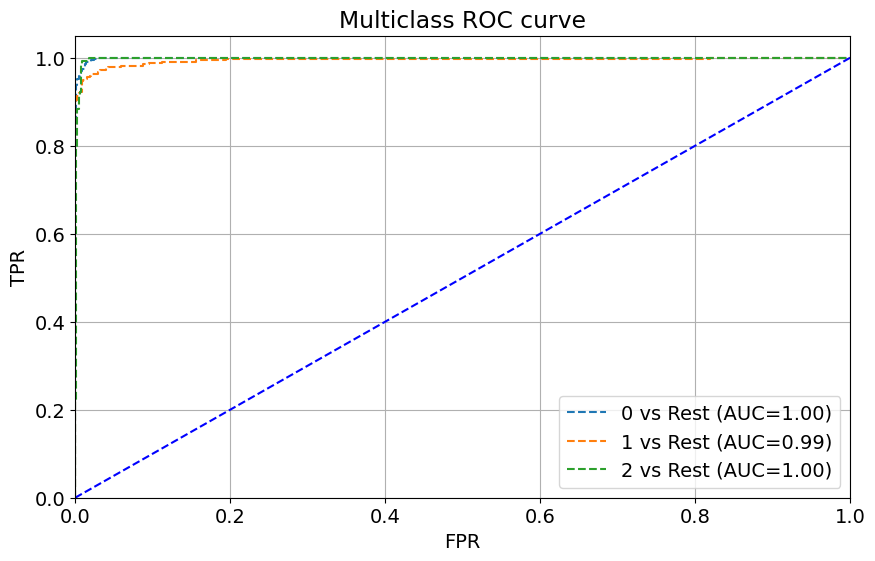

In [231]:
#Plotting of roc curve

classes=np.unique(train_y)
y_train_binarized=label_binarize(train_y,classes=np.unique(train_y))

fpr={}
tpr={}
thresh={}
roc_auc=dict()

n_class=classes.shape[0]
plt.figure(figsize=(10,6))
for i in range(n_class):
    fpr[i],tpr[i],thresh[i]=roc_curve(y_train_binarized[:,i],pred_prob[:,i])
    roc_auc[i]=auc(fpr[i],tpr[i])
    
    plt.plot(fpr[i],tpr[i],linestyle='--',
            label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))
    
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='lower right')
plt.show()

In [232]:
#ROC-AUC score for the OneVsRest Classifier model 
metrics.roc_auc_score(train_y,LR_Trainprob,multi_class='ovr')

0.9995976580660422

## KNN Classification

In [233]:
#Standardization of data
sc = StandardScaler()
std_train = sc.fit_transform(train_X)
std_test = sc.fit_transform(test_X)

In [234]:
std_data_train = pd.DataFrame(std_train, columns=train_X.columns, index = train_X.index )
std_data_test = pd.DataFrame(std_test,columns=test_X.columns, index = test_X.index )

In [235]:
# Fitting the model
model_knn = KNeighborsClassifier().fit(std_data_train, train_y)

In [236]:
#Predicting train and test
train_pred = model.predict(std_data_train)
test_pred = model.predict(std_data_test)

In [237]:
#Classification report for train
print(metrics.classification_report(train_y, train_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       338
           1       0.98      0.98      0.98       334
           2       0.99      0.98      0.99       355

    accuracy                           0.98      1027
   macro avg       0.98      0.98      0.98      1027
weighted avg       0.98      0.98      0.98      1027



In [238]:
#Classification report for test
print(metrics.classification_report(test_y, test_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96       147
           1       0.91      0.96      0.93       150
           2       0.96      0.97      0.97       144

    accuracy                           0.95       441
   macro avg       0.95      0.95      0.95       441
weighted avg       0.95      0.95      0.95       441



In [239]:
## KNN Classification with Hyperparameter Tuning
grid={'n_neighbors':[2,3,4,5],'weights':['distance','uniform']}

In [240]:
knn_grid=GridSearchCV(KNeighborsClassifier(),grid,scoring='roc_auc_ovr',cv=5,n_jobs=-1,verbose=True)

In [241]:
grid_fit=knn_grid.fit(train_X,train_y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [242]:
grid_fit.cv_results_

{'mean_fit_time': array([0.00939593, 0.01258636, 0.0078577 , 0.00315242, 0.00312653,
        0.01259155, 0.01091328, 0.00203223]),
 'std_fit_time': array([0.00767181, 0.00373062, 0.00699338, 0.00630484, 0.00625305,
        0.00629821, 0.00783858, 0.00261268]),
 'mean_score_time': array([0.00945978, 0.01258178, 0.00625467, 0.01571031, 0.01250362,
        0.00432749, 0.0101676 , 0.01363235]),
 'std_score_time': array([7.72543547e-03, 8.00065062e-03, 7.66037868e-03, 6.34228196e-05,
        6.25181260e-03, 7.34455271e-03, 4.72170989e-03, 1.98537954e-03]),
 'param_n_neighbors': masked_array(data=[2, 2, 3, 3, 4, 4, 5, 5],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_weights': masked_array(data=['distance', 'uniform', 'distance', 'uniform',
                    'distance', 'uniform', 'distance', 'uniform'],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='

In [243]:
grid_fit.best_score_

0.9346061550911667

In [244]:
grid_fit.best_params_

{'n_neighbors': 5, 'weights': 'distance'}

In [245]:
knn_mod=KNeighborsClassifier(n_neighbors= 5, weights= 'uniform').fit(train_X,train_y)

In [246]:
#Predicting train and test
knn_train=knn_mod.predict(train_X)
knn_test=knn_mod.predict(test_X)

In [247]:
#Classification report for train data
print(metrics.classification_report(train_y,knn_train))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       338
           1       0.79      0.88      0.83       334
           2       0.92      0.86      0.89       355

    accuracy                           0.88      1027
   macro avg       0.88      0.88      0.88      1027
weighted avg       0.88      0.88      0.88      1027



In [248]:
#Classification report for test data
print(metrics.classification_report(test_y,knn_test))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       147
           1       0.67      0.79      0.72       150
           2       0.87      0.72      0.79       144

    accuracy                           0.78       441
   macro avg       0.80      0.78      0.79       441
weighted avg       0.80      0.78      0.79       441



## Decision Tree Classifier

In [249]:
#Finding best parameters
param_grid_dt = {'max_depth': np.arange(3, 5),
                'max_features': np.arange(3,5)}

In [250]:
dt_grid=GridSearchCV(DecisionTreeClassifier(),param_grid_dt ,scoring='roc_auc_ovr',n_jobs=-1,cv=5,verbose=True)

In [251]:
dt_fit=dt_grid.fit(train_X,train_y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [252]:
dt_fit.cv_results_

{'mean_fit_time': array([0.00908604, 0.00667057, 0.00513544, 0.00320797]),
 'std_fit_time': array([0.00423604, 0.00190076, 0.00360674, 0.00314434]),
 'mean_score_time': array([0.00664706, 0.00609312, 0.0064734 , 0.00431075]),
 'std_score_time': array([0.00162063, 0.00251577, 0.00323698, 0.00277056]),
 'param_max_depth': masked_array(data=[3, 3, 4, 4],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=[3, 4, 3, 4],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 3, 'max_features': 3},
  {'max_depth': 3, 'max_features': 4},
  {'max_depth': 4, 'max_features': 3},
  {'max_depth': 4, 'max_features': 4}],
 'split0_test_score': array([0.99634998, 0.57032773, 0.79946932, 0.88881882]),
 'split1_test_score': array([0.85719428, 0.99634998, 0.87291896, 0.755032  ]),
 'split2_test_score': array([0.60477923, 0.86269738, 0.98887807,

In [253]:
dt_fit.best_score_

0.847109840896152

In [254]:
dt_fit.best_params_

{'max_depth': 4, 'max_features': 4}

In [255]:
#fitting the dt model
dt_mod=DecisionTreeClassifier(max_depth= 4, max_features= 4).fit(train_X,train_y)

In [256]:
#Predicting train and test
dt_train=dt_mod.predict(train_X)
dt_test=dt_mod.predict(test_X)

In [257]:
#classification report for train
print(metrics.classification_report(train_y,dt_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       338
           1       1.00      1.00      1.00       334
           2       1.00      1.00      1.00       355

    accuracy                           1.00      1027
   macro avg       1.00      1.00      1.00      1027
weighted avg       1.00      1.00      1.00      1027



In [258]:
#classification report for test
print(metrics.classification_report(test_y,dt_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       147
           1       1.00      1.00      1.00       150
           2       1.00      1.00      1.00       144

    accuracy                           1.00       441
   macro avg       1.00      1.00      1.00       441
weighted avg       1.00      1.00      1.00       441



In [259]:
text_=tree.export_text(dt_mod,feature_names=list(train_X.columns))
print(text_)

|--- Monetary <= 0.42
|   |--- Monetary <= -0.41
|   |   |--- class: 0
|   |--- Monetary >  -0.41
|   |   |--- class: 1
|--- Monetary >  0.42
|   |--- class: 2



In [260]:
#Plotting of decison tree
fig, axes = plt.subplots(nrows = 1 , ncols = 1, figsize =(15,15), dpi=600)
tree.plot_tree(dt_mod,feature_names=train_X.columns,class_names="012",filled=True)

[Text(0.6, 0.8333333333333334, 'Monetary <= 0.424\ngini = 0.666\nsamples = 1027\nvalue = [338, 334, 355]\nclass = 2'),
 Text(0.4, 0.5, 'Monetary <= -0.413\ngini = 0.5\nsamples = 672\nvalue = [338, 334, 0]\nclass = 0'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 338\nvalue = [338, 0, 0]\nclass = 0'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 334\nvalue = [0, 334, 0]\nclass = 1'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 355\nvalue = [0, 0, 355]\nclass = 2')]

## XGBoost Classification

In [261]:
#Establishing grid
params = {'n_estimators':[100,500,600],
        'learning_rate': [0.1,0.2,0.3] }


In [262]:
grid=GridSearchCV(estimator=XGBClassifier(objective='multi:softmax'),param_grid=params,n_jobs=-1,cv=5,verbose=1)

In [263]:
grid_fit=grid.fit(train_X,train_y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [264]:
grid_fit.cv_results_

{'mean_fit_time': array([0.38976603, 1.56013646, 1.86158113, 0.40129461, 1.48161507,
        1.7019928 , 0.33594313, 1.3643435 , 1.53161812]),
 'std_fit_time': array([0.0379734 , 0.07194807, 0.07411296, 0.01492005, 0.05127198,
        0.06008262, 0.02131283, 0.08497335, 0.0787809 ]),
 'mean_score_time': array([0.00552258, 0.01508546, 0.01407771, 0.01108022, 0.01250038,
        0.01551256, 0.01249857, 0.01249824, 0.01271424]),
 'std_score_time': array([0.00691682, 0.00129676, 0.00353699, 0.00618712, 0.00625019,
        0.0005348 , 0.00624929, 0.00624912, 0.00635924]),
 'param_learning_rate': masked_array(data=[0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.3, 0.3, 0.3],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[100, 500, 600, 100, 500, 600, 100, 500, 600],
              mask=[False, False, False, False, False, False, False, False,
                 

In [265]:
grid_fit.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [266]:
grid_fit.best_score_

0.9961022969452996

In [267]:
xgb_model=XGBClassifier(learning_rate= 0.1, n_estimators=100).fit(train_X,train_y)

In [268]:
xgb_train=xgb_model.predict(train_X)
xgb_test=xgb_model.predict(test_X)

In [269]:
cm=confusion_matrix(train_y,xgb_train)
cm

array([[338,   0,   0],
       [  0, 334,   0],
       [  0,   0, 355]], dtype=int64)

C:\Users\itsfe\anaconda3\lib\site-packages\seaborn\matrix.py:302: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.

C:\Users\itsfe\anaconda3\lib\site-packages\seaborn\matrix.py:312: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



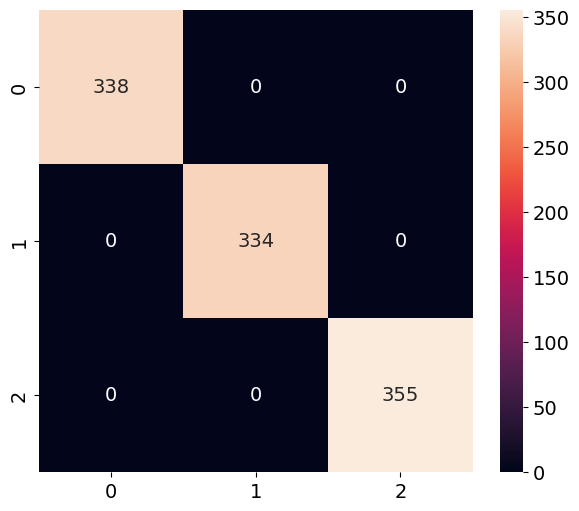

In [270]:
plt.figure(figsize=[7,6])
sns.heatmap(cm,annot=True,fmt='d')
plt.show()

In [271]:
print(metrics.classification_report(train_y,xgb_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       338
           1       1.00      1.00      1.00       334
           2       1.00      1.00      1.00       355

    accuracy                           1.00      1027
   macro avg       1.00      1.00      1.00      1027
weighted avg       1.00      1.00      1.00      1027



In [272]:
print(metrics.classification_report(test_y,xgb_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       147
           1       1.00      1.00      1.00       150
           2       1.00      1.00      1.00       144

    accuracy                           1.00       441
   macro avg       1.00      1.00      1.00       441
weighted avg       1.00      1.00      1.00       441



## 5.	Cross-Selling (Which products are selling together)
•	You can perform exploratory analysis & market basket analysis to understand which of items can be bundled together.


In [273]:
final.head()

CustomerID Transaction_ID Transaction_Date     Product_SKU  \
0      17850          16679       2019-01-01  GGOENEBJ079499   
1      17850          16680       2019-01-01  GGOENEBJ079499   
2      17850          16681       2019-01-01  GGOEGFKQ020399   
3      17850          16682       2019-01-01  GGOEGAAB010516   
4      17850          16682       2019-01-01  GGOEGBJL013999   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   
3  Google Men's 100% Cotton Short Sleeve Hero Tee...          Apparel   
4                    Google Canvas Tote Natural/Navy             Bags   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status  ...  Discount_pct  \
0         1     153.71               6.5          Used  ...          10.0   
1         1     153.71               6.5          Used  ...          10.0   
2         1       2.05               6.5          Used  ...          10.0   
3         5      17.53               6.5      Not Used  ...          10.0   
4         1      16.50               6.5          Used  ...          10.0   

    GST       Date  Offline_Spend  Online_Spend Invoice_Value  Revenue  \
0  0.10 2019-01-01           4500        2424.5      158.6729  144.839   
1  0.10 2019-01-01           4500        2424.5      158.6729  144.839   
2  0.10 2019-01-01           4500        2424.5        8.5295    8.345   
3  0.18 2019-01-01           4500        2424.5       99.5843   85.385   
4  0.18 2019-01-01           4500        2424.5       24.0230   21.350   

   Revenue_without_discount  Day      Tax  
0                    160.21    1  14.4839  
1                    160.21    1  14.4839  
2                      8.55    1   0.8345  
3                     94.15    1  15.3693  
4                     23.00    1   3.8430  

[5 rows x 27 columns]

In [274]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52924 entries, 0 to 52923
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   CustomerID                52924 non-null  object        
 1   Transaction_ID            52924 non-null  object        
 2   Transaction_Date          52924 non-null  datetime64[ns]
 3   Product_SKU               52924 non-null  object        
 4   Product_Description       52924 non-null  object        
 5   Product_Category          52924 non-null  object        
 6   Quantity                  52924 non-null  int64         
 7   Avg_Price                 52924 non-null  float64       
 8   Delivery_Charges          52924 non-null  float64       
 9   Coupon_Status             52924 non-null  object        
 10  Transaction_Month         52924 non-null  int64         
 11  Gender                    52924 non-null  object        
 12  Location          

## EDA

In [275]:
final['Product_Description'].unique()

array(['Nest Learning Thermostat 3rd Gen-USA - Stainless Steel',
       'Google Laptop and Cell Phone Stickers',
       "Google Men's 100% Cotton Short Sleeve Hero Tee Black",
       'Google Canvas Tote Natural/Navy', 'Sport Bag',
       'Google 22 oz Water Bottle', 'Google Infuser-Top Water Bottle',
       'Engraved Ceramic Google Mug', 'Maze Pen',
       'Galaxy Screen Cleaning Cloth', 'Badge Holder',
       "YouTube Men's Short Sleeve Hero Tee Black",
       'Nest Cam Outdoor Security Camera - USA',
       'Nest Protect Smoke + CO White Wired Alarm-USA',
       "Google Men's 100% Cotton Short Sleeve Hero Tee Red",
       "Google Women's Short Sleeve Hero Tee White",
       'Red Shine 15 oz Mug', 'Compact Selfie Stick',
       'Ballpoint LED Light Pen', 'Color Changing Grip Pen',
       'Colored Pencil Set', 'Spiral Notebook and Pen Set',
       'Nest Cam Indoor Security Camera - USA',
       'Android Sticker Sheet Ultra Removable',
       '23 oz Wide Mouth Sport Bottle', 'YouTube Cu

In [276]:
len(final['Product_Description'].unique())

404

In [277]:
final.Location.unique()

array(['Chicago', 'California', 'New York', 'New Jersey', 'Washington DC'],
      dtype=object)

## MBA

In [278]:
basket =pd.pivot_table(data=final,index='Transaction_ID',columns='Product_Description',values='Quantity',aggfunc='sum',fill_value=0)
basket.head()

Product_Description  1 oz Hand Sanitizer  \
Transaction_ID                             
16679                                  0   
16680                                  0   
16681                                  0   
16682                                  0   
16684                                  0   

Product_Description  20 oz Stainless Steel Insulated Tumbler  \
Transaction_ID                                                 
16679                                                      0   
16680                                                      0   
16681                                                      0   
16682                                                      0   
16684                                                      0   

Product_Description  22 oz Android Bottle  22 oz YouTube Bottle Infuser  \
Transaction_ID                                                            
16679                                   0                             0   
16680                                   0                             0   
16681                                   0                             0   
16682                                   0                             0   
16684                                   0                             0   

Product_Description  23 oz Wide Mouth Sport Bottle  \
Transaction_ID                                       
16679                                            0   
16680                                            0   
16681                                            0   
16682                                            0   
16684                                            0   

Product_Description  24 oz YouTube Sergeant Stripe Bottle  \
Transaction_ID                                              
16679                                                   0   
16680                                                   0   
16681                                                   0   
16682                                                   0   
16684                                                   0   

Product_Description  25L Classic Rucksack  26 oz Double Wall Insulated Bottle  \
Transaction_ID                                                                  
16679                                   0                                   0   
16680                                   0                                   0   
16681                                   0                                   0   
16682                                   0                                   0   
16684                                   0                                   0   

Product_Description  7&quot; Dog Frisbee  8 pc Android Sticker Sheet  ...  \
Transaction_ID                                                        ...   
16679                                  0                           0  ...   
16680                                  0                           0  ...   
16681                                  0                           0  ...   
16682                                  0                           0  ...   
16684                                  0                           0  ...   

Product_Description  YouTube Twill Cap  YouTube Women's Favorite Tee White  \
Transaction_ID                                                               
16679                                0                                   0   
16680                                0                                   0   
16681                                0                                   0   
16682                                0                                   0   
16684                                0                                   0   

Product_Description  YouTube Women's Fleece Hoodie Black  \
Transaction_ID                                             
16679                                                  0   
16680                                                  0   
16681         

In [279]:
basket.shape

(25061, 404)

In [280]:
#Most purchased products
trans_cnt=final.groupby('Product_Description')[['Transaction_ID']].count().sort_values(by='Transaction_ID',ascending=False)
trans_cnt.columns=['No.of transactions']
trans_cnt=trans_cnt.reset_index()
top_trans=trans_cnt.head(50)
top_trans

Product_Description  No.of transactions
0   Nest Learning Thermostat 3rd Gen-USA - Stainle...                3511
1              Nest Cam Outdoor Security Camera - USA                3328
2               Nest Cam Indoor Security Camera - USA                3230
3                                   Google Sunglasses                1523
4     Nest Protect Smoke + CO White Battery Alarm-USA                1361
5        Nest Learning Thermostat 3rd Gen-USA - White                1089
6       Nest Protect Smoke + CO White Wired Alarm-USA                1065
7                           Google 22 oz Water Bottle                 902
8                             Nest Thermostat E - USA                 844
9               Google Laptop and Cell Phone Stickers                 806
10                                  Nest Cam IQ - USA                 599
11  Google Men's 100% Cotton Short Sleeve Hero Tee...                 595
12                                   Google Twill Cap                 546
13  Google Men's 100% Cotton Short Sleeve Hero Tee...                 504
14        Nest Secure Alarm System Starter Pack - USA                 498
15               Google Men's Vintage Badge Tee Black                 496
16                                     BLM Sweatshirt                 445
17        Google Men's Bike Short Sleeve Tee Charcoal                 431
18                              YouTube Custom Decals                 419
19                 26 oz Double Wall Insulated Bottle                 408
20                                          Sport Bag                 408
21      Nest Learning Thermostat 3rd Gen-USA - Copper                 393
22                                     Windup Android                 381
23                       Google Metallic Notebook Set                 378
24                                           Maze Pen                 374
25                Google Men's Vintage Badge Tee Sage                 367
26                           Google Men's  Zip Hoodie                 362
27  Google Men's 100% Cotton Short Sleeve Hero Tee...                 356
28               Google Men's Vintage Badge Tee White                 336
29                         Four Color Retractable Pen                 324
30                                Google Doodle Decal                 320
31                                Red Shine 15 oz Mug                 315
32                         Recycled Paper Journal Set                 297
33              Google Women's Vintage Hero Tee Black                 293
34                         Foam Can and Bottle Cooler                 292
35                                   Google Kick Ball                 281
36                            Ballpoint LED Light Pen                 280
37  Google Men's 100% Cotton Short Sleeve Hero Tee...                 271
38                                Google Blackout Cap                 264
39                         8 pc Android Sticker Sheet                 258
40          Google Women's Short Sleeve Hero Tee Grey                 256
41                                       Badge Holder                 255
42                             Android Rise 14 oz Mug                 250
43           Google 17oz Stainless Steel Sport Bottle                 250
44                            Google Women's Tee Grey                 246
45              Google Men's Long & Lean Tee Charcoal                 246
46                Google Women's Scoop Neck Tee Black                 240
47         Google Women's Short Sleeve Badge Tee Grey                 236
48        Google Men's Short Sleeve Hero Tee Charcoal                 233
49                                Leatherette Journal                 220

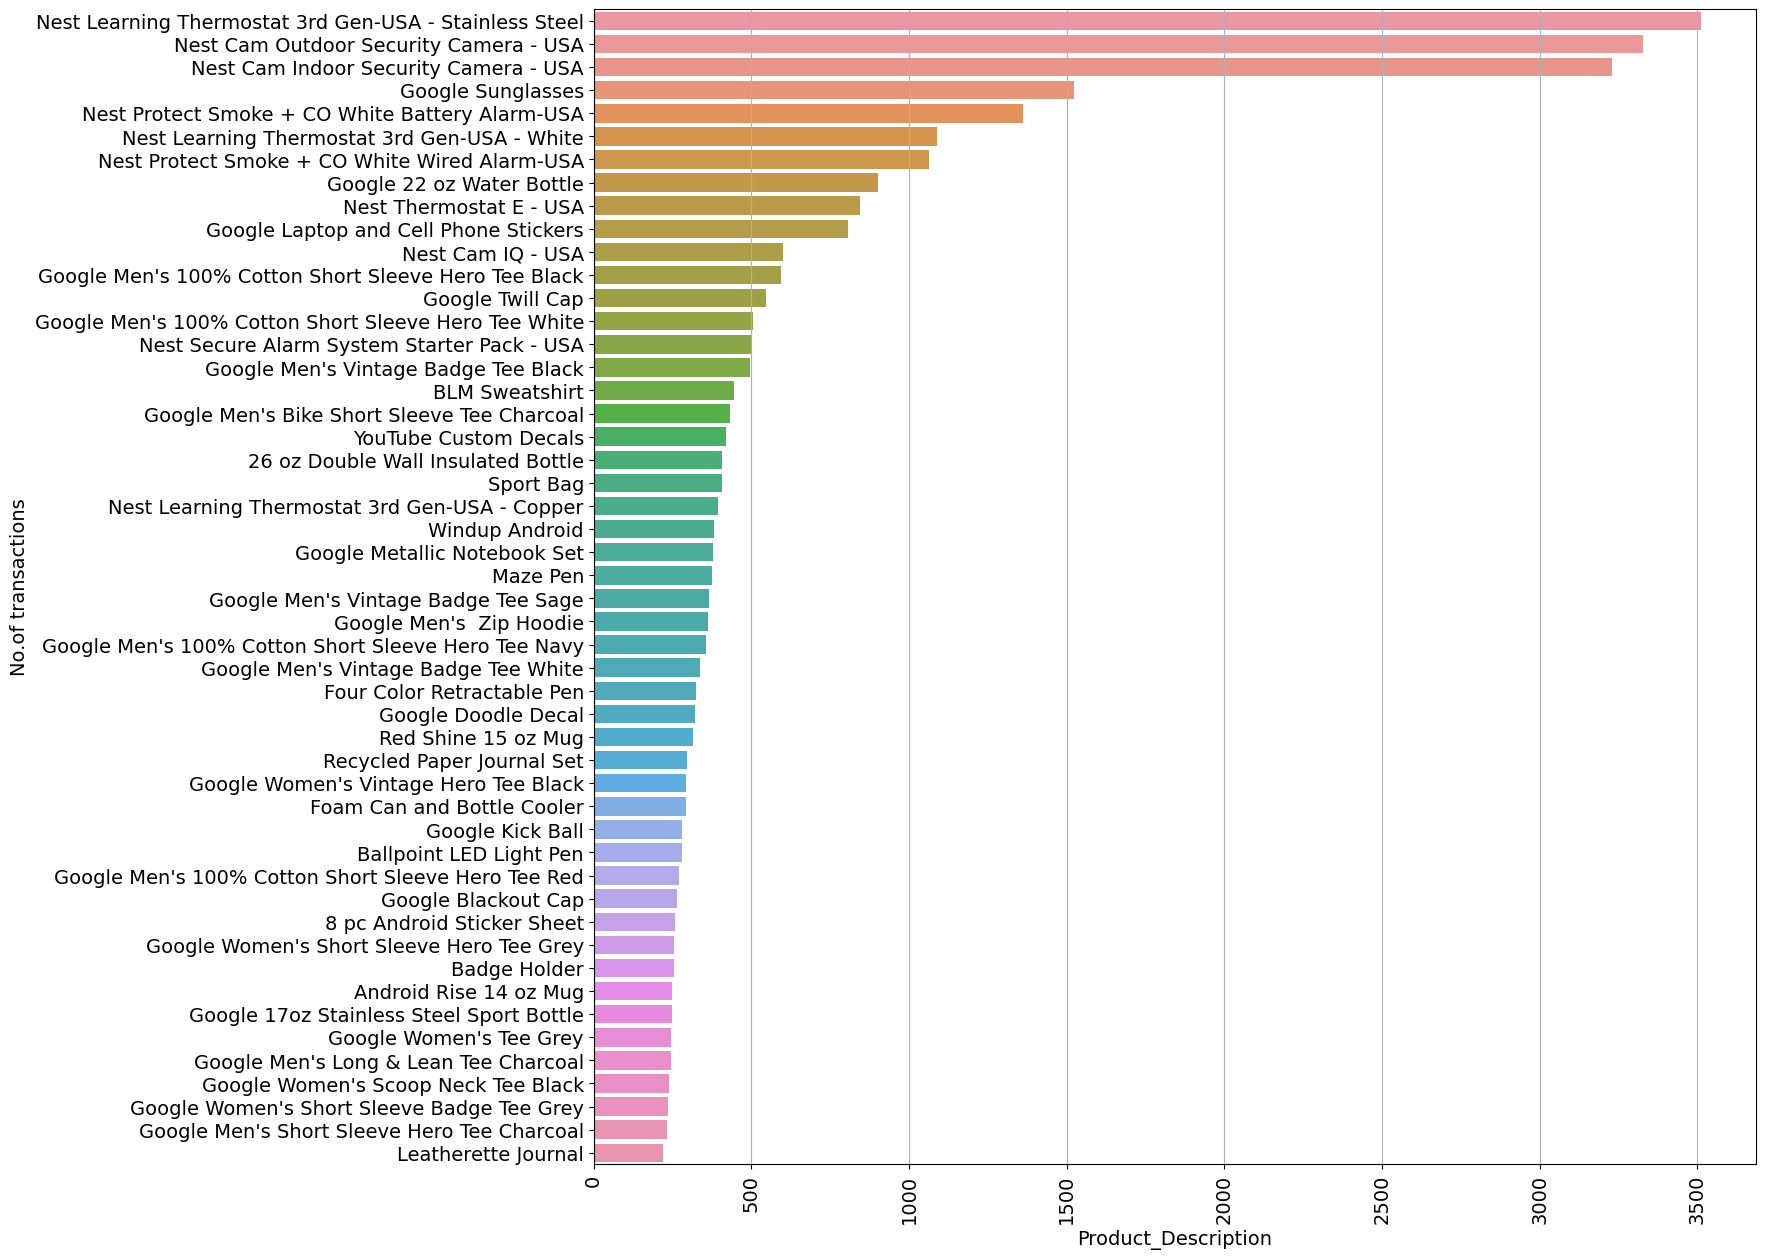

In [281]:
#Plotting the top 50 products purchased
plt.figure(figsize=(15,15))
sns.barplot(x=top_trans['No.of transactions'],y=top_trans['Product_Description'])
plt.xticks(rotation=90)
plt.xlabel('Product_Description')
plt.ylabel('No.of transactions')
plt.show()

In [282]:
# Findiding the minimum support threshold
trans_cnt['Support']=trans_cnt['No.of transactions']/trans_cnt['No.of transactions'].sum()
trans_cnt

Product_Description  No.of transactions  \
0    Nest Learning Thermostat 3rd Gen-USA - Stainle...                3511   
1               Nest Cam Outdoor Security Camera - USA                3328   
2                Nest Cam Indoor Security Camera - USA                3230   
3                                    Google Sunglasses                1523   
4      Nest Protect Smoke + CO White Battery Alarm-USA                1361   
..                                                 ...                 ...   
399                                     Google Tee Red                   2   
400                 Google Large Standard Journal Grey                   1   
401                Google Women's Colorblock Tee White                   1   
402  Android Women's Short Sleeve Tri-blend Badge T...                   1   
403                Compact Journal with Recycled Pages                   1   

      Support  
0    0.066340  
1    0.062883  
2    0.061031  
3    0.028777  
4    0.025716  
..        ...  
399  0.000038  
400  0.000019  
401  0.000019  
402  0.000019  
403  0.000019  

[404 rows x 3 columns]

In [283]:
#top 50 products by support value
trans_cnt.sort_values(by='Support', ascending=False).head(50)

Product_Description  No.of transactions  \
0   Nest Learning Thermostat 3rd Gen-USA - Stainle...                3511   
1              Nest Cam Outdoor Security Camera - USA                3328   
2               Nest Cam Indoor Security Camera - USA                3230   
3                                   Google Sunglasses                1523   
4     Nest Protect Smoke + CO White Battery Alarm-USA                1361   
5        Nest Learning Thermostat 3rd Gen-USA - White                1089   
6       Nest Protect Smoke + CO White Wired Alarm-USA                1065   
7                           Google 22 oz Water Bottle                 902   
8                             Nest Thermostat E - USA                 844   
9               Google Laptop and Cell Phone Stickers                 806   
10                                  Nest Cam IQ - USA                 599   
11  Google Men's 100% Cotton Short Sleeve Hero Tee...                 595   
12                                   Google Twill Cap                 546   
13  Google Men's 100% Cotton Short Sleeve Hero Tee...                 504   
14        Nest Secure Alarm System Starter Pack - USA                 498   
15               Google Men's Vintage Badge Tee Black                 496   
16                                     BLM Sweatshirt                 445   
17        Google Men's Bike Short Sleeve Tee Charcoal                 431   
18                              YouTube Custom Decals                 419   
19                 26 oz Double Wall Insulated Bottle                 408   
20                                          Sport Bag                 408   
21      Nest Learning Thermostat 3rd Gen-USA - Copper                 393   
22                                     Windup Android                 381   
23                       Google Metallic Notebook Set                 378   
24                                           Maze Pen                 374   
25                Google Men's Vintage Badge Tee Sage                 367   
26                           Google Men's  Zip Hoodie                 362   
27  Google Men's 100% Cotton Short Sleeve Hero Tee...                 356   
28               Google Men's Vintage Badge Tee White                 336   
29                         Four Color Retractable Pen                 324   
30                                Google Doodle Decal                 320   
31                                Red Shine 15 oz Mug                 315   
32                         Recycled Paper Journal Set                 297   
33              Google Women's Vintage Hero Tee Black                 293   
34                         Foam Can and Bottle Cooler                 292   
35                                   Google Kick Ball                 281   
36                            Ballpoint LED Light Pen                 280   
37  Google Men's 100% Cotton Short Sleeve Hero Tee...                 271   
38                                Google Blackout Cap                 264   
39                         8 pc Android Sticker Sheet                 258   
40          Google Women's Short Sleeve Hero Tee Grey                 256   
41                                       Badge Holder                 255   
42                             Android Rise 14 oz Mug                 250   
43           Google 17oz Stainless Steel Sport Bottle                 250   
44                            Google Women's Tee Grey                 246   
45              Google Men's Long & Lean Tee Charcoal                 246   
46                Google Women's Scoop Neck Tee Black                 240   
47         Google Women's Short Sleeve Badge Tee Grey                 236   
48        Google Men's Short Sleeve Hero Tee Charcoal                 233   
49                                Leatherette Journal                 220   

     Support  
0   0.066340  
1   0.062883  
2   0.061031  
3   0.028777  
4   0.025716  
5   0.020577  
6

In [284]:
#Top 50 products based on quantity
top_qty=final.groupby('Product_Description')[['Quantity']].sum().reset_index().sort_values(by='Quantity',ascending=False).head(50)
top_qty

Product_Description  Quantity
301                                           Maze Pen     16234
101                          Google 22 oz Water Bottle     14282
212                                  Google Sunglasses     11452
340                                          Sport Bag      7321
192                       Google Metallic Notebook Set      6496
140              Google Laptop and Cell Phone Stickers      5847
137                                   Google Kick Ball      5549
329                         Recycled Paper Journal Set      5381
312             Nest Cam Outdoor Security Camera - USA      5206
90                          Foam Can and Bottle Cooler      5098
74                             Ballpoint LED Light Pen      4861
316  Nest Learning Thermostat 3rd Gen-USA - Stainle...      4570
310              Nest Cam Indoor Security Camera - USA      4402
91                          Four Color Retractable Pen      4394
300                                Leatherette Journal      3741
76                                  Ballpoint Pen Blue      3576
359                                     Windup Android      3066
80                            Collapsible Shopping Bag      2956
73                                        Badge Holder      2883
92                        Galaxy Screen Cleaning Cloth      2801
321    Nest Protect Smoke + CO White Battery Alarm-USA      2683
323      Nest Protect Smoke + CO White Wired Alarm-USA      2670
339                        Spiral Notebook and Pen Set      2525
335                     SPF-15 Slim & Slender Lip Balm      2484
0                                  1 oz Hand Sanitizer      2434
297                               Keyboard DOT Sticker      2277
126                          Google Hard Cover Journal      2209
367                              YouTube Custom Decals      2132
206                     Google Spiral Journal with Pen      2094
9                           8 pc Android Sticker Sheet      2082
235                                   Google Twill Cap      2078
211                     Google Stylus Pen w/ LED Light      1993
113                                Google Blackout Cap      1903
100           Google 17oz Stainless Steel Sport Bottle      1857
121                                Google Doodle Decal      1714
327                       Pen Pencil & Highlighter Set      1661
149  Google Men's 100% Cotton Short Sleeve Hero Tee...      1607
7                   26 oz Double Wall Insulated Bottle      1567
368                         YouTube Hard Cover Journal      1488
81                             Color Changing Grip Pen      1471
373                 YouTube Leatherette Notebook Combo      1443
317       Nest Learning Thermostat 3rd Gen-USA - White      1368
331                         Red Spiral Google Notebook      1358
152  Google Men's 100% Cotton Short Sleeve Hero Tee...      1303
112                         Google Ballpoint Pen Black      1211
330                                Red Shine 15 oz Mug      1196
142                 Google Large Standard Journal Navy      1187
343                       Switch Tone Color Crayon Pen      1186
82                                  Colored Pencil Set      1185
328                                 Rainbow Stylus Pen      1132

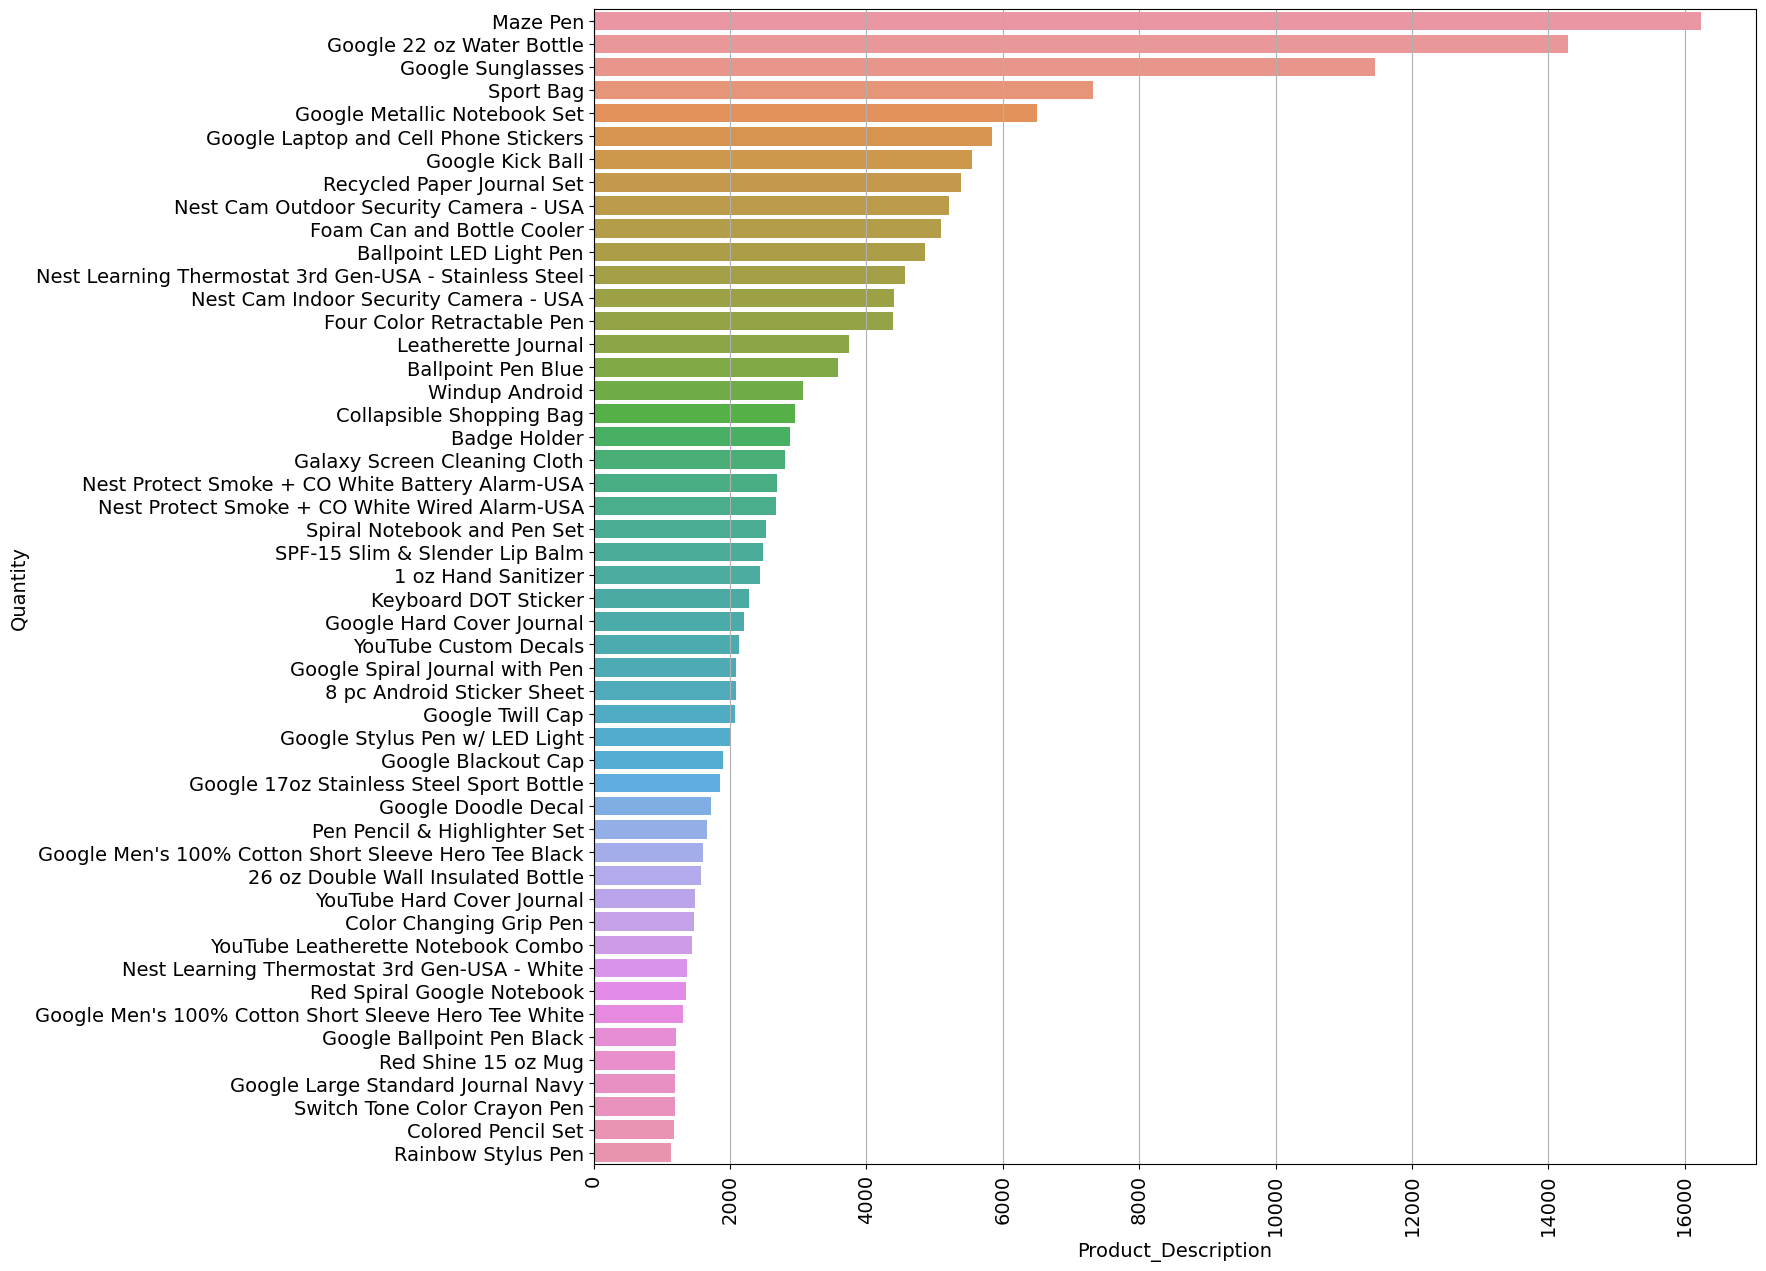

In [285]:
#Plotting of top 50 products by quantity
plt.figure(figsize=(15,15))
sns.barplot(x=top_qty['Quantity'],y=top_qty['Product_Description'])
plt.xticks(rotation=90)
plt.xlabel('Product_Description')
plt.ylabel('Quantity')
plt.show()

In [286]:
# Top products based on revenue genrated
top_rev = final.groupby('Product_Description')[['Revenue']].sum().sort_values(by='Revenue', ascending=False).reset_index().head(10)


In [287]:
# One hot encoding the products  for each transaction
def one_hot_encode(x):
    if x <= 0:
        return False
    if x > 0:
        return True

In [288]:
basket_sets = basket.applymap(one_hot_encode)
basket_sets.head()

Product_Description  1 oz Hand Sanitizer  \
Transaction_ID                             
16679                              False   
16680                              False   
16681                              False   
16682                              False   
16684                              False   

Product_Description  20 oz Stainless Steel Insulated Tumbler  \
Transaction_ID                                                 
16679                                                  False   
16680                                                  False   
16681                                                  False   
16682                                                  False   
16684                                                  False   

Product_Description  22 oz Android Bottle  22 oz YouTube Bottle Infuser  \
Transaction_ID                                                            
16679                               False                         False   
16680                               False                         False   
16681                               False                         False   
16682                               False                         False   
16684                               False                         False   

Product_Description  23 oz Wide Mouth Sport Bottle  \
Transaction_ID                                       
16679                                        False   
16680                                        False   
16681                                        False   
16682                                        False   
16684                                        False   

Product_Description  24 oz YouTube Sergeant Stripe Bottle  \
Transaction_ID                                              
16679                                               False   
16680                                               False   
16681                                               False   
16682                                               False   
16684                                               False   

Product_Description  25L Classic Rucksack  26 oz Double Wall Insulated Bottle  \
Transaction_ID                                                                  
16679                               False                               False   
16680                               False                               False   
16681                               False                               False   
16682                               False                               False   
16684                               False                               False   

Product_Description  7&quot; Dog Frisbee  8 pc Android Sticker Sheet  ...  \
Transaction_ID                                                        ...   
16679                              False                       False  ...   
16680                              False                       False  ...   
16681                              False                       False  ...   
16682                              False                       False  ...   
16684                              False                       False  ...   

Product_Description  YouTube Twill Cap  YouTube Women's Favorite Tee White  \
Transaction_ID                                                               
16679                            False                               False   
16680                            False                               False   
16681                            False                               False   
16682                            False                               False   
16684                            False                               False   

Product_Description  YouTube Women's Fleece Hoodie Black  \
Transaction_ID                                             
16679                                              False   
16680                                              False   
16681         

In [289]:
# Creating frequent itemsets table.A threshold of support 0.1% (0.001) is taken to filter only the frquent itemsets .
frequent_item_sets = apriori(basket_sets, min_support=0.001, use_colnames=True)
frequent_item_sets

support                                           itemsets
0    0.005147                              (1 oz Hand Sanitizer)
1    0.004509          (20 oz Stainless Steel Insulated Tumbler)
2    0.005546                             (22 oz Android Bottle)
3    0.005147                     (22 oz YouTube Bottle Infuser)
4    0.003392                    (23 oz Wide Mouth Sport Bottle)
..        ...                                                ...
540  0.002594  (Nest Cam Outdoor Security Camera - USA, Nest ...
541  0.001117  (Nest Cam Outdoor Security Camera - USA, Nest ...
542  0.001476  (Nest Protect Smoke + CO White Battery Alarm-U...
543  0.001836  (Nest Cam Outdoor Security Camera - USA, Nest ...
544  0.001117  (Nest Cam Outdoor Security Camera - USA, Nest ...

[545 rows x 2 columns]

In [290]:
# Generate rules with their corresponding support, confidence and lift
rules = association_rules(frequent_item_sets, metric="lift", min_threshold=3.0)

In [291]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 1000)

In [292]:
# Taking top 30 rules based on ascending order
top30rules = rules.sort_values(by='confidence', ascending=False).head(30)[['antecedents', 'consequents', 'confidence', 'lift']]
top30rules.head()

antecedents  \
400       (Android Sticker Sheet Ultra Removable, YouTube Custom Decals)   
406                         (Google Doodle Decal, YouTube Custom Decals)   
372                                                  (Nest Detect - USA)   
388  (Android Sticker Sheet Ultra Removable, 8 pc Android Sticker Sheet)   
394                    (8 pc Android Sticker Sheet, Google Doodle Decal)   

                                       consequents  confidence       lift  
400        (Google Laptop and Cell Phone Stickers)    0.928571  28.872120  
406        (Google Laptop and Cell Phone Stickers)    0.710526  22.092432  
372  (Nest Secure Alarm System Starter Pack - USA)    0.594595  29.921958  
388        (Google Laptop and Cell Phone Stickers)    0.492308  15.307349  
394        (Google Laptop and Cell Phone Stickers)    0.490566  15.253195

In [293]:
top30rules.columns = ['Antecedent_Item_Set',
                      'Consequent_Item_Set', 'Confidence', 'Lift']
top30rules.head()

Antecedent_Item_Set  \
400       (Android Sticker Sheet Ultra Removable, YouTube Custom Decals)   
406                         (Google Doodle Decal, YouTube Custom Decals)   
372                                                  (Nest Detect - USA)   
388  (Android Sticker Sheet Ultra Removable, 8 pc Android Sticker Sheet)   
394                    (8 pc Android Sticker Sheet, Google Doodle Decal)   

                               Consequent_Item_Set  Confidence       Lift  
400        (Google Laptop and Cell Phone Stickers)    0.928571  28.872120  
406        (Google Laptop and Cell Phone Stickers)    0.710526  22.092432  
372  (Nest Secure Alarm System Starter Pack - USA)    0.594595  29.921958  
388        (Google Laptop and Cell Phone Stickers)    0.492308  15.307349  
394        (Google Laptop and Cell Phone Stickers)    0.490566  15.253195

## 6.Predicting Next Purchase Day(How soon each customer can visit the store (0-30 days, 30-60 days, 60-90 days, 90+ days)
   •For this, we need create dependent variable at customer level (average days per one transaction for only repeat customers       and divide into groups 0-30 days, 30-60 days, 60-90 days and 90+ days) then build classification model to predict next        purchase of given customer.


## Data Preprocessing

In [294]:
nxt_pur=final[['CustomerID','Transaction_ID','Transaction_Date']]
nxt_pur.head()

CustomerID Transaction_ID Transaction_Date
0      17850          16679       2019-01-01
1      17850          16680       2019-01-01
2      17850          16681       2019-01-01
3      17850          16682       2019-01-01
4      17850          16682       2019-01-01

In [295]:
nxt_pur.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52924 entries, 0 to 52923
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CustomerID        52924 non-null  object        
 1   Transaction_ID    52924 non-null  object        
 2   Transaction_Date  52924 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 1.6+ MB


In [296]:
# Creating lead of transaction date and finding interval between adjacent transaction dates
nxt_pur['Date_shift']=nxt_pur.groupby('CustomerID')['Transaction_Date'].shift(-1)
nxt_pur['Interval']=nxt_pur['Date_shift']-nxt_pur['Transaction_Date']
nxt_pur.head(10)

CustomerID Transaction_ID Transaction_Date Date_shift Interval
0      17850          16679       2019-01-01 2019-01-01   0 days
1      17850          16680       2019-01-01 2019-01-01   0 days
2      17850          16681       2019-01-01 2019-01-01   0 days
3      17850          16682       2019-01-01 2019-01-01   0 days
4      17850          16682       2019-01-01 2019-01-01   0 days
5      17850          16682       2019-01-01 2019-01-01   0 days
6      17850          16682       2019-01-01 2019-01-01   0 days
7      17850          16682       2019-01-01 2019-01-01   0 days
8      17850          16682       2019-01-01 2019-01-01   0 days
9      13047          16682       2019-01-01 2019-01-01   0 days

In [297]:
#Finding average of interval between transactions for each customer
avg_int=nxt_pur.groupby(by='CustomerID')[['Interval']].mean()
avg_int.isnull().sum().sum()

66

In [298]:
#Filtering out the repeating customers
rep=avg_int[~avg_int.Interval.isnull()]
rep=rep.reset_index()

In [299]:
rep.isnull().sum().sum()

0

In [300]:
#Changing the format for interval
rep['Interval']=rep.Interval.dt.days
rep

CustomerID  Interval
0         12346         0
1         12347         3
2         12348         5
3         12350         0
4         12356         0
...         ...       ...
1397      18256         0
1398      18259         0
1399      18260         2
1400      18269        10
1401      18283         0

[1402 rows x 2 columns]

In [301]:
#Classifying customers according to their visiting frequency
rep['Visit_freq_class']=np.where(rep.Interval<=30,0,np.where(rep.Interval<=60,1,2))
rep.head()

CustomerID  Interval  Visit_freq_class
0      12346         0                 0
1      12347         3                 0
2      12348         5                 0
3      12350         0                 0
4      12356         0                 0

In [302]:
gen_loc=final[['CustomerID','Gender','Location']]

In [303]:
table1=gen_loc[~gen_loc.CustomerID.duplicated()]

In [304]:
merged1=pd.merge(how='left',left=data,right=table1,on='CustomerID')
merged=pd.merge(how='right',left=merged1,right=rep,on='CustomerID')

In [305]:
merged.drop(columns=['Interval'],inplace=True)

In [306]:
merged.index=merged['CustomerID']
merged.drop(columns='CustomerID',inplace=True)

In [307]:
merged.head()

prod_cats  no_skus  item_cnts   Monetary  Frequency  Recency  \
CustomerID                                                                 
12346               2        2          2    171.693          2      107   
12347              10       42         38  10589.289         60       59   
12348               6       21         18   1339.652         23       73   
12350               4       11         10   1079.929         17       17   
12356               7       33         29   1647.219         36      107   

            no_coupon_codes  avg_tenure  Transaction_Month_1  \
CustomerID                                                     
12346                     2        31.0                  0.0   
12347                    59        20.0                  0.0   
12348                    23        39.0                  0.0   
12350                    17        25.0                  0.0   
12356                    36        31.0                  0.0   

            Transaction_Month_2  Transaction_Month_3  Transaction_Month_4  \
CustomerID                                                                  
12346                         0                    0                    0   
12347                         0                   31                    0   
12348                         0                    0                    0   
12350                         0                    0                    0   
12356                         0                    0                    0   

            Transaction_Month_5  Transaction_Month_6  Transaction_Month_7  \
CustomerID                                                                  
12346                         0                    0                    0   
12347                         0                    0                    0   
12348                         0                   17                    0   
12350                         0                    0                    0   
12356                         0                    0                    0   

            Transaction_Month_8  Transaction_Month_9  Transaction_Month_10  \
CustomerID                                                                   
12346                         0                    2                     0   
12347                         0                    0                     0   
12348                         0                    0                     6   
12350                         0                    0                     0   
12356                         0                   36                     0   

            Transaction_Month_11  Transaction_Month_12 Gender    Location  \
CustomerID                                                                  
12346                          0                   0.0      F    New York   
12347                         29                   0.0      M    New York   
12348                          0                   0.0      M  California   
12350                          0                  17.0      M  California   
12356                          0                   0.0      F     Chicago   

            Visit_freq_class  
CustomerID                    
12346                      0  
12347                      0  
12348                      0  
12350                      0  
12356                      0

In [308]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1402 entries, 12346 to 18283
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   prod_cats             1402 non-null   int64  
 1   no_skus               1402 non-null   int64  
 2   item_cnts             1402 non-null   int64  
 3   Monetary              1402 non-null   float64
 4   Frequency             1402 non-null   int64  
 5   Recency               1402 non-null   int64  
 6   no_coupon_codes       1402 non-null   int64  
 7   avg_tenure            1402 non-null   float64
 8   Transaction_Month_1   1402 non-null   float64
 9   Transaction_Month_2   1402 non-null   uint8  
 10  Transaction_Month_3   1402 non-null   uint8  
 11  Transaction_Month_4   1402 non-null   uint8  
 12  Transaction_Month_5   1402 non-null   uint8  
 13  Transaction_Month_6   1402 non-null   uint8  
 14  Transaction_Month_7   1402 non-null   uint8  
 15  Transaction_Month_8  

## EDA

In [309]:
#Distribution of Y 
merged[['Visit_freq_class']].value_counts()

Visit_freq_class
0                   1385
1                     11
2                      6
dtype: int64

In [310]:
merged[['Visit_freq_class']].value_counts()/merged[['Visit_freq_class']].value_counts().sum()

Visit_freq_class
0                   0.987874
1                   0.007846
2                   0.004280
dtype: float64

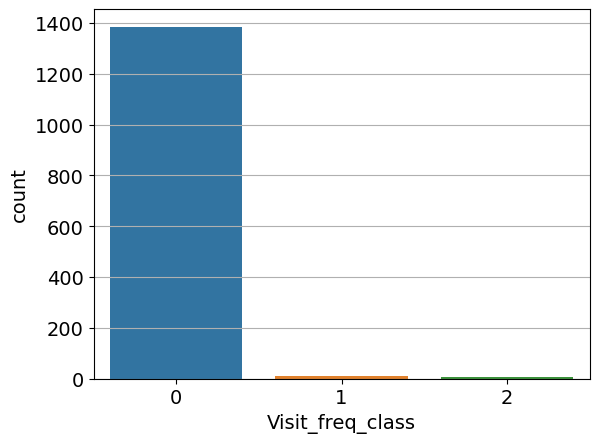

In [311]:
#Distribution plot of Y
sns.countplot(x='Visit_freq_class',data=merged)
plt.show()

In [312]:
col=merged.columns
col

Index(['prod_cats', 'no_skus', 'item_cnts', 'Monetary', 'Frequency', 'Recency',
       'no_coupon_codes', 'avg_tenure', 'Transaction_Month_1',
       'Transaction_Month_2', 'Transaction_Month_3', 'Transaction_Month_4',
       'Transaction_Month_5', 'Transaction_Month_6', 'Transaction_Month_7',
       'Transaction_Month_8', 'Transaction_Month_9', 'Transaction_Month_10',
       'Transaction_Month_11', 'Transaction_Month_12', 'Gender', 'Location',
       'Visit_freq_class'],
      dtype='object')

In [313]:
#Extracting numerical and categorical columns
Numcol=merged[['prod_cats','no_skus','item_cnts','Monetary','Frequency','Recency','no_coupon_codes','avg_tenure']]
Bincol=merged.columns.difference(Numcol.columns)
Numcol
Bincol

Index(['Gender', 'Location', 'Transaction_Month_1', 'Transaction_Month_10',
       'Transaction_Month_11', 'Transaction_Month_12', 'Transaction_Month_2',
       'Transaction_Month_3', 'Transaction_Month_4', 'Transaction_Month_5',
       'Transaction_Month_6', 'Transaction_Month_7', 'Transaction_Month_8',
       'Transaction_Month_9', 'Visit_freq_class'],
      dtype='object')

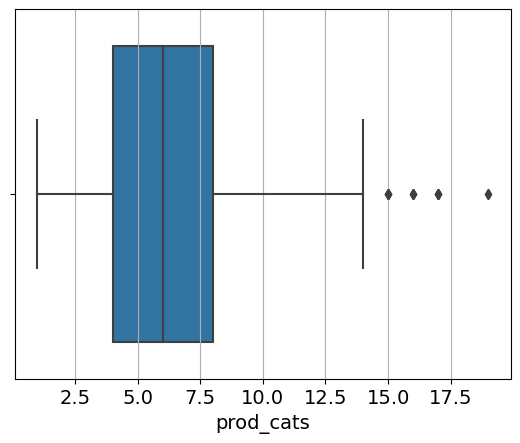

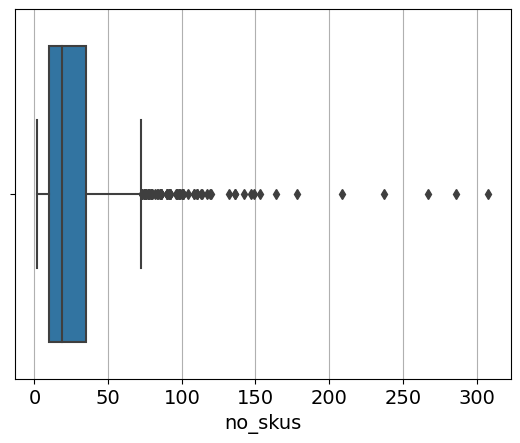

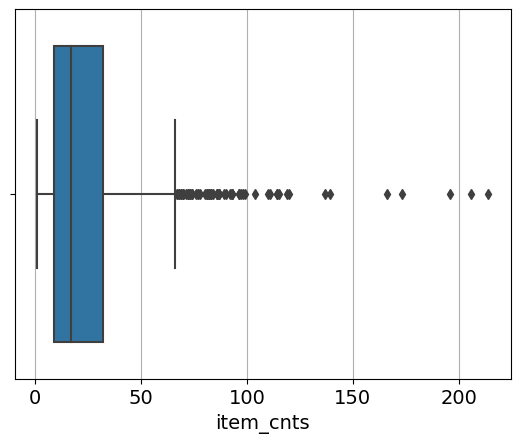

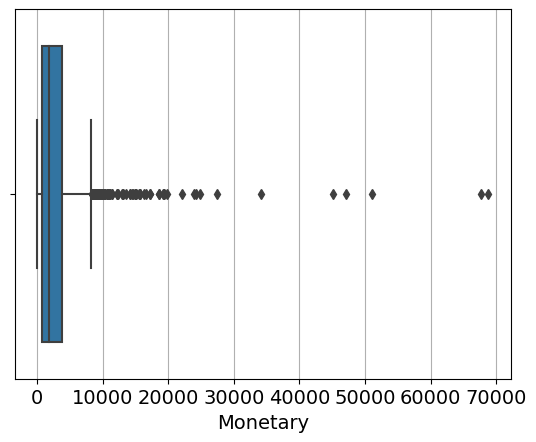

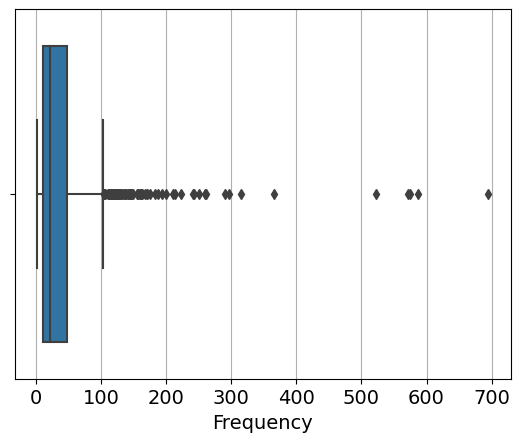

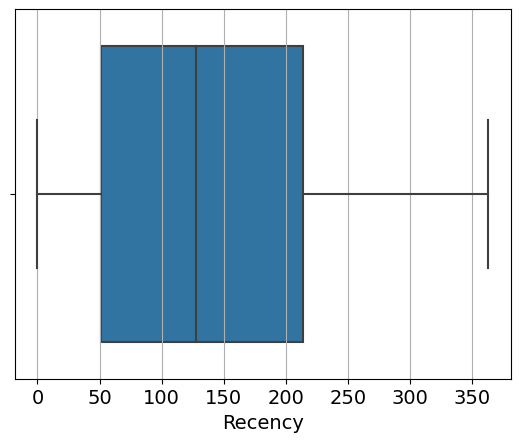

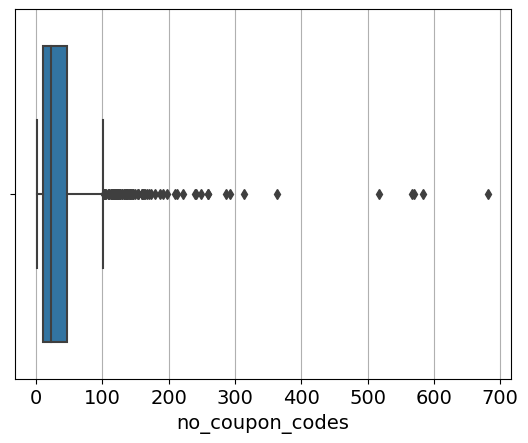

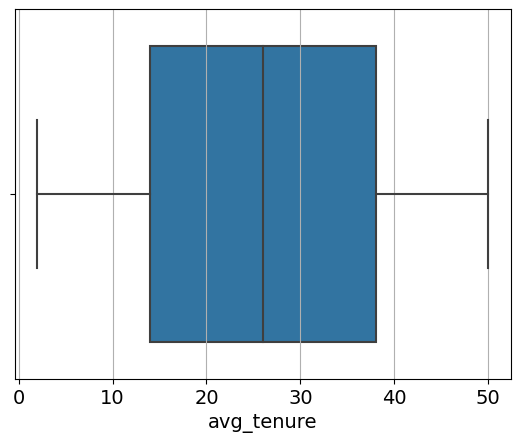

In [314]:
#Checking for outliers
for i in Numcol:
    sns.boxplot(merged[i])
    plt.show()

prod_cats
[array([4., 1.]), array([ 8., 14.])]


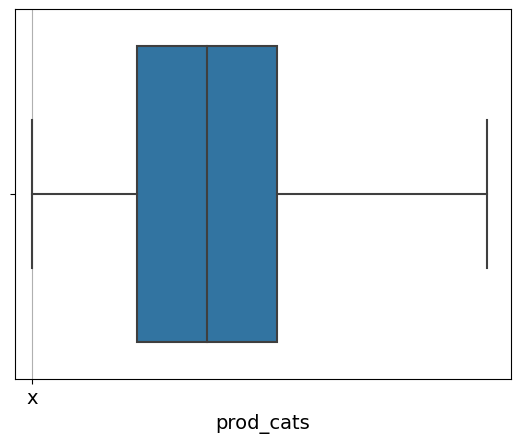

no_skus
[array([10.,  2.]), array([35., 72.])]


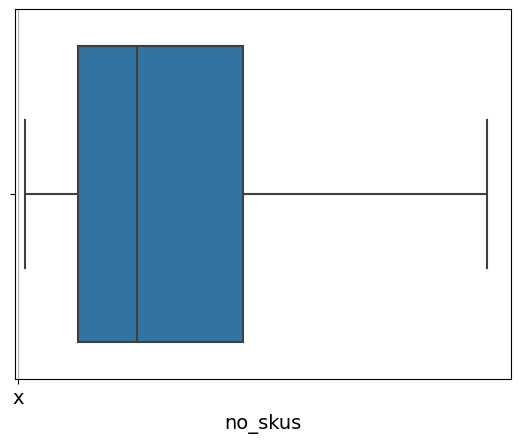

item_cnts
[array([9., 1.]), array([32., 66.])]


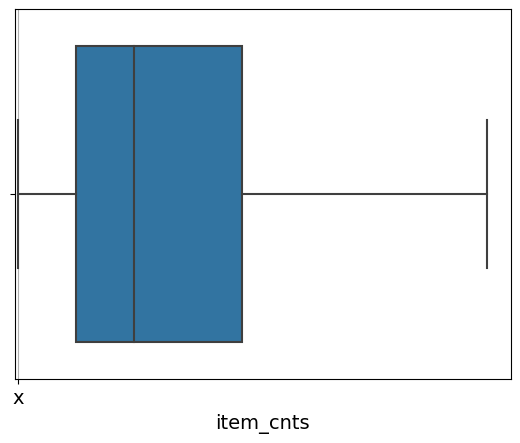

Monetary
[array([735.39375,  18.138  ]), array([3707.587, 8150.854])]


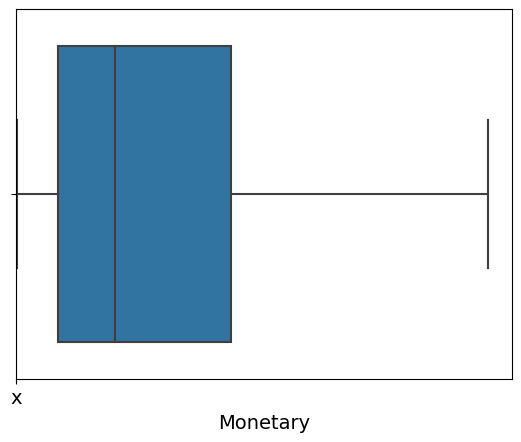

Frequency
[array([11.,  2.]), array([ 48., 103.])]


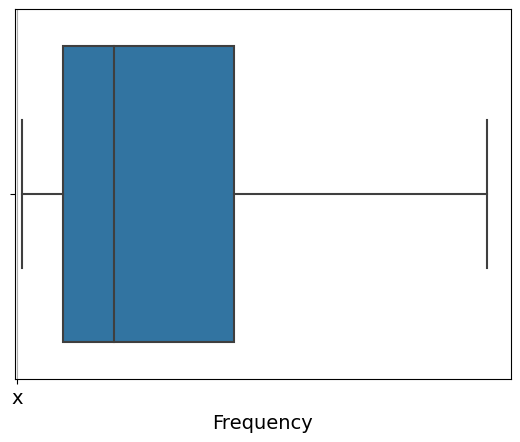

Recency
[array([51.25,  0.  ]), array([214., 363.])]


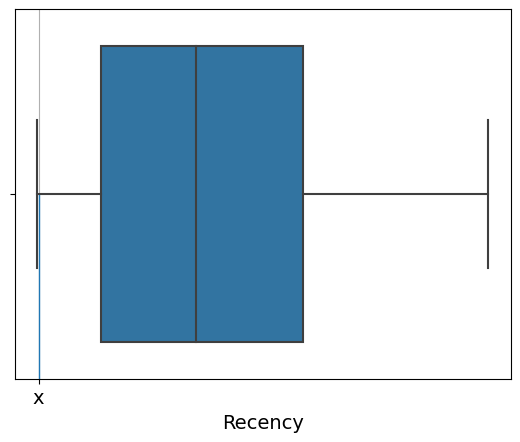

no_coupon_codes
[array([11.,  2.]), array([ 47., 101.])]


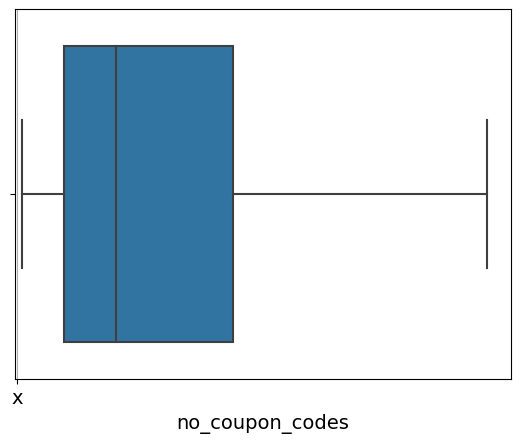

avg_tenure
[array([14.,  2.]), array([38., 50.])]


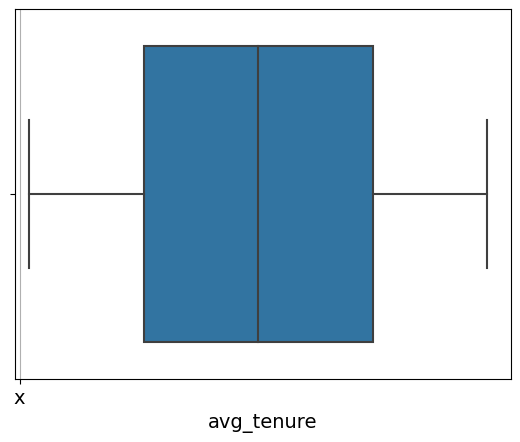

In [315]:
#Outlier treatment
for i in Numcol:
    _,bp=pd.DataFrame.boxplot(Numcol[i],return_type='both')
    whiskers=[whiskers.get_ydata()for whiskers in bp['whiskers']]
    print(i)
    print(whiskers)
    Numcol[i].clip(lower=whiskers[0][1],upper=whiskers[1][1],inplace=True)
    sns.boxplot(Numcol[i])
    plt.show()

In [316]:
# Checking for low variance
l=[]
for i in Numcol:
    if len(merged[i].unique()) <2:
        l.append(i)
        print(i,merged[i].unique())
print(l)

[]


In [317]:
#Verifying missings
X.isnull().sum().sum()

0

In [318]:
#Dummy creation of categorical variables
merged=pd.get_dummies(data=merged,columns=['Gender','Location'],drop_first=True)

C:\Users\itsfe\anaconda3\lib\site-packages\seaborn\matrix.py:302: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.

C:\Users\itsfe\anaconda3\lib\site-packages\seaborn\matrix.py:312: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



<AxesSubplot:>

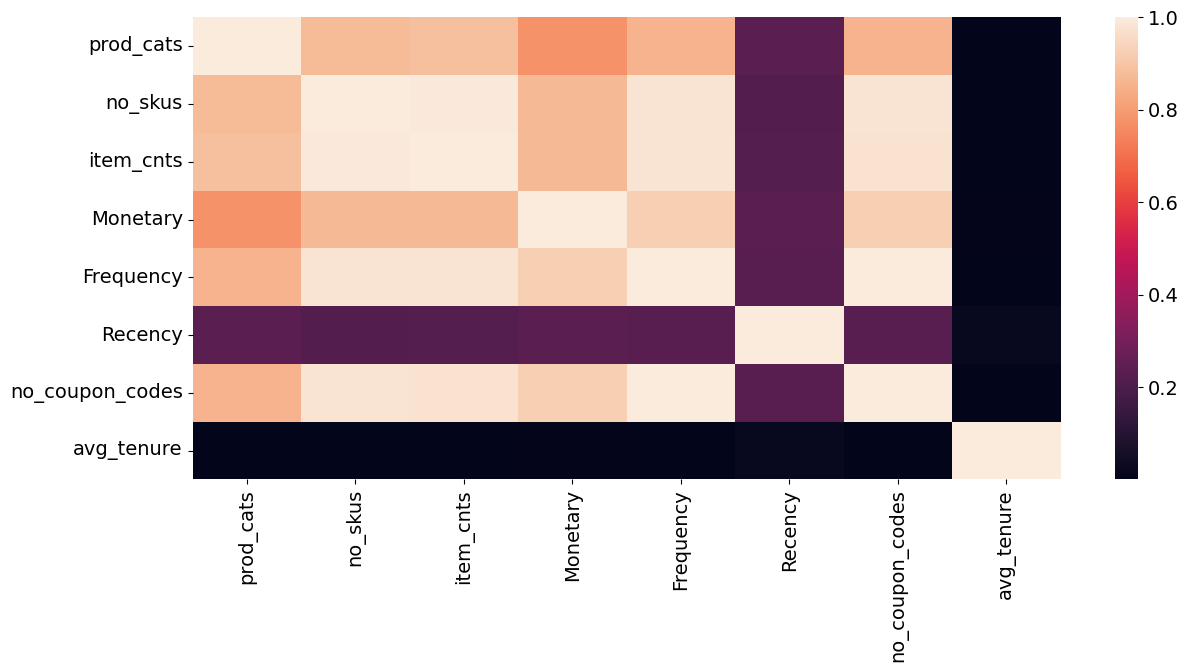

In [319]:
# Visualize correlation matrix in Seaborn using a heatmap for Numerical columns
plt.figure(figsize=(14,6))
sns.heatmap(Num_col.corr().abs())

In [320]:
#Info of final table for Classification
merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1402 entries, 12346 to 18283
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   prod_cats               1402 non-null   int64  
 1   no_skus                 1402 non-null   int64  
 2   item_cnts               1402 non-null   int64  
 3   Monetary                1402 non-null   float64
 4   Frequency               1402 non-null   int64  
 5   Recency                 1402 non-null   int64  
 6   no_coupon_codes         1402 non-null   int64  
 7   avg_tenure              1402 non-null   float64
 8   Transaction_Month_1     1402 non-null   float64
 9   Transaction_Month_2     1402 non-null   uint8  
 10  Transaction_Month_3     1402 non-null   uint8  
 11  Transaction_Month_4     1402 non-null   uint8  
 12  Transaction_Month_5     1402 non-null   uint8  
 13  Transaction_Month_6     1402 non-null   uint8  
 14  Transaction_Month_7     1402 non-null   

In [321]:
#Establishing dependednt and independent variables
y=merged['Visit_freq_class']
X=merged[merged.columns.difference(['Visit_freq_class'])]
X
y

CustomerID
12346    0
12347    0
12348    0
12350    0
12356    0
        ..
18256    0
18259    0
18260    0
18269    0
18283    0
Name: Visit_freq_class, Length: 1402, dtype: int32

In [322]:
#Balancing the data
sm = over_sampling.SMOTE(random_state=123)  
X, y = sm.fit_resample(X,y) 

In [323]:
X.shape

(4155, 25)

In [324]:
#Verifying the data after balancing 
y.value_counts()

0    1385
2    1385
1    1385
Name: Visit_freq_class, dtype: int64

# Feature Selection

In [325]:
#### RFE
classifier = RandomForestClassifier()
rfe = RFE(estimator=classifier,n_features_to_select=15,step=1)
rfe = rfe.fit(X,y)

In [326]:
imp_vars_RFE = list(X.columns[rfe.support_])

In [327]:
imp_vars_RFE

['Frequency',
 'Location_Chicago',
 'Location_New York',
 'Monetary',
 'Recency',
 'Transaction_Month_1',
 'Transaction_Month_10',
 'Transaction_Month_12',
 'Transaction_Month_3',
 'Transaction_Month_7',
 'avg_tenure',
 'item_cnts',
 'no_coupon_codes',
 'no_skus',
 'prod_cats']

In [328]:
SKB=SelectKBest(f_classif,k=12).fit(X,y)

In [329]:
SKB.get_support()
imp_vars_SKB = list(X.columns[SKB.get_support()])

In [330]:
imp_vars_SKB

['Frequency',
 'Gender_M',
 'Location_Chicago',
 'Location_New York',
 'Monetary',
 'Transaction_Month_6',
 'Transaction_Month_8',
 'avg_tenure',
 'item_cnts',
 'no_coupon_codes',
 'no_skus',
 'prod_cats']

In [331]:
imp_var=list(set(imp_vars_SKB+imp_vars_RFE))
imp_var

['Monetary',
 'Transaction_Month_10',
 'Transaction_Month_6',
 'Location_New York',
 'Frequency',
 'avg_tenure',
 'no_coupon_codes',
 'Recency',
 'Gender_M',
 'prod_cats',
 'Transaction_Month_1',
 'Transaction_Month_3',
 'Location_Chicago',
 'item_cnts',
 'Transaction_Month_12',
 'Transaction_Month_7',
 'Transaction_Month_8',
 'no_skus']

In [332]:
X_fin=X[['Monetary',
 'Location_New Jersey',
# 'item_cnts',
 'Transaction_Month_3',
# 'no_skus',
 'Transaction_Month_4',
# 'prod_cats',
 'Transaction_Month_1',
# 'Frequency',
 'Transaction_Month_10',
 'Transaction_Month_6',
 'Transaction_Month_8',
 'Location_Washington DC',
 'Transaction_Month_7',
 'avg_tenure',
 'Recency',
 'Location_Chicago',
 'Location_New York',
# 'no_coupon_codes'
]]

In [333]:
# Calculation of VIF and reducing variables
vif=pd.DataFrame()
vif['VIF_factor']=[variance_inflation_factor(X_fin.values,i) for i in range(X_fin.shape[1])]
vif['Features']=X_fin.columns
vif.sort_values(by='VIF_factor',ascending=False)

VIF_factor                Features
0     4.187603                Monetary
10    3.669506              avg_tenure
11    3.497532                 Recency
9     1.484282     Transaction_Month_7
3     1.447409     Transaction_Month_4
4     1.381267     Transaction_Month_1
2     1.351457     Transaction_Month_3
5     1.305493    Transaction_Month_10
7     1.282523     Transaction_Month_8
12    1.278082        Location_Chicago
6     1.217199     Transaction_Month_6
13    1.181176       Location_New York
1     1.169832     Location_New Jersey
8     1.044779  Location_Washington DC

In [334]:
#Splitting data into train and test
train_X,test_X,train_y,test_y=train_test_split(X_fin,y,test_size=0.3,random_state=123)
train=pd.concat([train_X,test_X],axis=0)
test=pd.concat([test_X,test_y],axis=0)

# Binomial Modelling- Logistic ML

In [335]:
#Build the model
model = LogisticRegression()
model = model.fit(train_X, train_y)

In [336]:
train_pred=model.predict(train_X)
test_pred=model.predict(test_X)

In [337]:
#Predicting the coefficients and intercepts 
coeff=model.coef_,model.intercept_
coeff

(array([[ 3.94913862e-03,  5.12176852e-02, -1.04447452e-01,
          3.58338020e-01,  1.84570159e-01,  3.27667302e-01,
          5.77168591e-01,  5.36496695e-01, -1.09965051e-02,
          2.99306274e-01, -7.75330815e-02,  2.24293477e-04,
          1.56526647e-01,  2.32035034e-01],
        [-2.38432485e-03,  3.93330070e-02,  3.17392117e-02,
         -1.63255949e-01,  6.17041676e-01,  3.02250787e-01,
         -3.67772392e-01, -2.56024832e-01,  5.74929621e-02,
          3.93004235e-01,  6.20387738e-02, -8.32356811e-04,
         -2.62585853e-01, -1.48502798e-01],
        [-1.56481377e-03, -9.05506922e-02,  7.27082403e-02,
         -1.95082072e-01, -8.01611834e-01, -6.29918089e-01,
         -2.09396199e-01, -2.80471863e-01, -4.64964570e-02,
         -6.92310509e-01,  1.54943077e-02,  6.08063334e-04,
          1.06059205e-01, -8.35322359e-02]]),
 array([-0.68957527, -0.28492601,  0.97450128]))

In [338]:
#Predicting probabilities of classes for train
LR_Trainprob=pd.DataFrame(model.predict_proba(train_X),index=train_X.index,columns=['LR_Trainprob_0','LR_Trainprob_1','LR_Trainprob_2'])
LR_Trainprob

LR_Trainprob_0  LR_Trainprob_1  LR_Trainprob_2
3837        0.184029        0.176762    6.392094e-01
2060        0.164690        0.831851    3.459640e-03
1409        0.294903        0.692611    1.248596e-02
3661        0.051682        0.375375    5.729428e-01
1971        0.295246        0.606296    9.845796e-02
...              ...             ...             ...
1593        0.212942        0.572108    2.149497e-01
4060        0.221412        0.185126    5.934620e-01
1346        0.059282        0.940718    8.474723e-17
3454        0.251852        0.225634    5.225134e-01
3582        0.200661        0.381023    4.183155e-01

[2908 rows x 3 columns]

In [339]:
#Predicting probabilities of classes for test
LR_Testprob=pd.DataFrame(model.predict_proba(test_X),index=test_X.index,columns=['LR_Testprob_0','LR_Testprob_1','LR_Testprob_2'])
LR_Testprob

LR_Testprob_0  LR_Testprob_1  LR_Testprob_2
1721       0.382437   3.186838e-01   2.988792e-01
1860       0.101861   8.713562e-01   2.678252e-02
909        0.520328   3.738125e-02   4.422906e-01
267        0.011590   9.884101e-01   1.149917e-10
1459       0.182889   7.370165e-01   8.009466e-02
...             ...            ...            ...
2737       0.058981   8.896577e-01   5.136082e-02
2692       0.357538   6.221274e-01   2.033465e-02
2325       0.723930   2.420332e-01   3.403716e-02
1079       0.999877   3.709465e-06   1.188819e-04
921        0.999995   1.378006e-07   4.649005e-06

[1247 rows x 3 columns]

In [340]:
cm=confusion_matrix(train_y,train_pred)
cm

array([[764, 105,  89],
       [131, 745,  98],
       [ 53,   5, 918]], dtype=int64)

C:\Users\itsfe\anaconda3\lib\site-packages\seaborn\matrix.py:302: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.

C:\Users\itsfe\anaconda3\lib\site-packages\seaborn\matrix.py:312: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



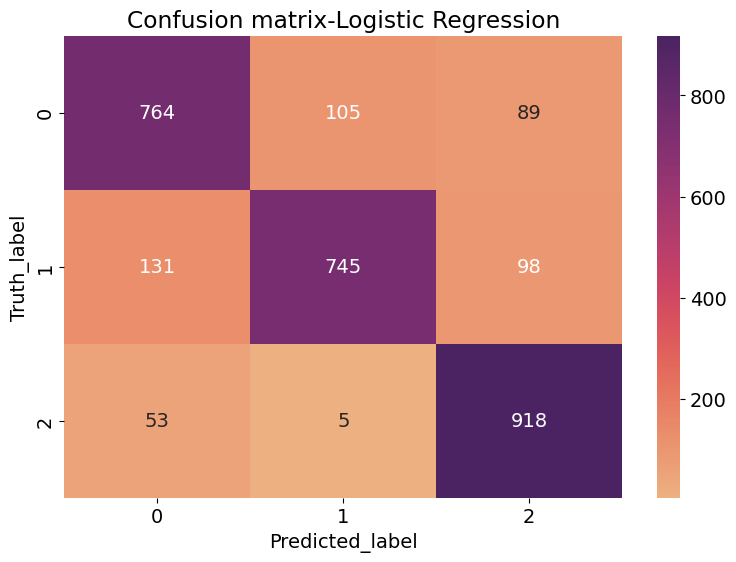

In [341]:
#Plotting of confusion matrix
plt.figure(figsize=[9,6])
sns.heatmap(cm,annot=True,cmap= 'flare',  fmt='d')
plt.xlabel('Predicted_label')
plt.ylabel('Truth_label')
plt.title('Confusion matrix-Logistic Regression')
plt.show()

In [342]:
#Classification Report of train data
print(metrics.classification_report(train_y,train_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80       958
           1       0.87      0.76      0.81       974
           2       0.83      0.94      0.88       976

    accuracy                           0.83      2908
   macro avg       0.84      0.83      0.83      2908
weighted avg       0.84      0.83      0.83      2908



In [343]:
#Classification Report of test data
print(metrics.classification_report(test_y,test_pred))

              precision    recall  f1-score   support

           0       0.84      0.79      0.82       427
           1       0.87      0.77      0.82       411
           2       0.80      0.94      0.87       409

    accuracy                           0.83      1247
   macro avg       0.84      0.84      0.83      1247
weighted avg       0.84      0.83      0.83      1247



In [344]:
ovr=OneVsRestClassifier(LogisticRegression())
mod=ovr.fit(train_X,train_y)
pred_prob=mod.predict_proba(train_X)

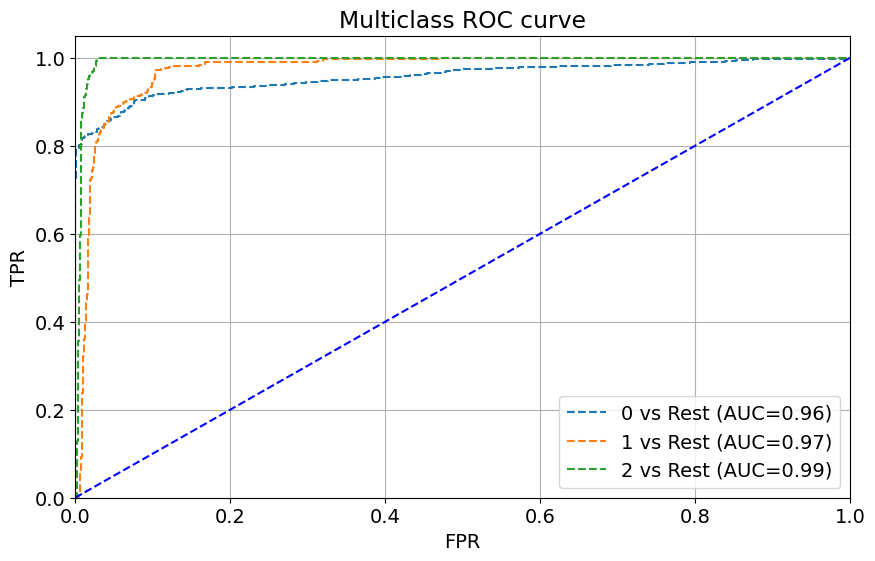

In [345]:
#Plotting of roc curve

classes=np.unique(train_y)
y_train_binarized=label_binarize(train_y,classes=np.unique(train_y))

fpr={}
tpr={}
thresh={}
roc_auc=dict()

n_class=classes.shape[0]
plt.figure(figsize=(10,6))
for i in range(n_class):
    fpr[i],tpr[i],thresh[i]=roc_curve(y_train_binarized[:,i],pred_prob[:,i])
    roc_auc[i]=auc(fpr[i],tpr[i])
    
    plt.plot(fpr[i],tpr[i],linestyle='--',
            label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))
    
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='lower right')
plt.show()

## Decision Tree Classifier

In [346]:
#Finding best parameters
param_grid_dt = {'max_depth': np.arange(3, 5),
                 'max_features': np.arange(3,5)}

In [347]:
dt_grid=GridSearchCV(DecisionTreeClassifier(),param_grid_dt ,scoring='roc_auc_ovr',n_jobs=-1,cv=5,verbose=True)

In [348]:
dt_fit=dt_grid.fit(train_X,train_y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [349]:
dt_fit.cv_results_

{'mean_fit_time': array([0.0227664 , 0.01121492, 0.00627813, 0.00625725]),
 'std_fit_time': array([0.0115695 , 0.00653407, 0.00538915, 0.00766353]),
 'mean_score_time': array([0.0141819 , 0.01732707, 0.01037221, 0.00937815]),
 'std_score_time': array([0.00321863, 0.00739161, 0.00543453, 0.00765723]),
 'param_max_depth': masked_array(data=[3, 3, 4, 4],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=[3, 4, 3, 4],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 3, 'max_features': 3},
  {'max_depth': 3, 'max_features': 4},
  {'max_depth': 4, 'max_features': 3},
  {'max_depth': 4, 'max_features': 4}],
 'split0_test_score': array([0.78814752, 0.94478343, 0.83721132, 0.97716748]),
 'split1_test_score': array([0.83839375, 0.83562244, 0.89154974, 0.92912172]),
 'split2_test_score': array([0.84686541, 0.78530634, 0.9408834 ,

In [350]:
dt_fit.best_score_

0.9194691559768191

In [351]:
dt_fit.best_params_

{'max_depth': 4, 'max_features': 4}

In [352]:
dt_mod=DecisionTreeClassifier(max_depth= 4, max_features=3).fit(train_X,train_y)

In [353]:
dt_train=dt_mod.predict(train_X)
dt_test=dt_mod.predict(test_X)

In [354]:
cm=confusion_matrix(train_y,dt_train)

C:\Users\itsfe\anaconda3\lib\site-packages\seaborn\matrix.py:302: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.

C:\Users\itsfe\anaconda3\lib\site-packages\seaborn\matrix.py:312: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



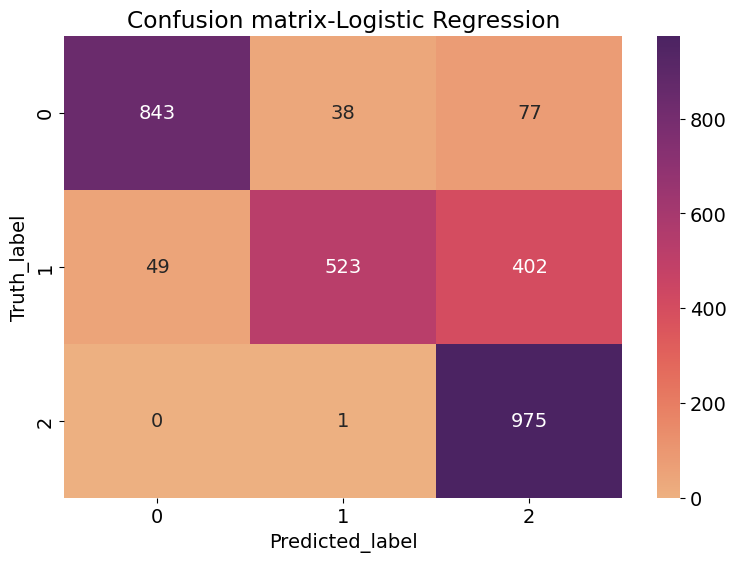

In [355]:
#Plotting of confusion matrix
plt.figure(figsize=[9,6])
sns.heatmap(cm,annot=True,cmap= 'flare',  fmt='d')
plt.xlabel('Predicted_label')
plt.ylabel('Truth_label')
plt.title('Confusion matrix-Logistic Regression')
plt.show()

In [356]:
#Classification report of train
print(metrics.classification_report(train_y,dt_train))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91       958
           1       0.93      0.54      0.68       974
           2       0.67      1.00      0.80       976

    accuracy                           0.81      2908
   macro avg       0.85      0.81      0.80      2908
weighted avg       0.85      0.81      0.80      2908



In [357]:
#Classification report of test
print(metrics.classification_report(test_y,dt_test))

              precision    recall  f1-score   support

           0       0.96      0.84      0.89       427
           1       0.92      0.52      0.66       411
           2       0.64      1.00      0.78       409

    accuracy                           0.78      1247
   macro avg       0.84      0.78      0.78      1247
weighted avg       0.84      0.78      0.78      1247



In [358]:
#Plotting tree in text 
text_=tree.export_text(dt_mod,feature_names=list(train_X.columns))
print(text_)

|--- avg_tenure <= 26.00
|   |--- Monetary <= 566.32
|   |   |--- Transaction_Month_10 <= 0.50
|   |   |   |--- avg_tenure <= 9.99
|   |   |   |   |--- class: 2
|   |   |   |--- avg_tenure >  9.99
|   |   |   |   |--- class: 2
|   |   |--- Transaction_Month_10 >  0.50
|   |   |   |--- avg_tenure <= 12.41
|   |   |   |   |--- class: 0
|   |   |   |--- avg_tenure >  12.41
|   |   |   |   |--- class: 1
|   |--- Monetary >  566.32
|   |   |--- class: 0
|--- avg_tenure >  26.00
|   |--- Location_New York <= 0.50
|   |   |--- Monetary <= 830.83
|   |   |   |--- avg_tenure <= 35.99
|   |   |   |   |--- class: 1
|   |   |   |--- avg_tenure >  35.99
|   |   |   |   |--- class: 0
|   |   |--- Monetary >  830.83
|   |   |   |--- class: 0
|   |--- Location_New York >  0.50
|   |   |--- class: 0



In [359]:
#Plotting of decison tree
fig, axes = plt.subplots(nrows = 1 , ncols = 1, figsize =(15,15), dpi=600)
tree.plot_tree(dt_mod,feature_names=train_X.columns,class_names="012",filled=True)

[Text(0.6071428571428571, 0.9, 'avg_tenure <= 25.995\ngini = 0.667\nsamples = 2908\nvalue = [958, 974, 976]\nclass = 2'),
 Text(0.35714285714285715, 0.7, 'Monetary <= 566.317\ngini = 0.633\nsamples = 2041\nvalue = [468, 597, 976]\nclass = 2'),
 Text(0.2857142857142857, 0.5, 'Transaction_Month_10 <= 0.5\ngini = 0.522\nsamples = 1659\nvalue = [86, 597, 976]\nclass = 2'),
 Text(0.14285714285714285, 0.3, 'avg_tenure <= 9.993\ngini = 0.471\nsamples = 1454\nvalue = [77, 402, 975]\nclass = 2'),
 Text(0.07142857142857142, 0.1, 'gini = 0.198\nsamples = 206\nvalue = [23, 0, 183]\nclass = 2'),
 Text(0.21428571428571427, 0.1, 'gini = 0.492\nsamples = 1248\nvalue = [54, 402, 792]\nclass = 2'),
 Text(0.42857142857142855, 0.3, 'avg_tenure <= 12.411\ngini = 0.093\nsamples = 205\nvalue = [9, 195, 1]\nclass = 1'),
 Text(0.35714285714285715, 0.1, 'gini = 0.0\nsamples = 6\nvalue = [6, 0, 0]\nclass = 0'),
 Text(0.5, 0.1, 'gini = 0.04\nsamples = 199\nvalue = [3, 195, 1]\nclass = 1'),
 Text(0.428571428571428

## XGBoost Classifier

In [360]:
#Establishing grid
params = {'n_estimators':[100,500,600],
        'learning_rate': [0.1,0.2,0.3] }


In [361]:
grid=GridSearchCV(XGBClassifier(),params,scoring='roc_auc_ovr',cv=5,verbose=True,n_jobs=-1)

In [362]:
grid.fit(train_X,train_y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'n_estimators': [100, 500, 600]},
             scoring='roc_auc_ovr', verbose=True)

In [363]:
grid.cv_results_

{'mean_fit_time': array([2.63826909, 7.65213566, 8.76592889, 2.21827354, 6.1032114 ,
        6.62822008, 1.83111448, 5.47935348, 5.4867908 ]),
 'std_fit_time': array([0.06844544, 0.11349758, 0.21056469, 0.10824274, 0.41530685,
        0.35485542, 0.10204397, 0.08201203, 0.26243294]),
 'mean_score_time': array([0.03271985, 0.04774408, 0.0475421 , 0.01905532, 0.0523315 ,
        0.04012136, 0.02504058, 0.04172778, 0.03289514]),
 'std_score_time': array([0.00560813, 0.00133635, 0.01158505, 0.00641279, 0.01278724,
        0.00191329, 0.00569361, 0.00592722, 0.0048265 ]),
 'param_learning_rate': masked_array(data=[0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.3, 0.3, 0.3],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[100, 500, 600, 100, 500, 600, 100, 500, 600],
              mask=[False, False, False, False, False, False, False, False,
                 

In [364]:
grid.best_score_

0.9999020374940247

In [365]:
grid.best_params_

{'learning_rate': 0.2, 'n_estimators': 100}

In [366]:
xgb_mod=XGBClassifier(learning_rate=0.2, n_estimators=100).fit(train_X,train_y)

In [367]:
#Predicting train and test
xgb_train=xgb_mod.predict(train_X)
xgb_test=xgb_mod.predict(test_X)

In [368]:
#Confusion matrix
cm=confusion_matrix(train_y,xgb_train)
cm

array([[958,   0,   0],
       [  0, 974,   0],
       [  0,   0, 976]], dtype=int64)

C:\Users\itsfe\anaconda3\lib\site-packages\seaborn\matrix.py:302: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.

C:\Users\itsfe\anaconda3\lib\site-packages\seaborn\matrix.py:312: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



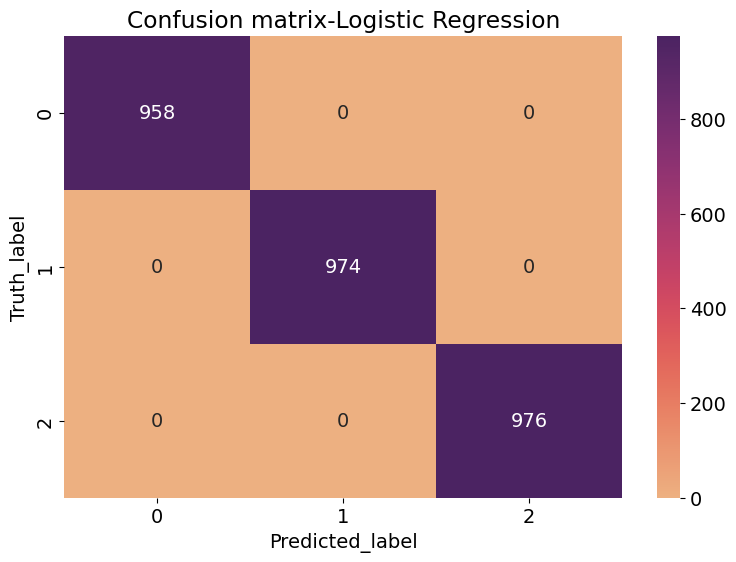

In [369]:
#Plotting of confusion matrix
plt.figure(figsize=[9,6])
sns.heatmap(cm,annot=True,cmap= 'flare',  fmt='d')
plt.xlabel('Predicted_label')
plt.ylabel('Truth_label')
plt.title('Confusion matrix-Logistic Regression')
plt.show()

In [370]:
#Classification report for train data
print(metrics.classification_report(train_y,xgb_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       958
           1       1.00      1.00      1.00       974
           2       1.00      1.00      1.00       976

    accuracy                           1.00      2908
   macro avg       1.00      1.00      1.00      2908
weighted avg       1.00      1.00      1.00      2908



In [371]:
#Classification report for test data
print(metrics.classification_report(test_y,xgb_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       427
           1       1.00      1.00      1.00       411
           2       1.00      1.00      1.00       409

    accuracy                           1.00      1247
   macro avg       1.00      1.00      1.00      1247
weighted avg       1.00      1.00      1.00      1247



## 7.Perform cohort analysis by defining below cohorts
## •Customers who started in each month and understand their behaviour
## •Which Month cohort has maximum retention?


In [372]:
#Creating cohort class on first purchase month of each customer
first_mnth=final.groupby(['CustomerID'])[['Transaction_Month']].min()
first_mnth.rename(columns={'Transaction_Month':'Cohort_class'},inplace=True)
cohort=pd.merge(how='left',left=first_mnth,right=data,on='CustomerID')

In [373]:
cohort_profile=cohort[cohort.columns.difference(['CustomerID'])]
cohort_profile.head()

Cohort_class  Frequency   Monetary  Recency  Transaction_Month_1  \
0             9          2    171.693      107                  0.0   
1             3         60  10589.289       59                  0.0   
2             6         23   1339.652       73                  0.0   
3            12         17   1079.929       17                  0.0   
4             9         36   1647.219      107                  0.0   

   Transaction_Month_10  Transaction_Month_11  Transaction_Month_12  \
0                     0                     0                   0.0   
1                     0                    29                   0.0   
2                     6                     0                   0.0   
3                     0                     0                  17.0   
4                     0                     0                   0.0   

   Transaction_Month_2  Transaction_Month_3  Transaction_Month_4  \
0                    0                    0                    0   
1                    0                   31                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   Transaction_Month_5  Transaction_Month_6  Transaction_Month_7  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                   17                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   Transaction_Month_8  Transaction_Month_9  avg_tenure  item_cnts  \
0                    0                    2        31.0          2   
1                    0                    0        20.0         38   
2                    0                    0        39.0         18   
3                    0                    0        25.0         10   
4                    0                   36        31.0         29   

   no_coupon_codes  no_skus  prod_cats  
0                2        2          2  
1               59       42         10  
2               23       21          6  
3               17       11          4  
4               36       33          7

In [374]:
#Profiling of cohorts
profile=cohort_profile.groupby('Cohort_class').apply(lambda x:x.mean()).T
profile.head()

Cohort_class                  1            2            3            4   \
Cohort_class            1.000000     2.000000     3.000000     4.000000   
Frequency              50.874419    64.729167    43.327684    30.766871   
Monetary             4642.474684  5186.006417  3319.669435  2616.466209   
Recency               215.046512   169.822917   186.711864   187.644172   
Transaction_Month_1    18.897674     0.000000     0.000000     0.000000   

Cohort_class                  5            6            7            8   \
Cohort_class            5.000000     6.000000     7.000000     8.000000   
Frequency              40.526786    27.401460    31.744681    27.340741   
Monetary             2731.200866  1798.786934  2416.849617  1766.611652   
Recency               161.830357   150.058394   133.819149   117.007407   
Transaction_Month_1     0.000000     0.000000     0.000000     0.000000   

Cohort_class                  9            10           11           12  
Cohort_class            9.000000    10.000000    11.000000    12.000000  
Frequency              24.269231    25.586207    26.764706    20.575472  
Monetary             1598.651923  2667.205414  2821.647765  1804.570085  
Recency               100.346154    70.241379    43.235294    16.160377  
Transaction_Month_1     0.000000     0.000000     0.000000     0.000000

In [375]:
#Cohort Analysis by Revenue
coh_rev=cohort.groupby('Cohort_class')[['Monetary']].mean()
coh_rev

Monetary
Cohort_class             
1             4642.474684
2             5186.006417
3             3319.669435
4             2616.466209
5             2731.200866
6             1798.786934
7             2416.849617
8             1766.611652
9             1598.651923
10            2667.205414
11            2821.647765
12            1804.570085

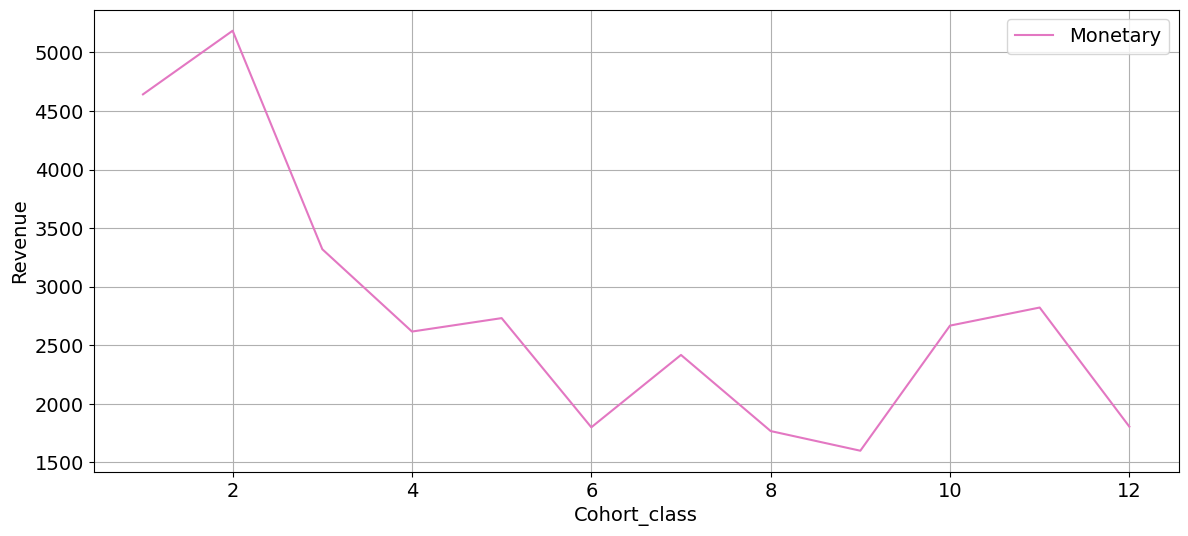

In [376]:
coh_rev.plot(kind='line',color='#e377c2',ylabel='Revenue',figsize=[14,6])
plt.show()

In [377]:
coh_freq=cohort.groupby('Cohort_class')[['Frequency']].mean()
coh_freq

Frequency
Cohort_class           
1             50.874419
2             64.729167
3             43.327684
4             30.766871
5             40.526786
6             27.401460
7             31.744681
8             27.340741
9             24.269231
10            25.586207
11            26.764706
12            20.575472

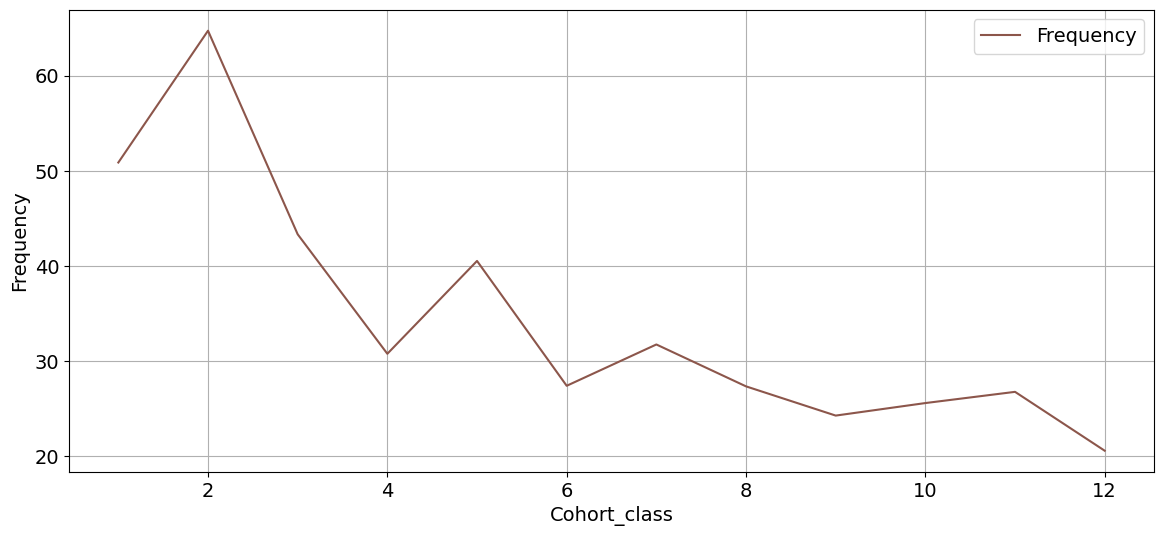

In [378]:
coh_freq.plot(kind='line',color='#8c564b',ylabel='Frequency',figsize=[14,6])
plt.show()

In [379]:
coh_prod=cohort.groupby('Cohort_class')[['prod_cats']].mean()
coh_prod

prod_cats
Cohort_class           
1              6.469767
2              7.947917
3              6.858757
4              5.662577
5              6.383929
6              5.766423
7              5.457447
8              5.925926
9              5.564103
10             5.471264
11             5.764706
12             4.481132

<AxesSubplot:xlabel='Cohort_class', ylabel='No.of Product categories'>

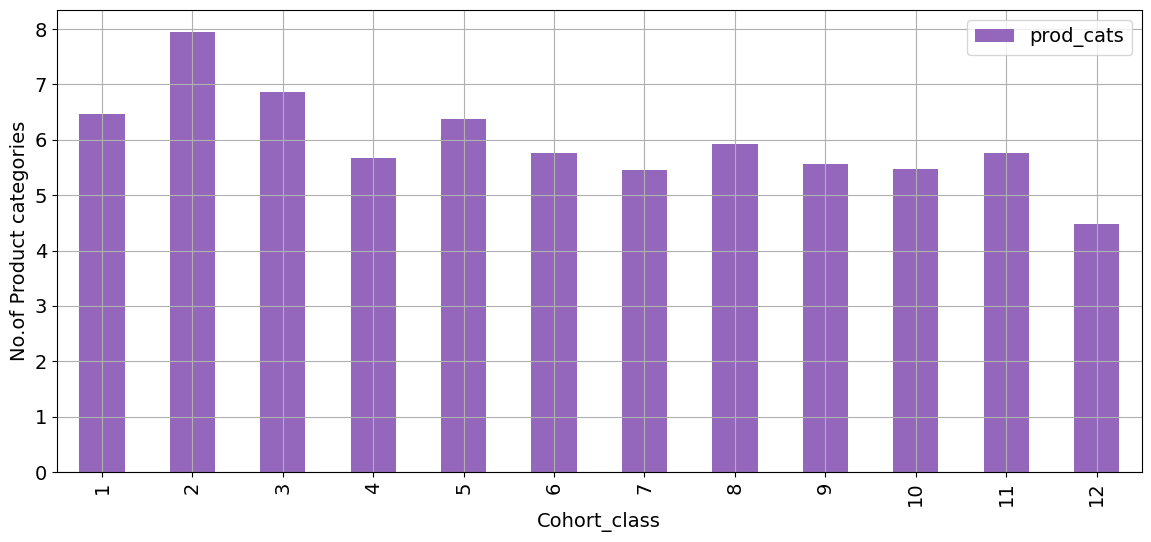

In [380]:
coh_prod.plot(kind='bar',color='#9467bd',ylabel='No.of Product categories',figsize=[14,6])

In [381]:
##Analyzing retention of cohorts

In [383]:
cohort_ret=pd.merge(how='left',left=cohort,right=final,on='CustomerID')
cohort_ret.head()

CustomerID  Cohort_class  prod_cats  no_skus  item_cnts   Monetary  \
0      12346             9          2        2          2    171.693   
1      12346             9          2        2          2    171.693   
2      12347             3         10       42         38  10589.289   
3      12347             3         10       42         38  10589.289   
4      12347             3         10       42         38  10589.289   

   Frequency  Recency  no_coupon_codes  avg_tenure  Transaction_Month_1  \
0          2      107                2        31.0                  0.0   
1          2      107                2        31.0                  0.0   
2         60       59               59        20.0                  0.0   
3         60       59               59        20.0                  0.0   
4         60       59               59        20.0                  0.0   

   Transaction_Month_2  Transaction_Month_3  Transaction_Month_4  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                   31                    0   
3                    0                   31                    0   
4                    0                   31                    0   

   Transaction_Month_5  Transaction_Month_6  Transaction_Month_7  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   Transaction_Month_8  Transaction_Month_9  Transaction_Month_10  \
0                    0                    2                     0   
1                    0                    2                     0   
2                    0                    0                     0   
3                    0                    0                     0   
4                    0                    0                     0   

   Transaction_Month_11  Transaction_Month_12 Transaction_ID Transaction_Date  \
0                     0                   0.0          38223       2019-09-15   
1                     0                   0.0          38223       2019-09-15   
2                    29                   0.0          23979       2019-03-24   
3                    29                   0.0          23979       2019-03-24   
4                    29                   0.0          23980       2019-03-24   

      Product_SKU                                     Product_Description  \
0  GGOEAAAJ080816        Android Men's Engineer Short Sleeve Tee Charcoal   
1  GGOEGOAR013099                          Google Stylus Pen w/ LED Light   
2  GGOEGOAQ020099                              Four Color Retractable Pen   
3  GGOEGOCT019199                              Red Spiral Google Notebook   
4  GGOENEBJ079499  Nest Learning Thermostat 3rd Gen-USA - Stainless Steel   

  Product_Category  Quantity  Avg_Price  Delivery_Charges Coupon_Status  \
0          Apparel         1      19.99             75.00          Used   
1           Office         2       5.50             75.00          Used   
2           Office         1       2.99             14.41       Clicked   
3           Office         1       9.99             14.41          Used   
4         Nest-USA         1     149.00              6.50          Used   

   Transaction_Month Gender  Location  Tenure_Months  Month Product_Category   \
0                  9      F  New York             31    9.0           Apparel   
1                  9      F  New York             31    9.0            Office   
2                  3      M  New York             20    3.0            Office   
3                  3      M  New York             20    3.0            Office   
4                  3      M  New York             20    3.0          Nest-USA  

In [384]:
# Creating 'CohortIndex' column to represent the Transaction_Month 
cohort_ret['CohortIndex'] = cohort_ret['Transaction_Month']-cohort_ret['Cohort_class']
cohort_ret.head()
cohort_ret.CohortIndex.unique()

array([ 0,  8,  4,  1,  2,  5, 10,  3,  6,  7,  9, 11], dtype=int64)

In [385]:
# Counting daily active user from each cohort
grouping =cohort_ret.groupby(['Cohort_class', 'CohortIndex'])

# Counting number of unique customer Id's falling in each group of CohortMonth and CohortIndex
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()

 # Assigning column names to the dataframe created above
cohort_counts = cohort_data.pivot(index='Cohort_class',
                                 columns ='CohortIndex',
                                 values = 'CustomerID')
# Printing top 5 rows of Dataframe
cohort_counts


CohortIndex      0     1     2     3     4     5     6     7     8     9   \
Cohort_class                                                                
1             215.0  13.0  24.0  34.0  23.0  44.0  35.0  47.0  23.0  28.0   
2              96.0   7.0   9.0  16.0  17.0  22.0  19.0  15.0  12.0  11.0   
3             177.0  18.0  35.0  25.0  32.0  33.0  22.0  22.0  15.0  19.0   
4             163.0  14.0  24.0  24.0  18.0  15.0  10.0  16.0  12.0   NaN   
5             112.0  12.0   9.0  13.0  10.0  13.0  14.0   8.0   NaN   NaN   
6             137.0  20.0  22.0  12.0  11.0  14.0  11.0   NaN   NaN   NaN   
7              94.0  13.0   4.0   6.0  11.0   9.0   NaN   NaN   NaN   NaN   
8             135.0  14.0  15.0  10.0   8.0   NaN   NaN   NaN   NaN   NaN   
9              78.0   6.0   3.0   2.0   NaN   NaN   NaN   NaN   NaN   NaN   
10             87.0   6.0   4.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
11             68.0   7.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
12            106.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

CohortIndex     10    11  
Cohort_class              
1             20.0  34.0  
2             16.0   NaN  
3              NaN   NaN  
4              NaN   NaN  
5              NaN   NaN  
6              NaN   NaN  
7              NaN   NaN  
8              NaN   NaN  
9              NaN   NaN  
10             NaN   NaN  
11             NaN   NaN  
12             NaN   NaN

In [386]:
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)

# Coverting the retention rate into percentage and Rounding off.
retention=retention.apply(lambda x:x.round(3)*100)
retention

CohortIndex      0     1     2     3     4     5     6     7     8     9   \
Cohort_class                                                                
1             100.0   6.0  11.2  15.8  10.7  20.5  16.3  21.9  10.7  13.0   
2             100.0   7.3   9.4  16.7  17.7  22.9  19.8  15.6  12.5  11.5   
3             100.0  10.2  19.8  14.1  18.1  18.6  12.4  12.4   8.5  10.7   
4             100.0   8.6  14.7  14.7  11.0   9.2   6.1   9.8   7.4   NaN   
5             100.0  10.7   8.0  11.6   8.9  11.6  12.5   7.1   NaN   NaN   
6             100.0  14.6  16.1   8.8   8.0  10.2   8.0   NaN   NaN   NaN   
7             100.0  13.8   4.3   6.4  11.7   9.6   NaN   NaN   NaN   NaN   
8             100.0  10.4  11.1   7.4   5.9   NaN   NaN   NaN   NaN   NaN   
9             100.0   7.7   3.8   2.6   NaN   NaN   NaN   NaN   NaN   NaN   
10            100.0   6.9   4.6   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
11            100.0  10.3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
12            100.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

CohortIndex     10    11  
Cohort_class              
1              9.3  15.8  
2             16.7   NaN  
3              NaN   NaN  
4              NaN   NaN  
5              NaN   NaN  
6              NaN   NaN  
7              NaN   NaN  
8              NaN   NaN  
9              NaN   NaN  
10             NaN   NaN  
11             NaN   NaN  
12             NaN   NaN

C:\Users\itsfe\anaconda3\lib\site-packages\seaborn\matrix.py:302: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.

C:\Users\itsfe\anaconda3\lib\site-packages\seaborn\matrix.py:312: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



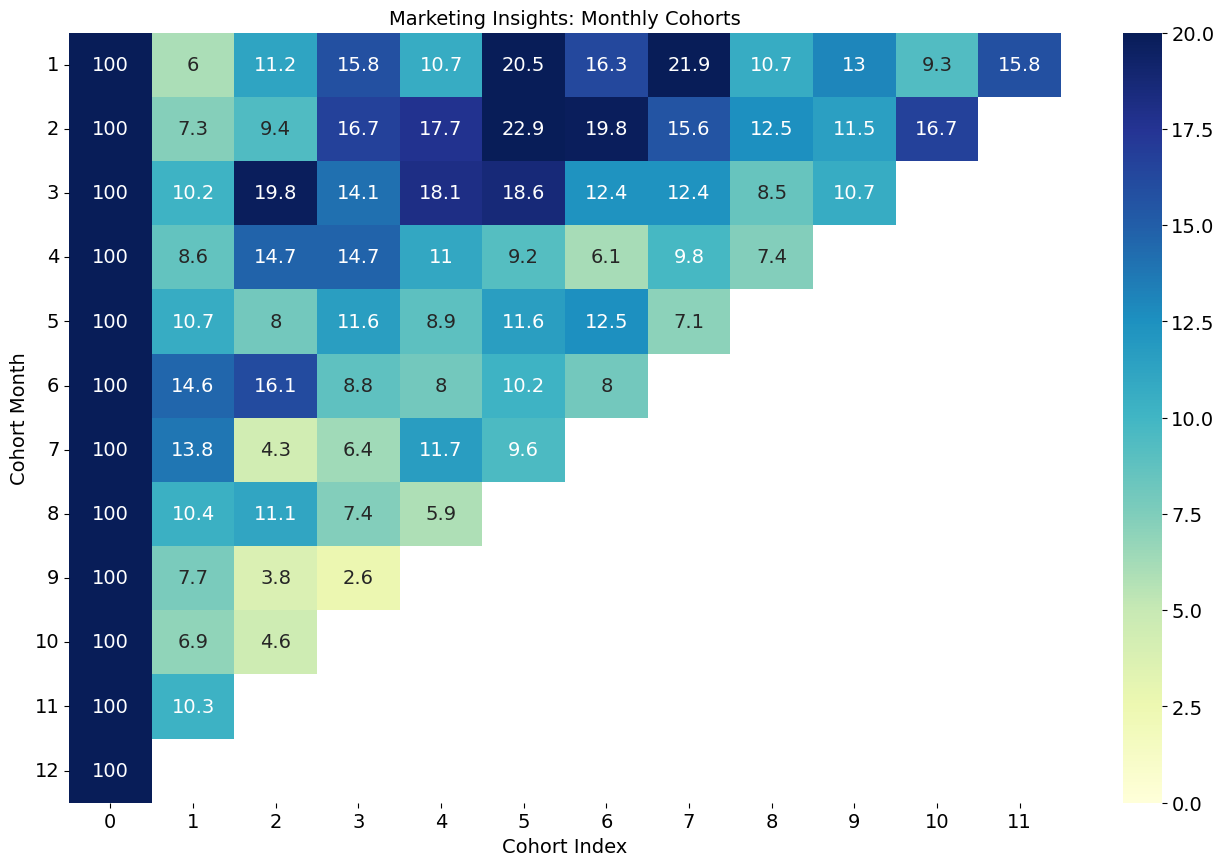

In [387]:
#Visualisation of cohort retention
##################################
# Initialize the figure
plt.figure(figsize=(16, 10))
# Adding a title
plt.title('Marketing Insights: Monthly Cohorts', fontsize = 14)
# Creating the heatmap
sns.heatmap(retention, annot = True,vmin = 0.0, vmax =20,cmap="YlGnBu", fmt='g')
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks( rotation='360')
plt.show()